# 모듈 불러오기

In [14]:
import openpyxl

#### 기본

In [15]:
import numpy as np
import pandas as pd
import glob

#### 시각화

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  

import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

# 시각화 세팅, 함수

In [17]:
marker='o'
color='black'
title_size = 15

In [18]:
def linegraph(df, title='제목 입력하기', rotation=0, path='./img/인구'):
    plt.plot(df, marker=marker, color=color)
    plt.xticks(rotation=rotation)
    plt.title(title, size=title_size)
    plt.tight_layout()
    plt.savefig(f'{path}/{title}.png')
    plt.show()

# 전처리

In [19]:
year = 16
path = f'../../data/인구/{year}년도 동별 연령별 인구.csv'
title = f'동별 0-19세 인구 분포 세분화 20{year}'
img_path = f'../../img/인구/동별 0-19세 인구 분포 세분화'
df_2016 = pd.read_csv(path).set_index('동별', drop=True).drop(['코드', '소계'], axis=1)

In [20]:
year = 22
path = f'../../data/인구/{year}년도 동별 연령별 인구.csv'
title = f'동별 0-19세 인구 분포 세분화 20{year}'
img_path = f'../../img/인구/동별 0-19세 인구 분포 세분화'
df_2022 = pd.read_csv(path).set_index('동별', drop=True).drop(['코드', '소계'], axis=1)

In [21]:
df_change = df_2022 - df_2016

# 2016년 대비 2022년 동별 연령별 인구 변화

In [22]:
# 합계 만들기
# df_change['sum']= df_change.sum(axis=1)

In [23]:
list(df_change)

['0~4세',
 '5~9세',
 '10~14세',
 '15~19세',
 '20~24세',
 '25~29세',
 '30~34세',
 '35~39세',
 '40~44세',
 '45~49세',
 '50~54세',
 '55~59세',
 '60~64세',
 '65~69세',
 '70~74세',
 '75~79세',
 '80~84세',
 '85~89세',
 '90~94세',
 '95~99세',
 '100세 이상']

In [24]:
df_change.index

Index(['염창동', '등촌1동', '등촌2동', '등촌3동', '화곡1동', '화곡2동', '화곡3동', '화곡4동', '화곡본동',
       '화곡6동', '화곡8동', '가양1동', '가양2동', '가양3동', '발산1동', '우장산동', '공항동', '방화1동',
       '방화2동', '방화3동'],
      dtype='object', name='동별')

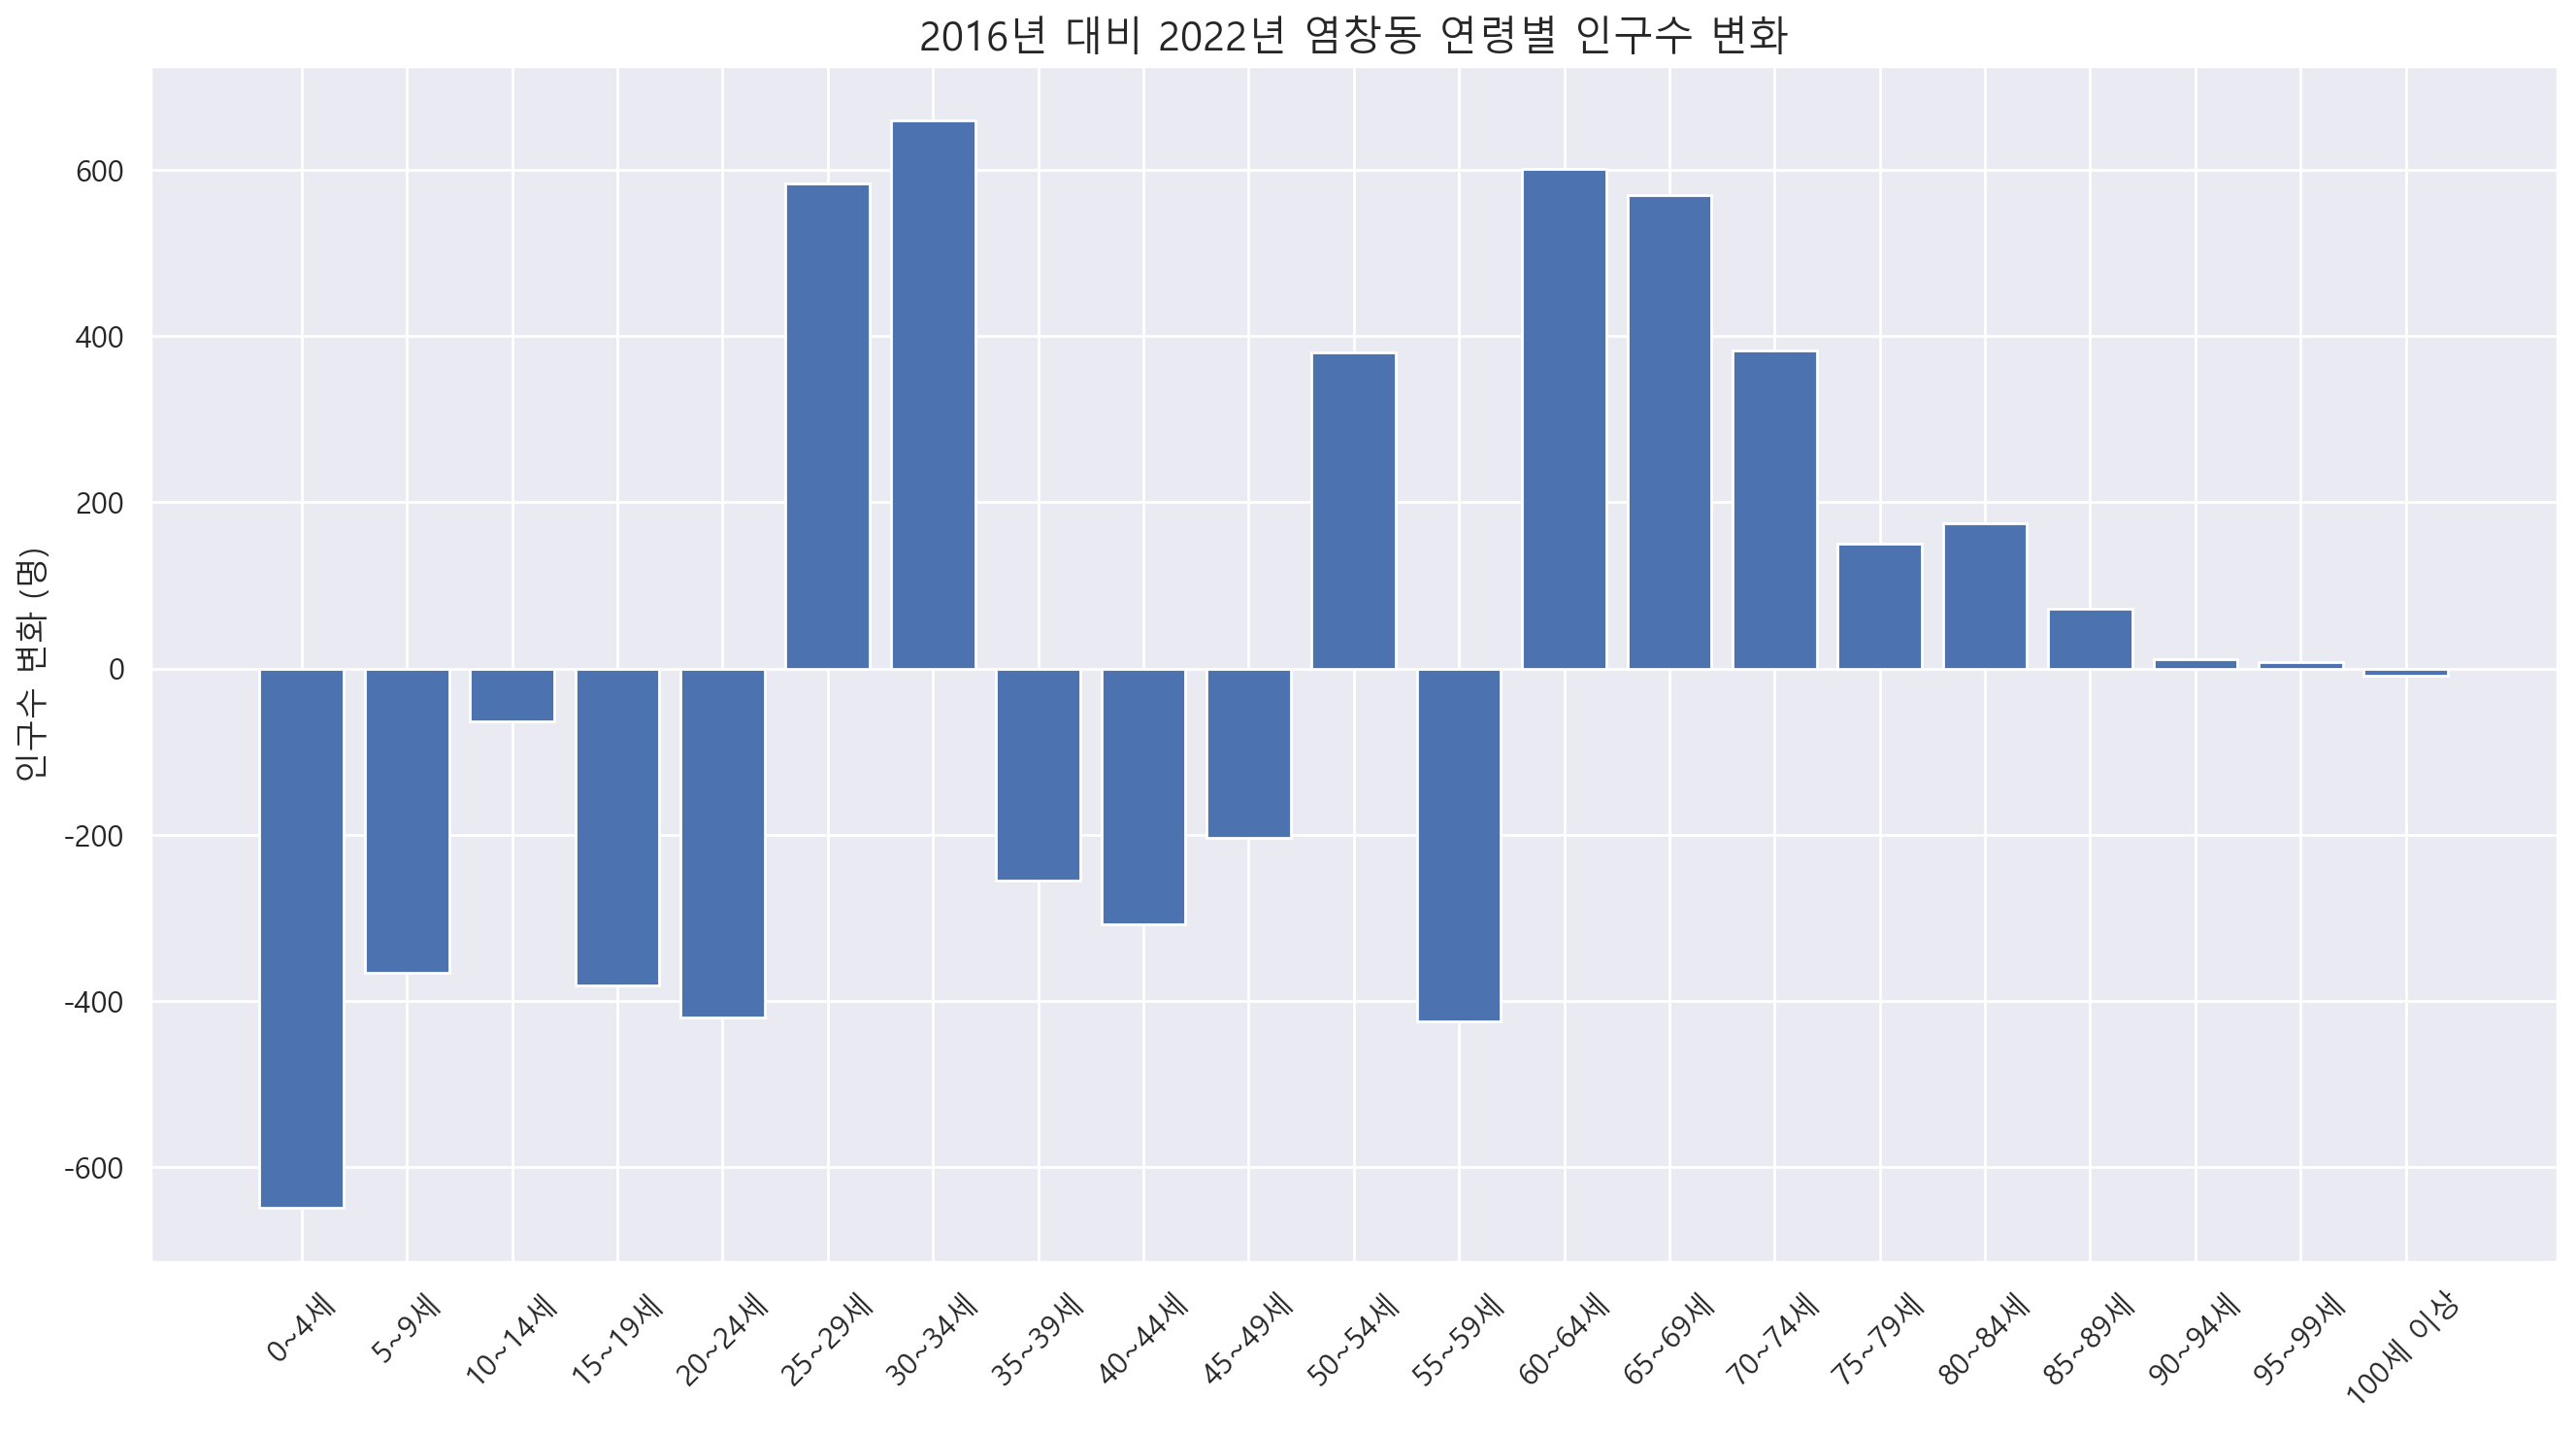

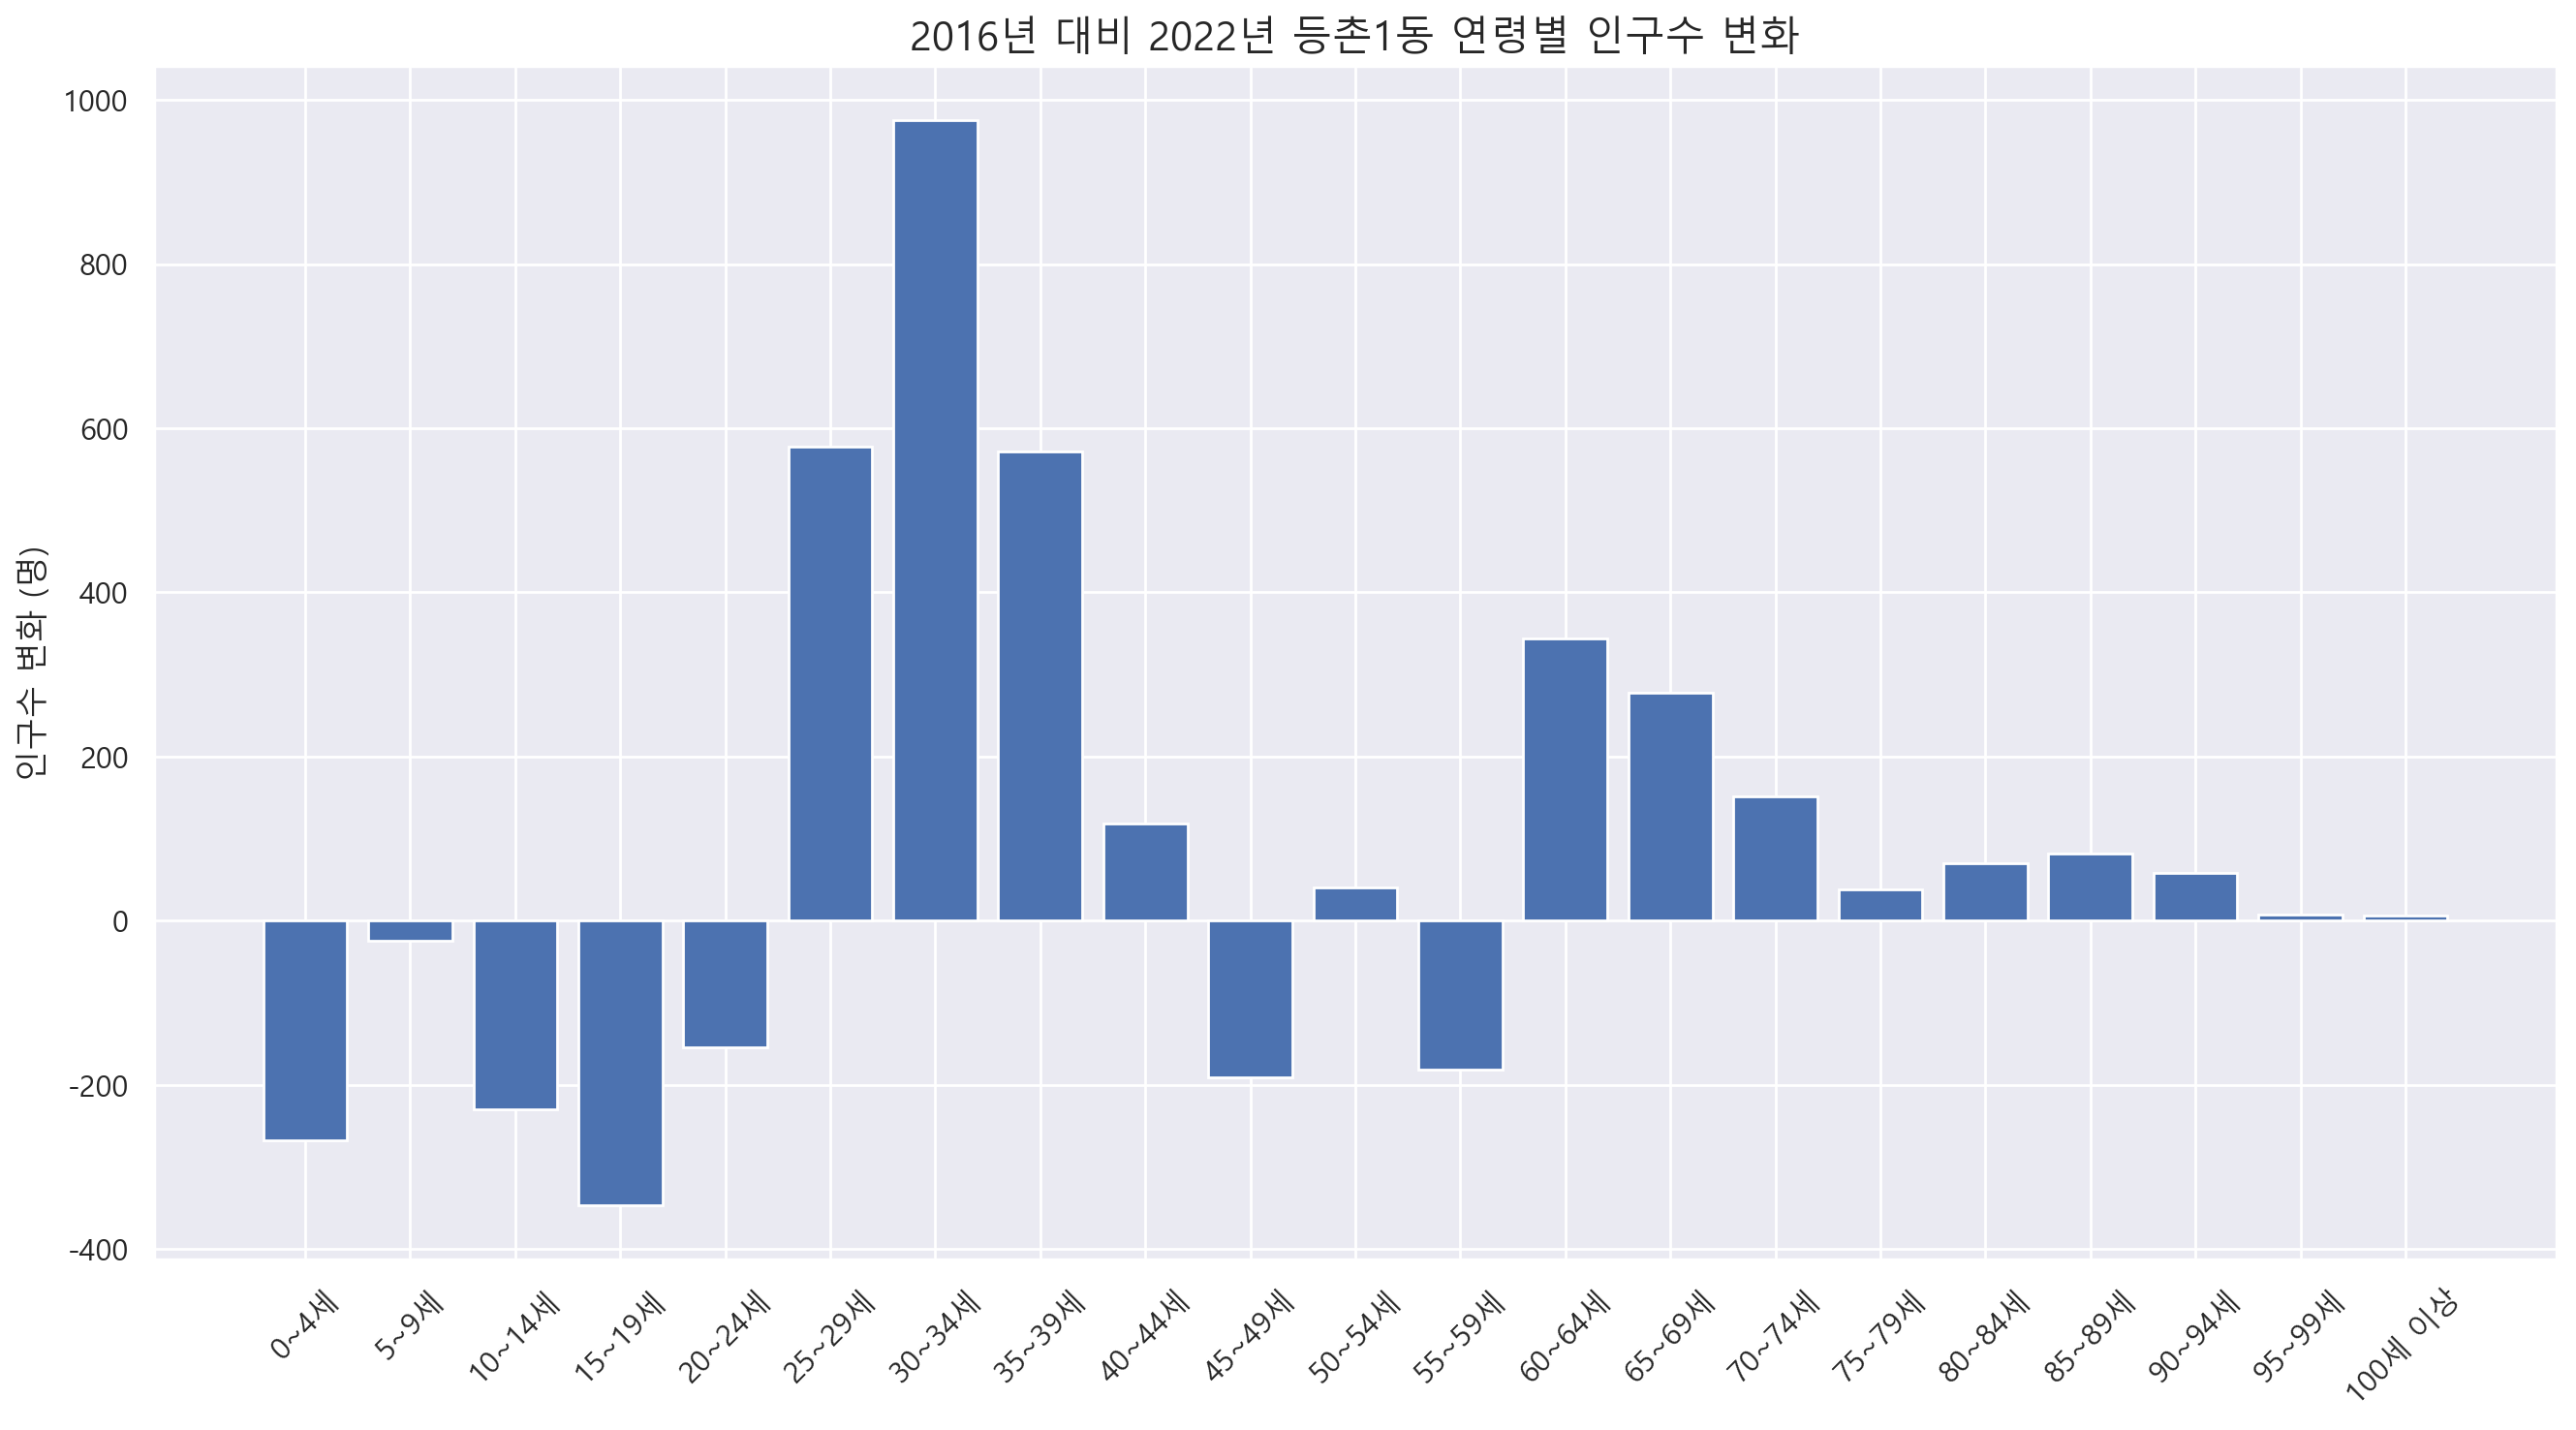

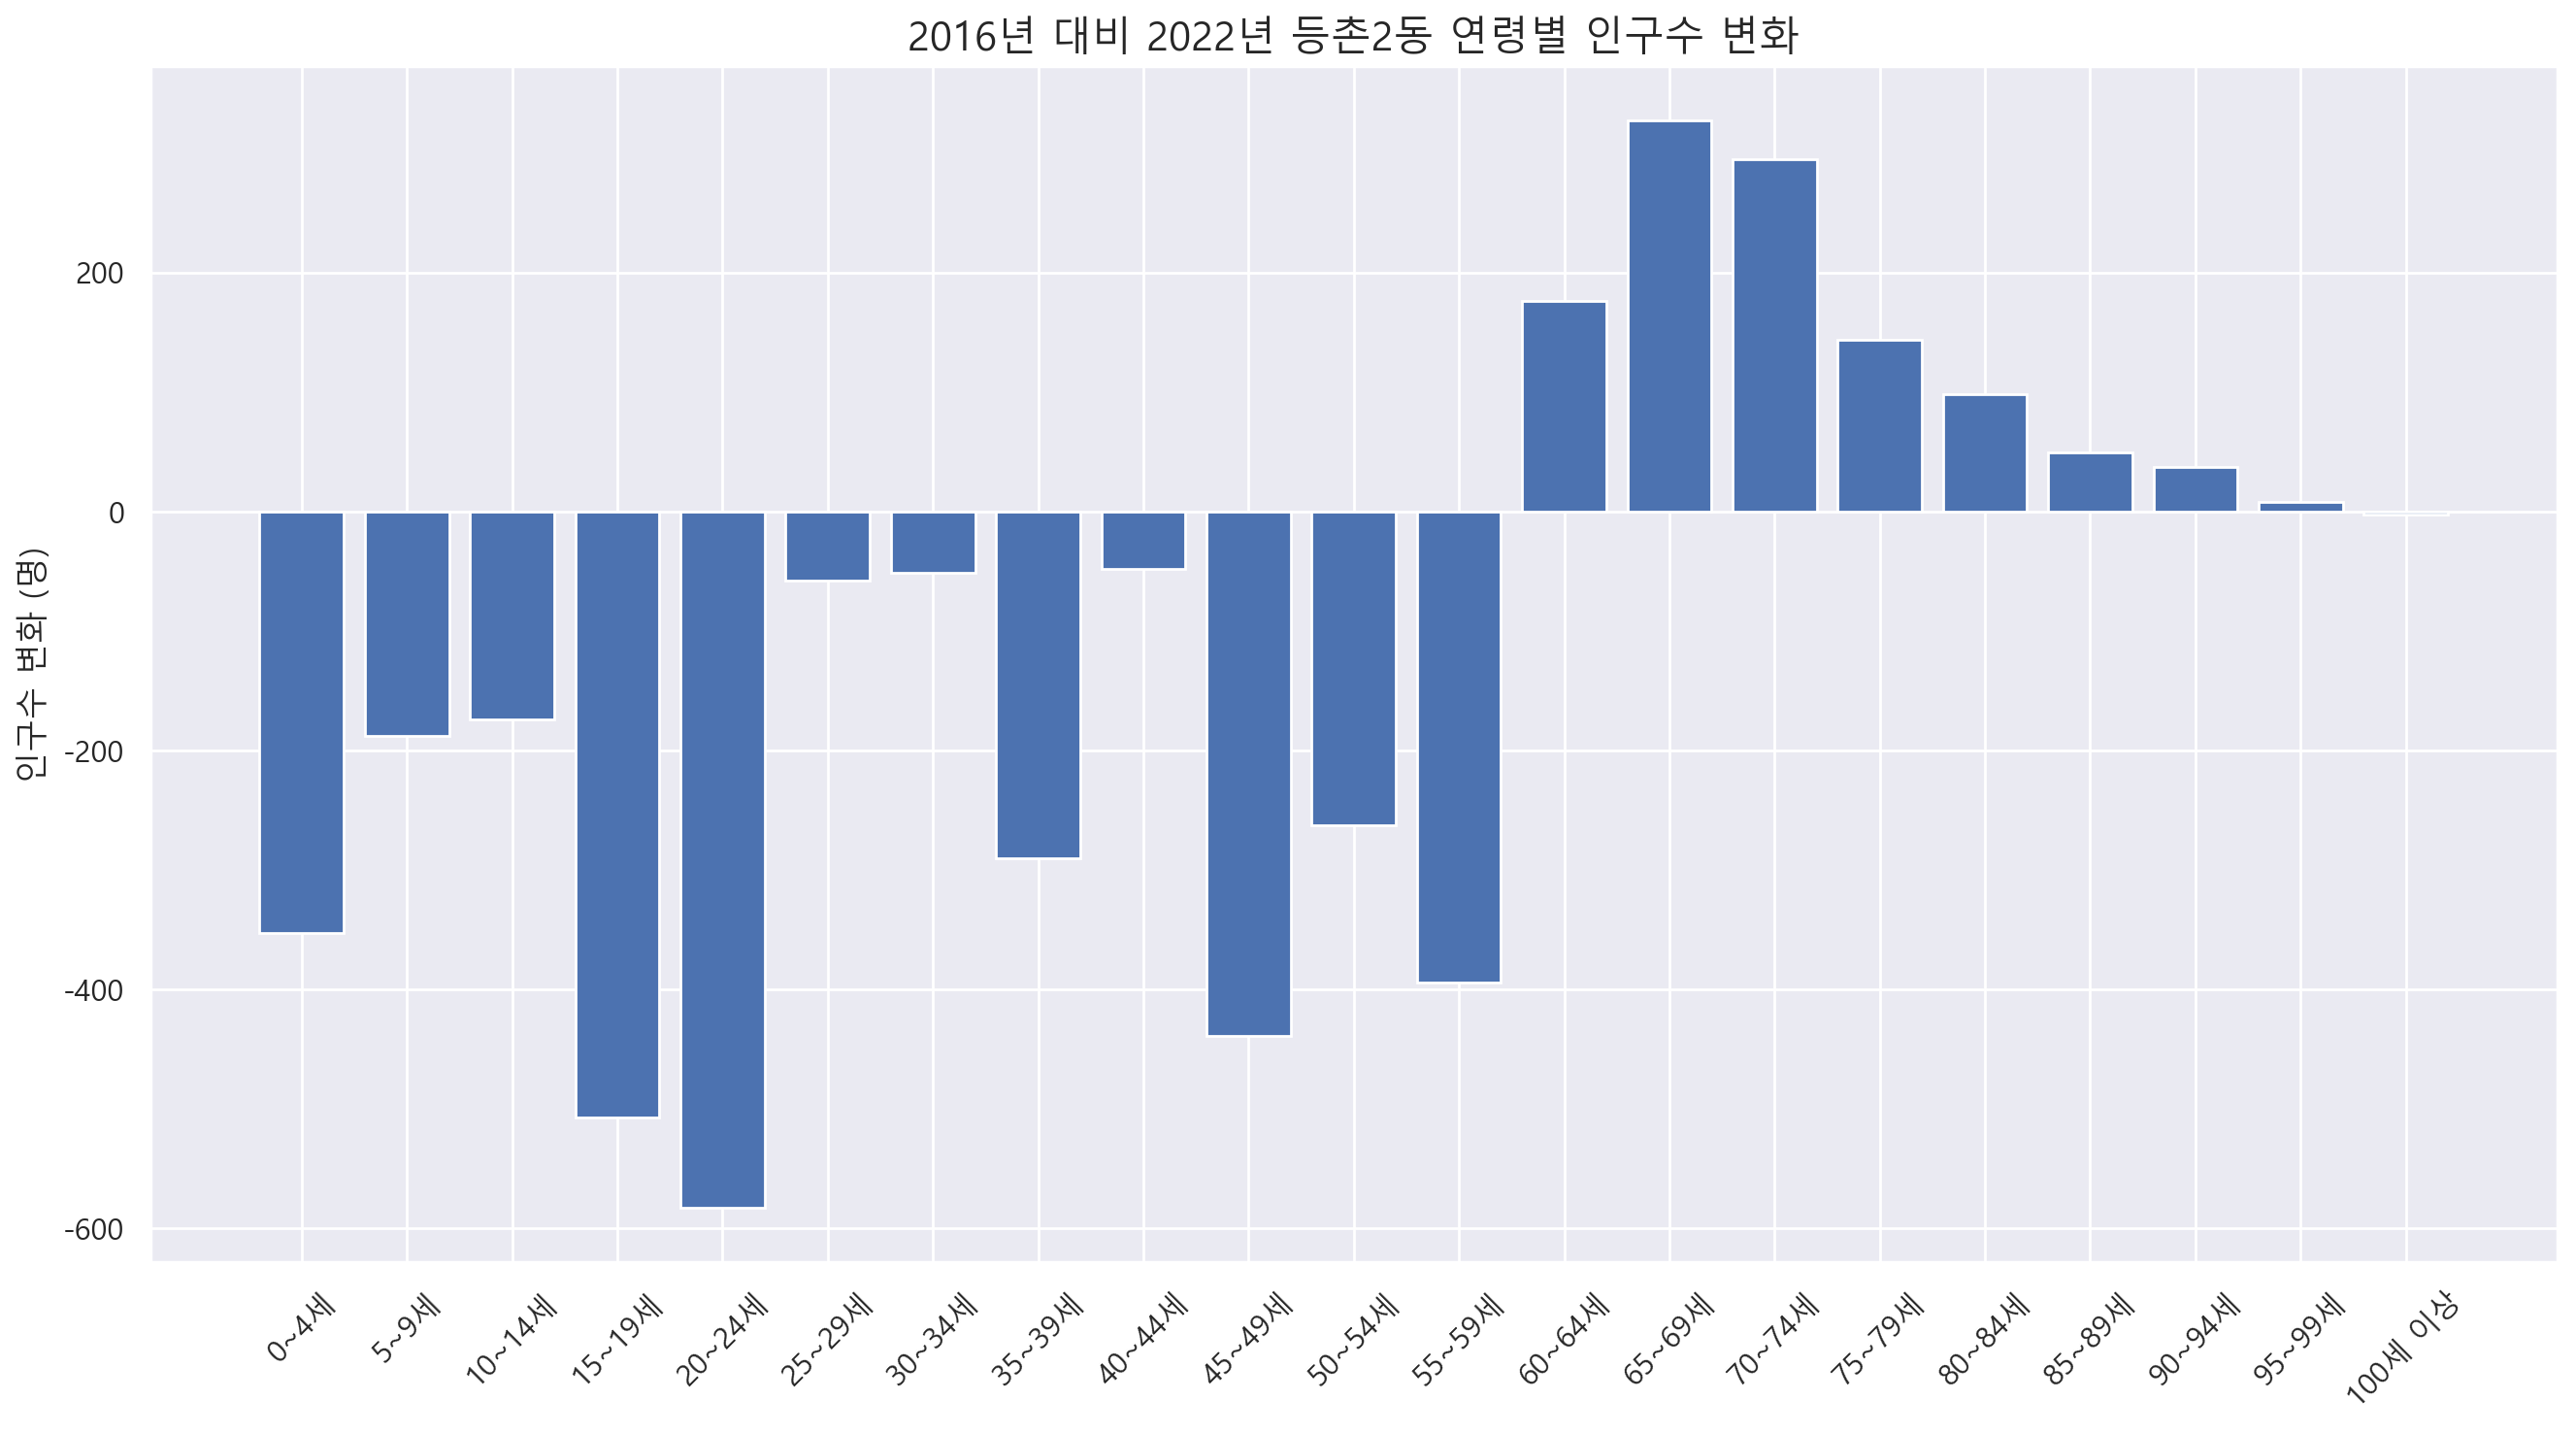

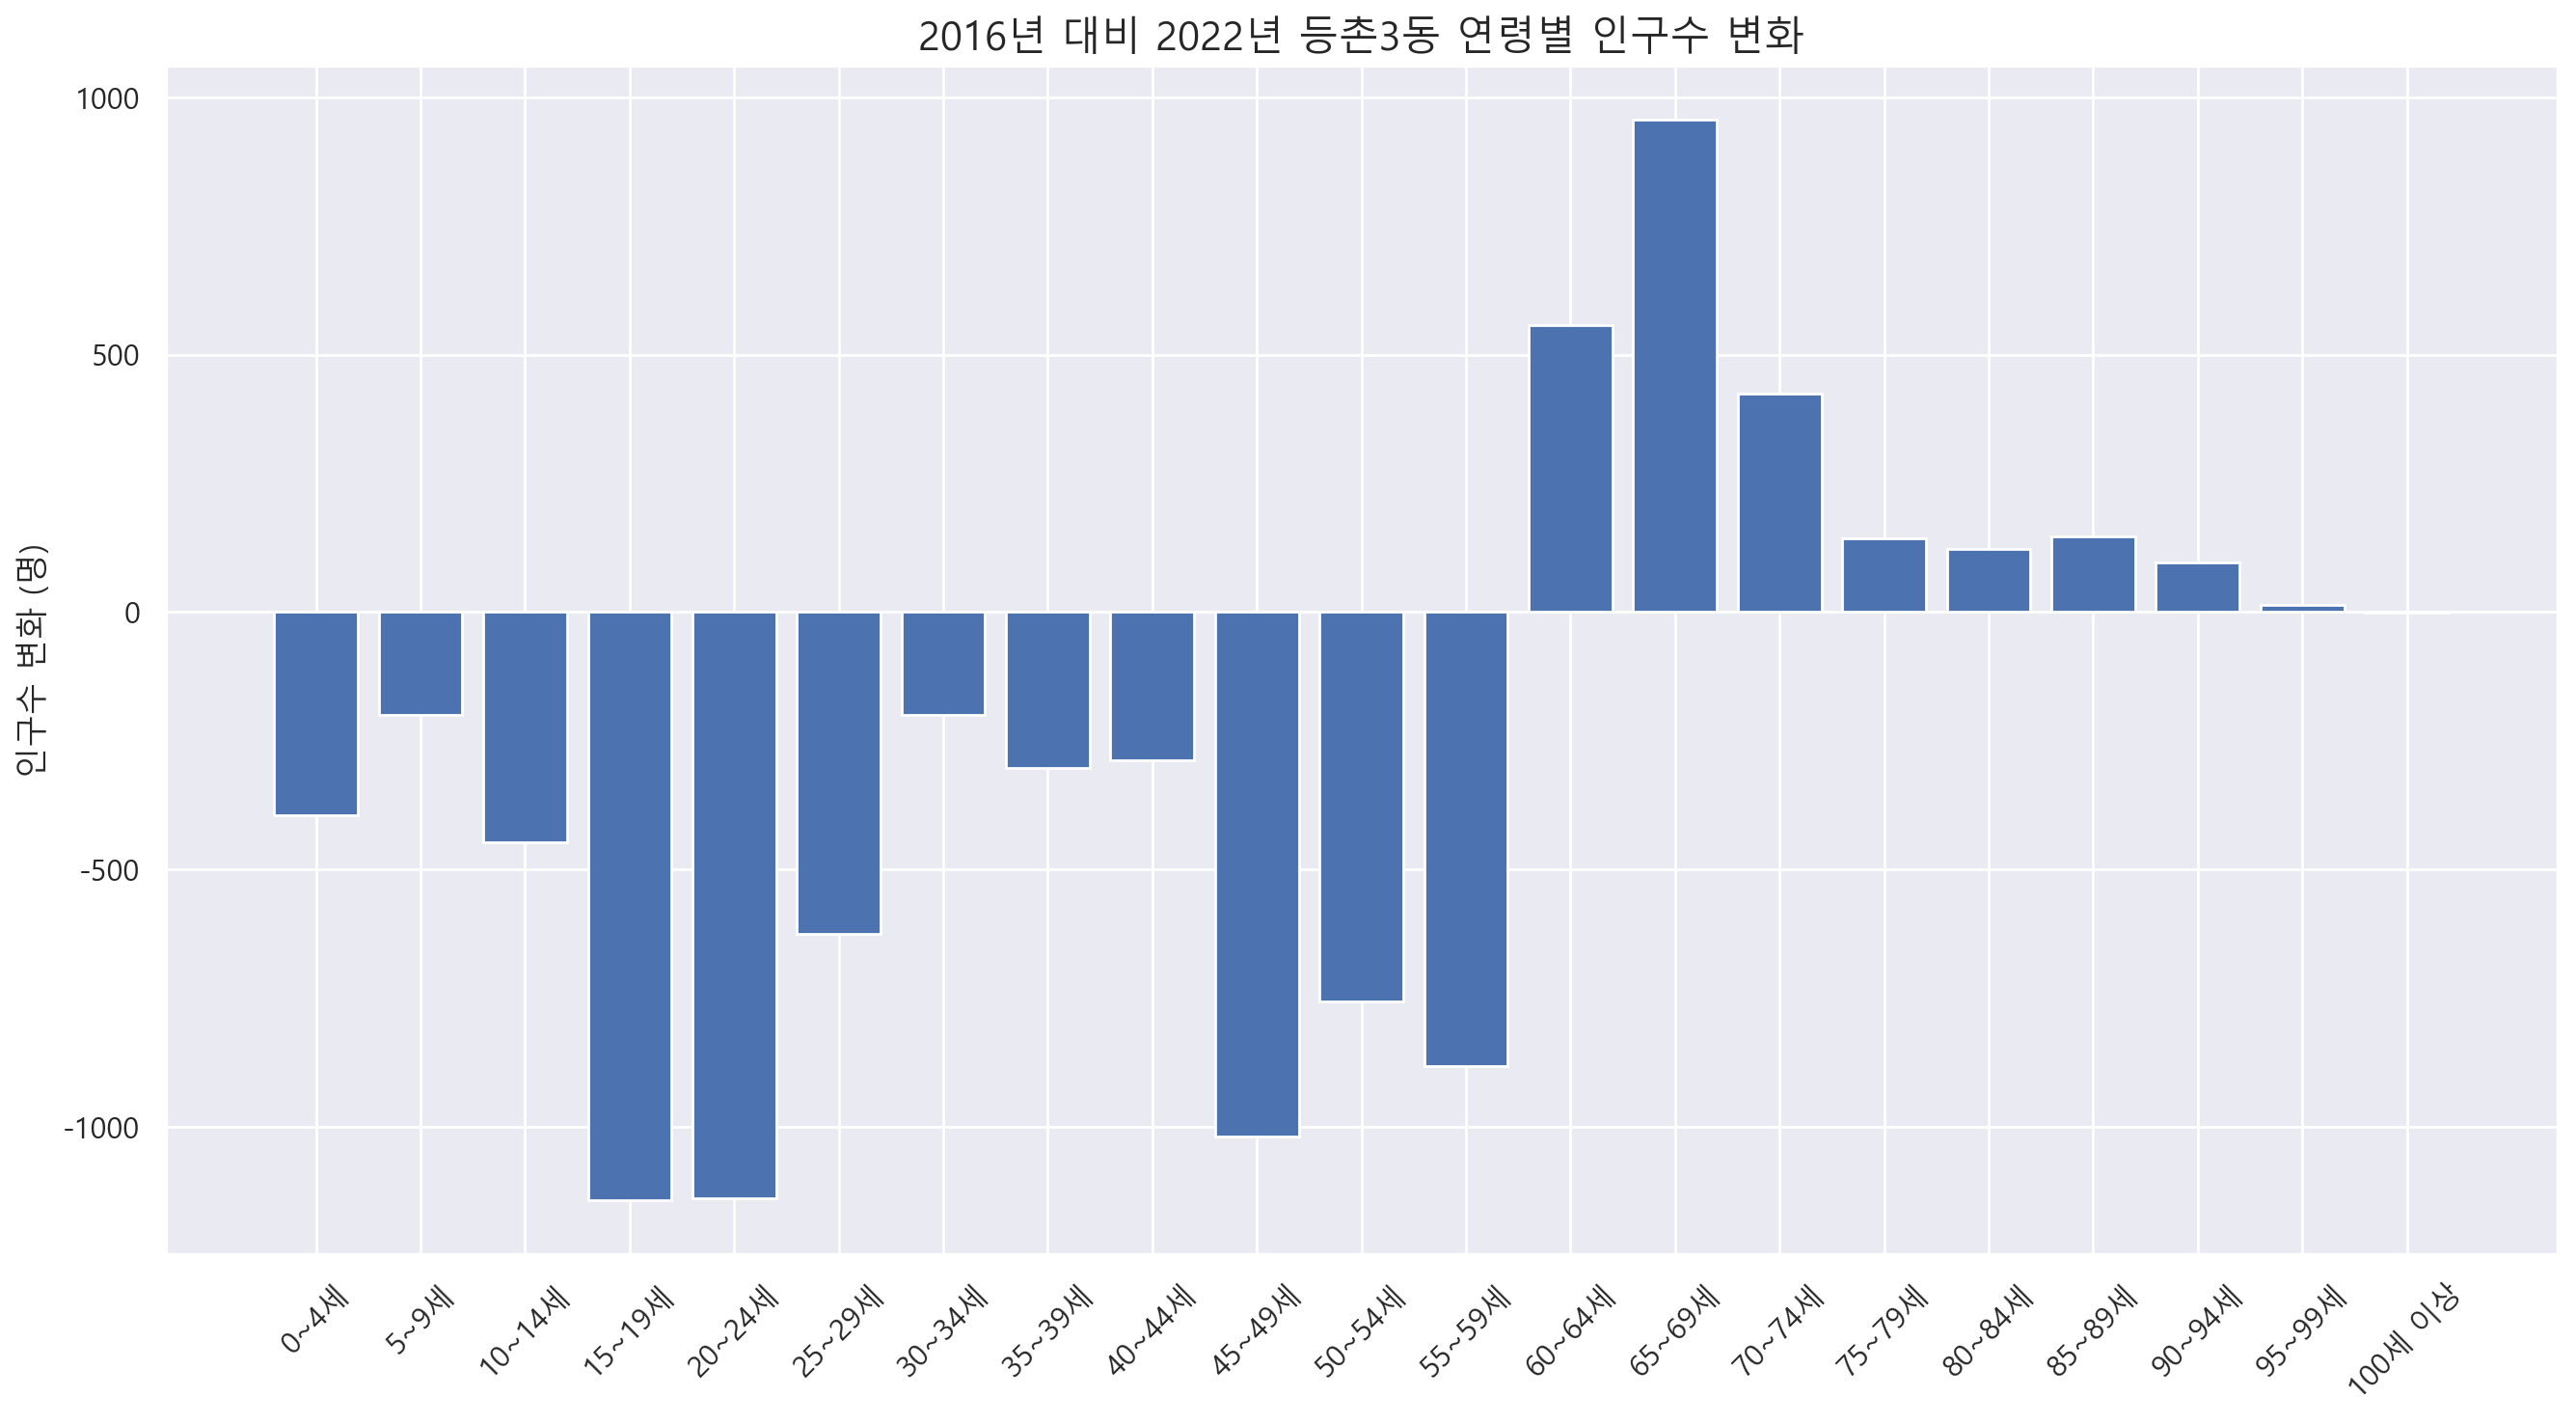

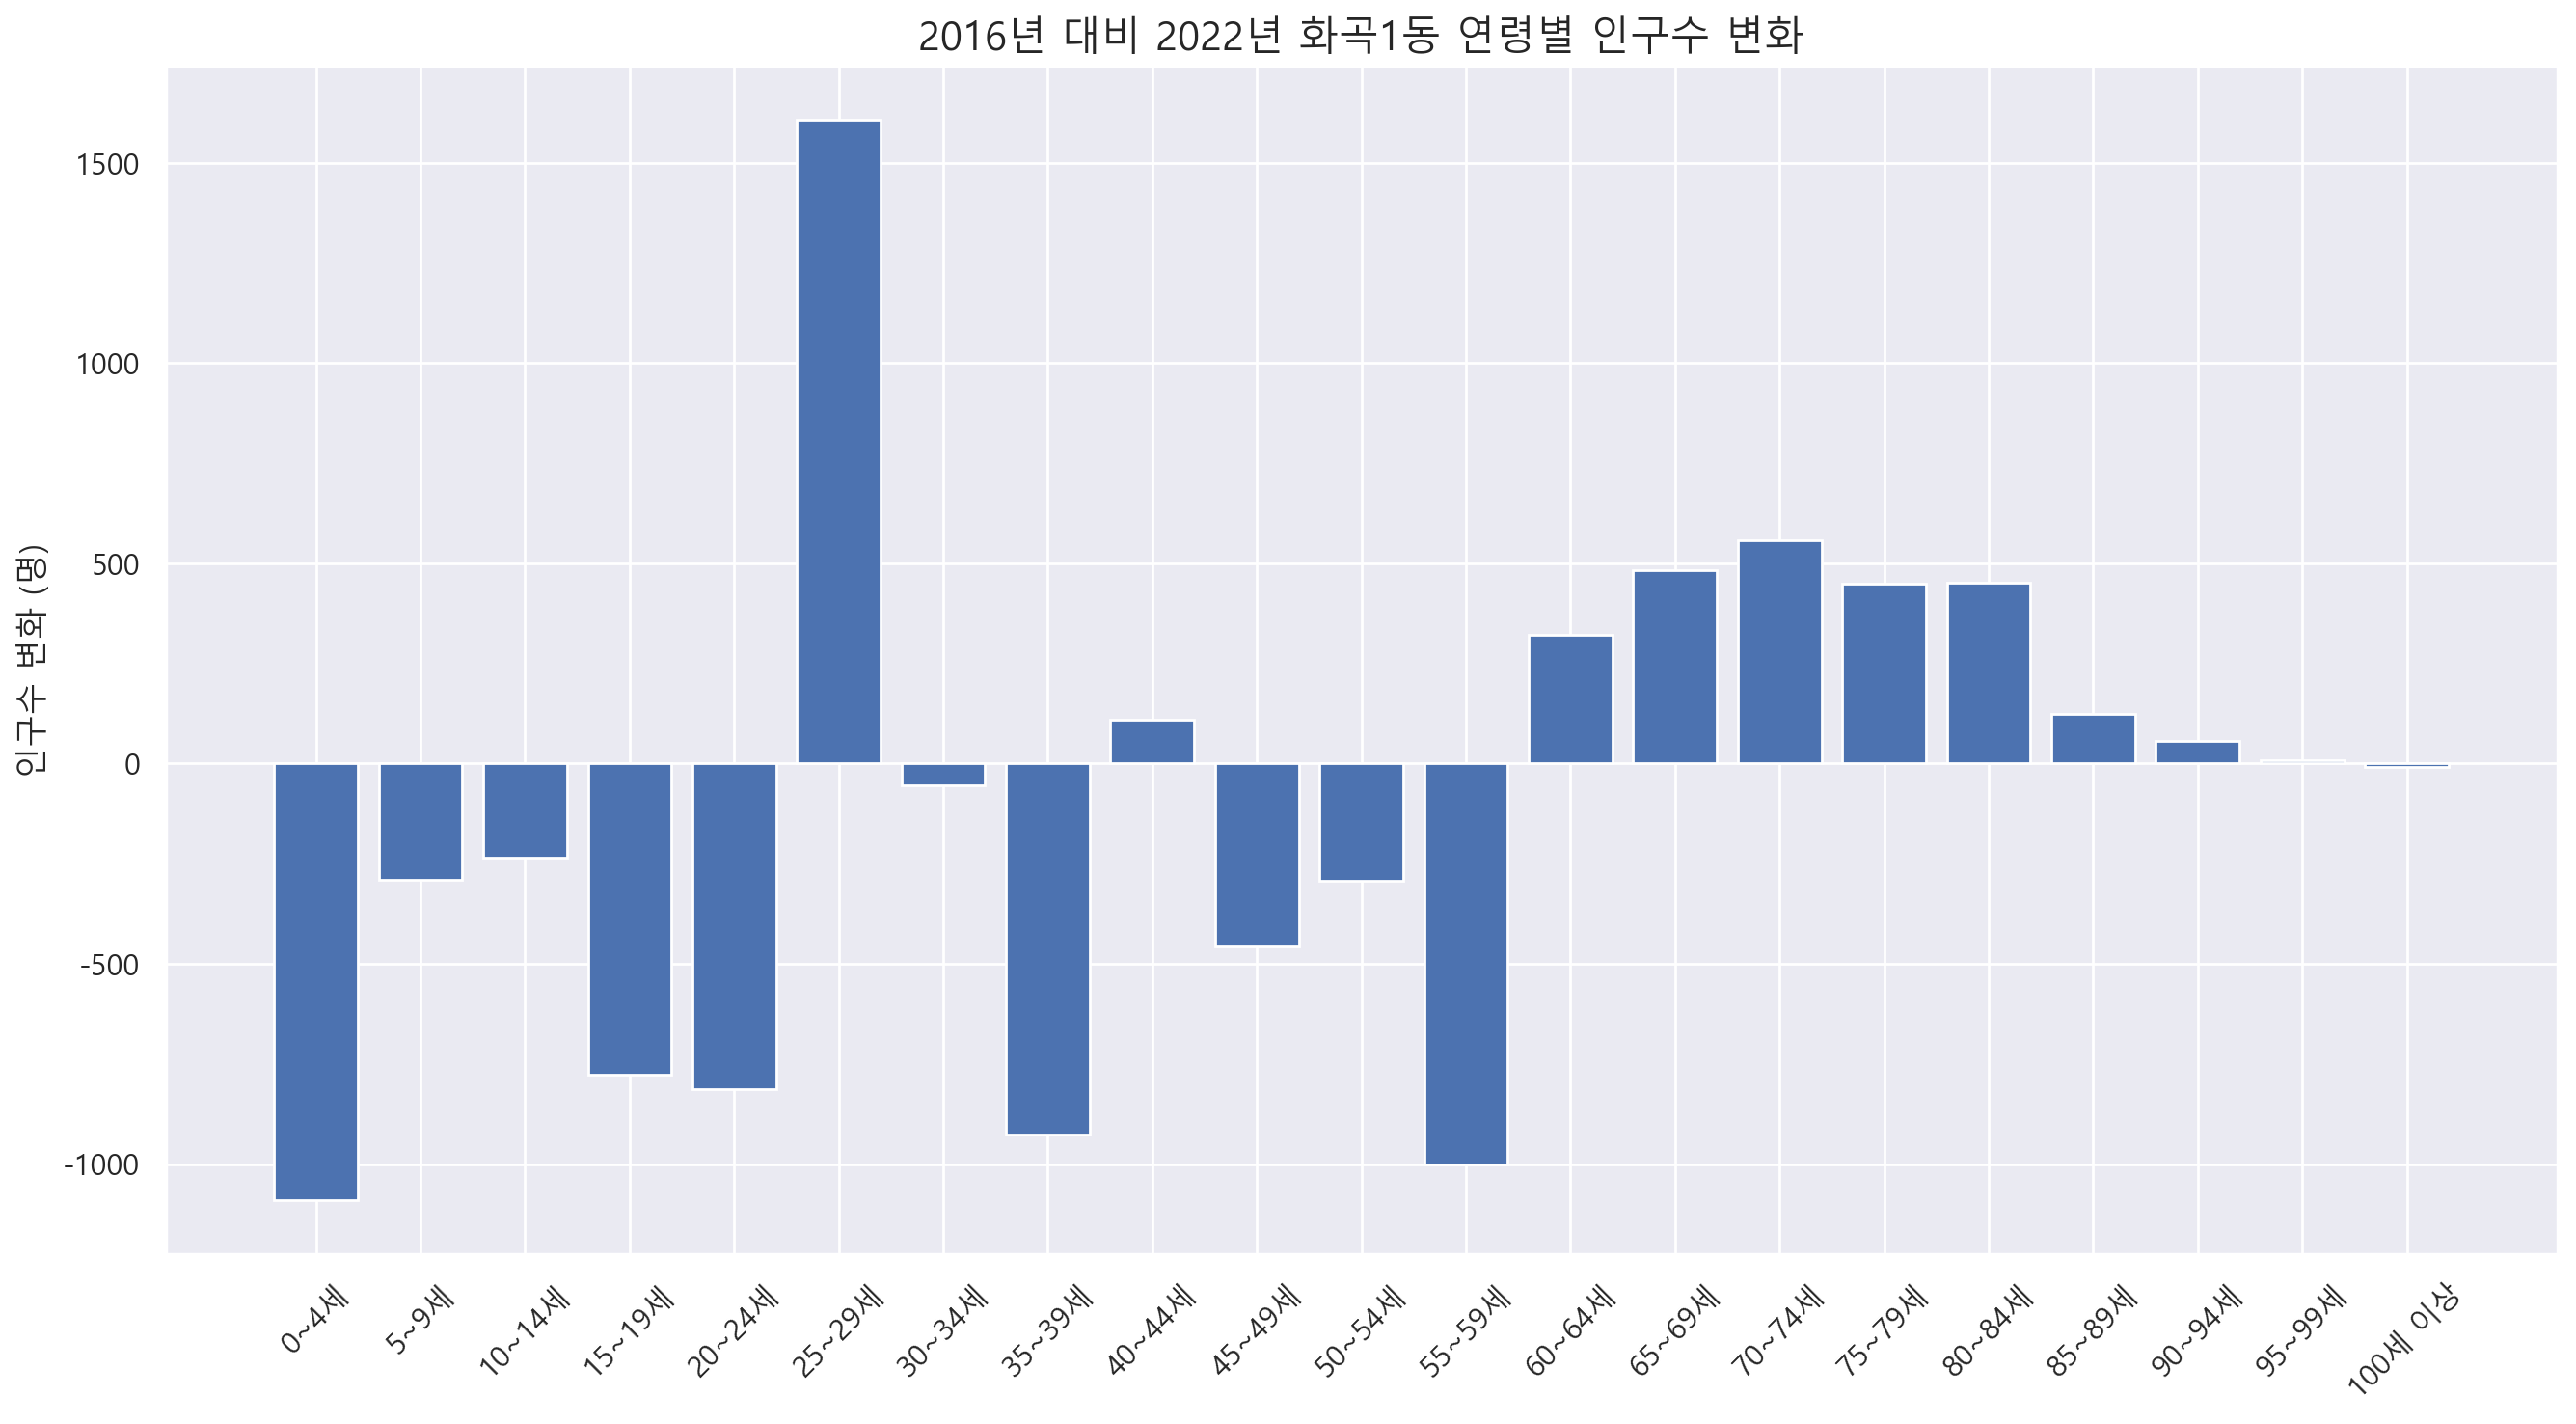

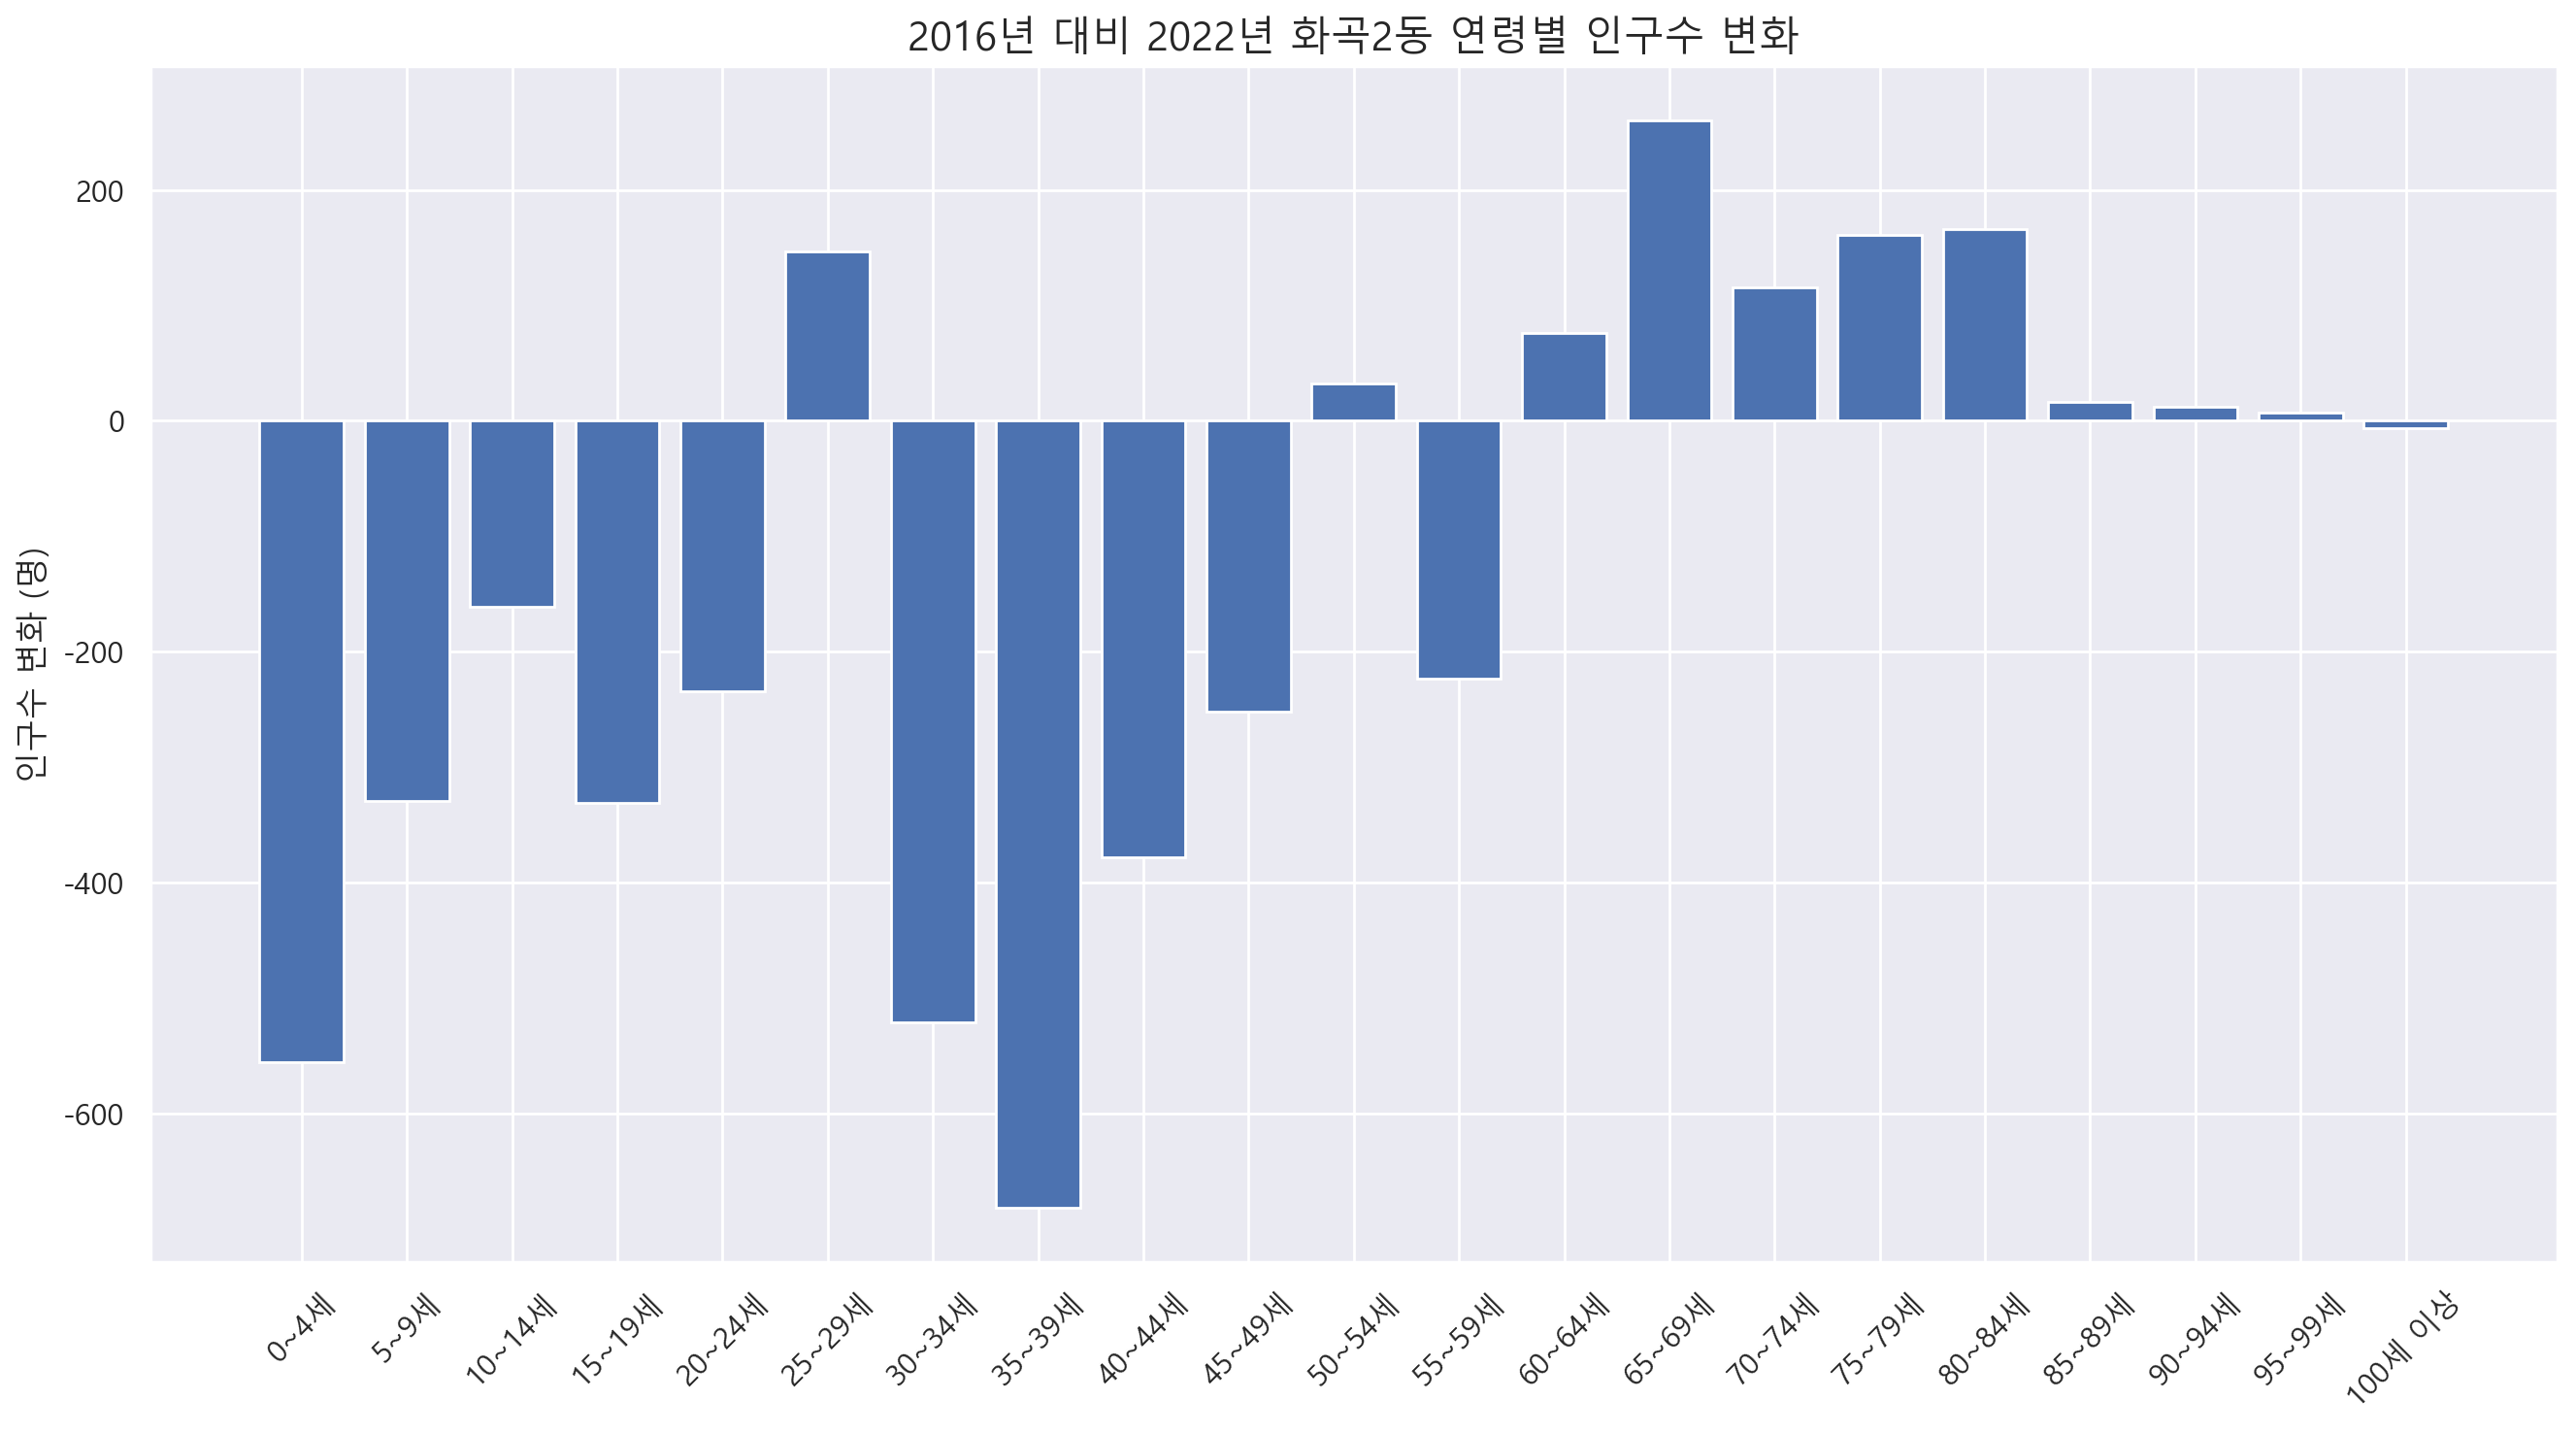

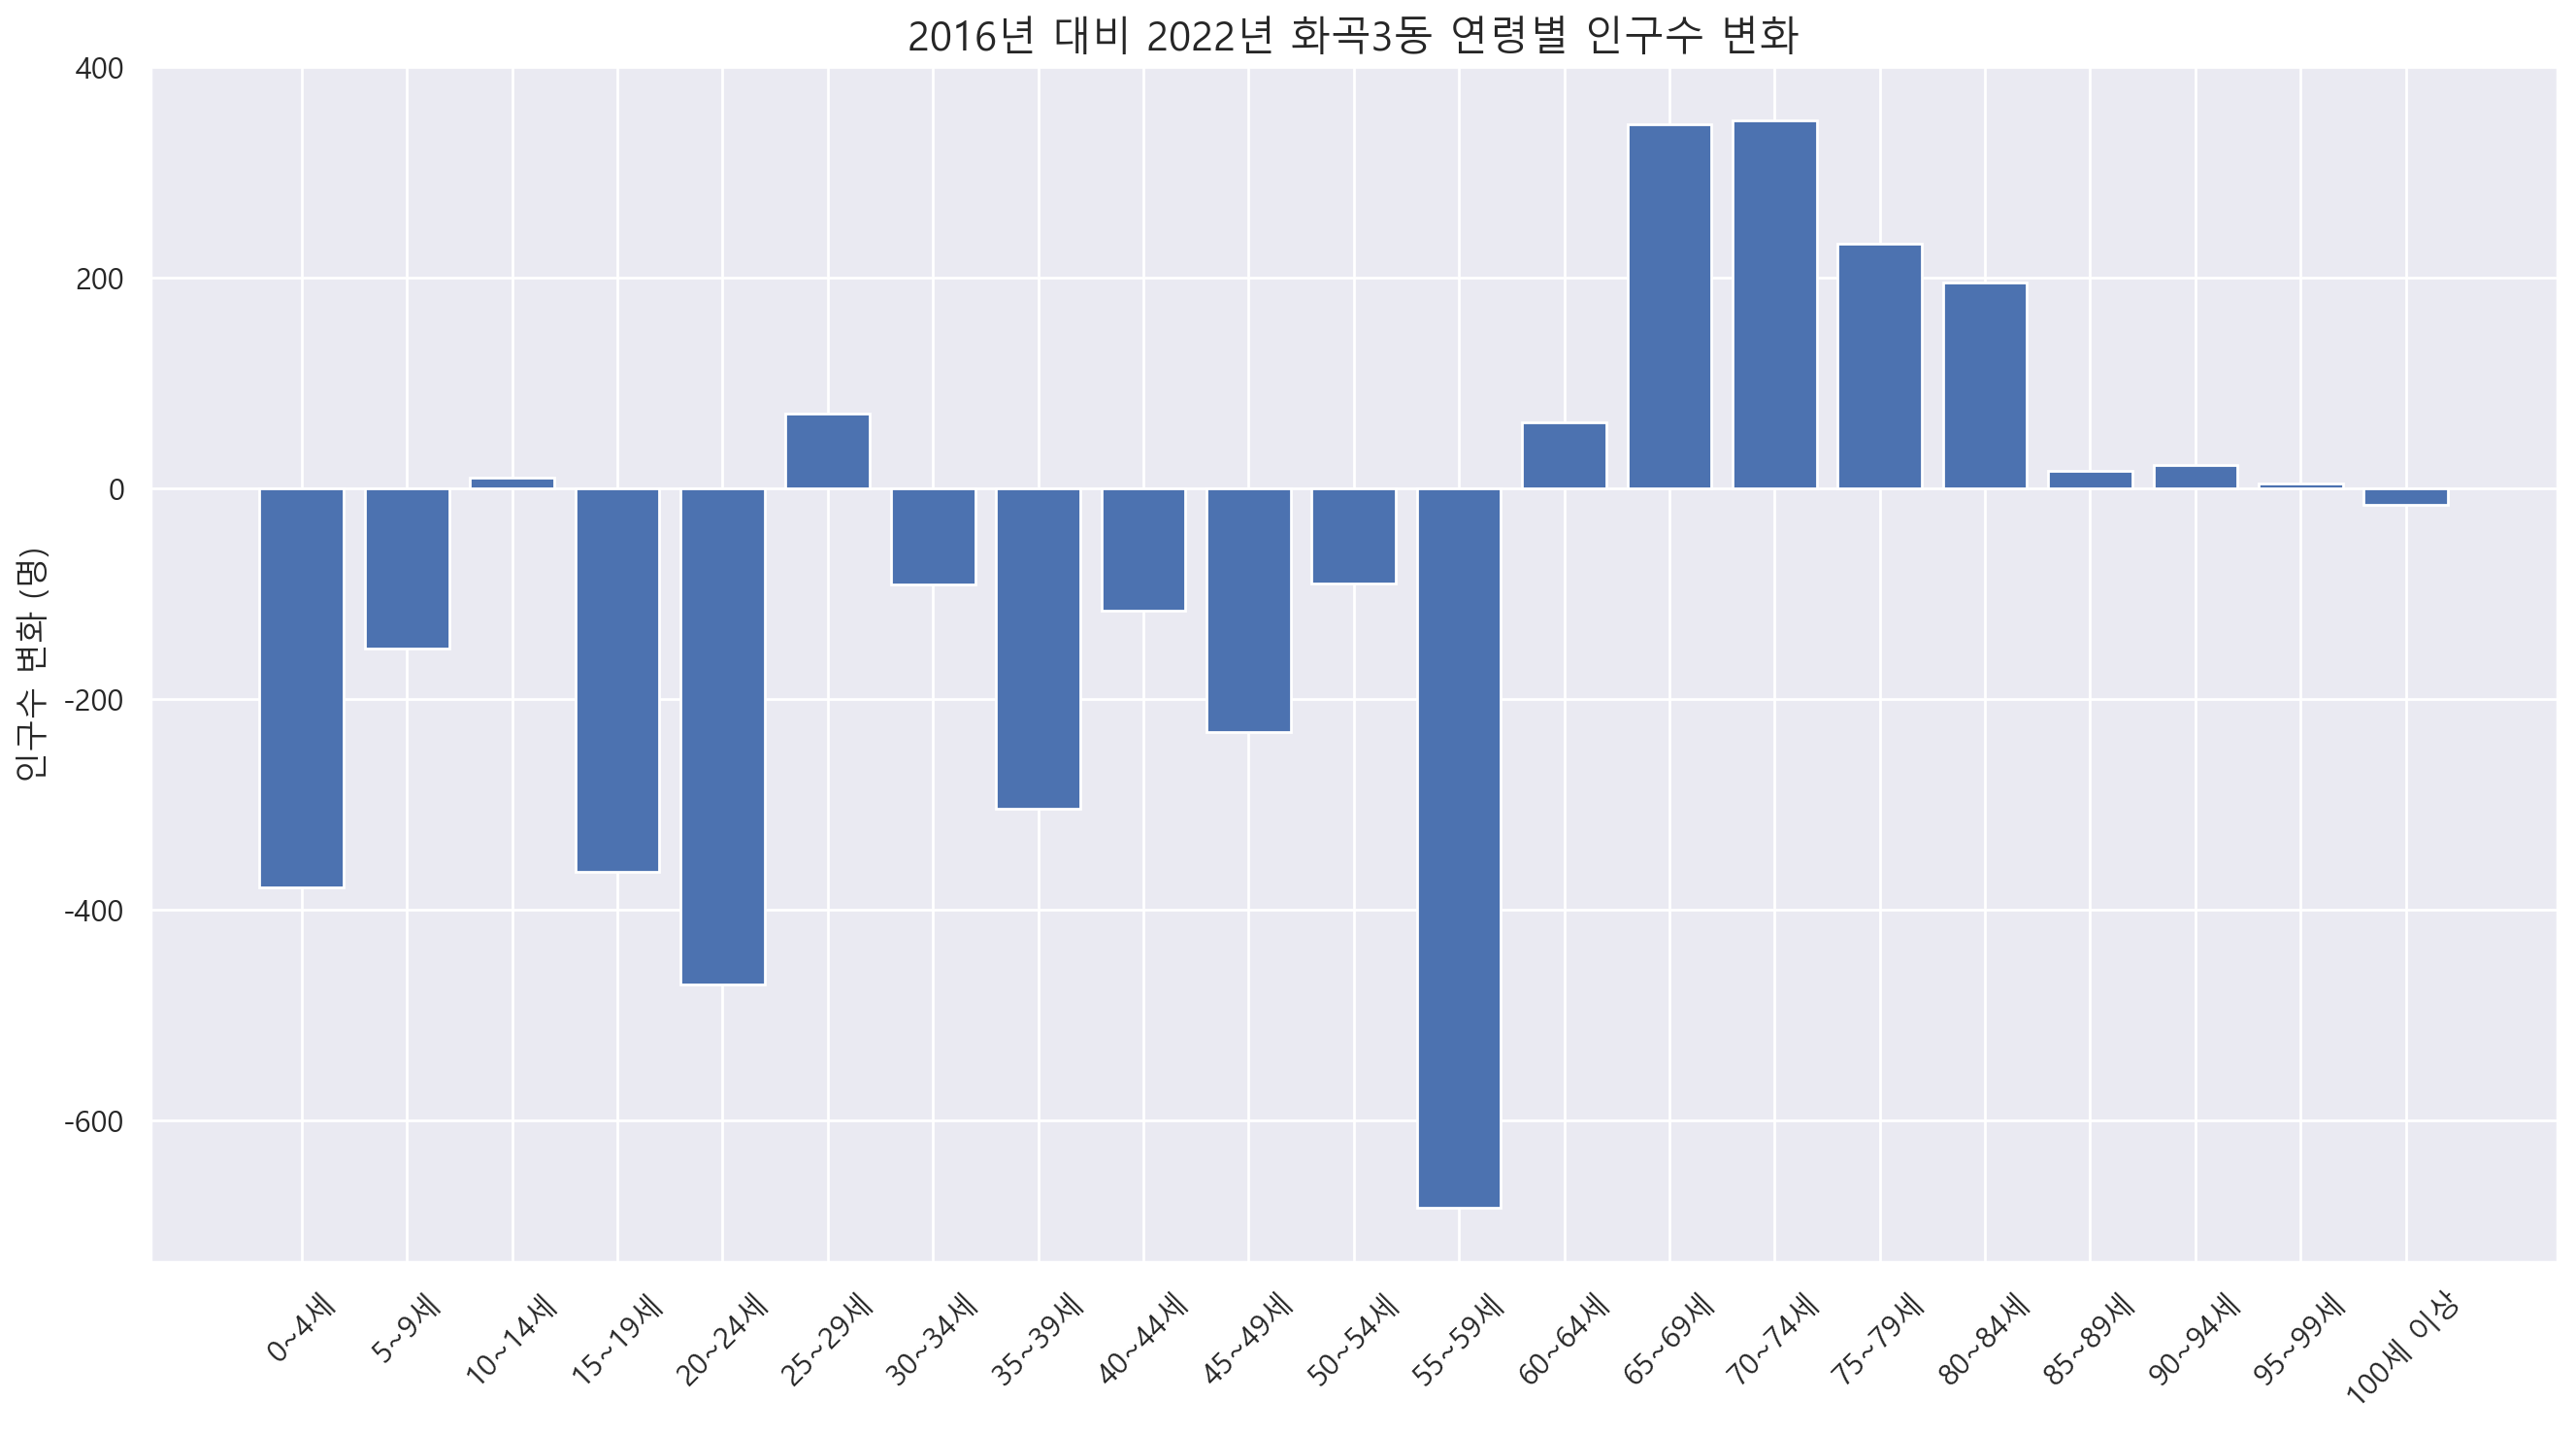

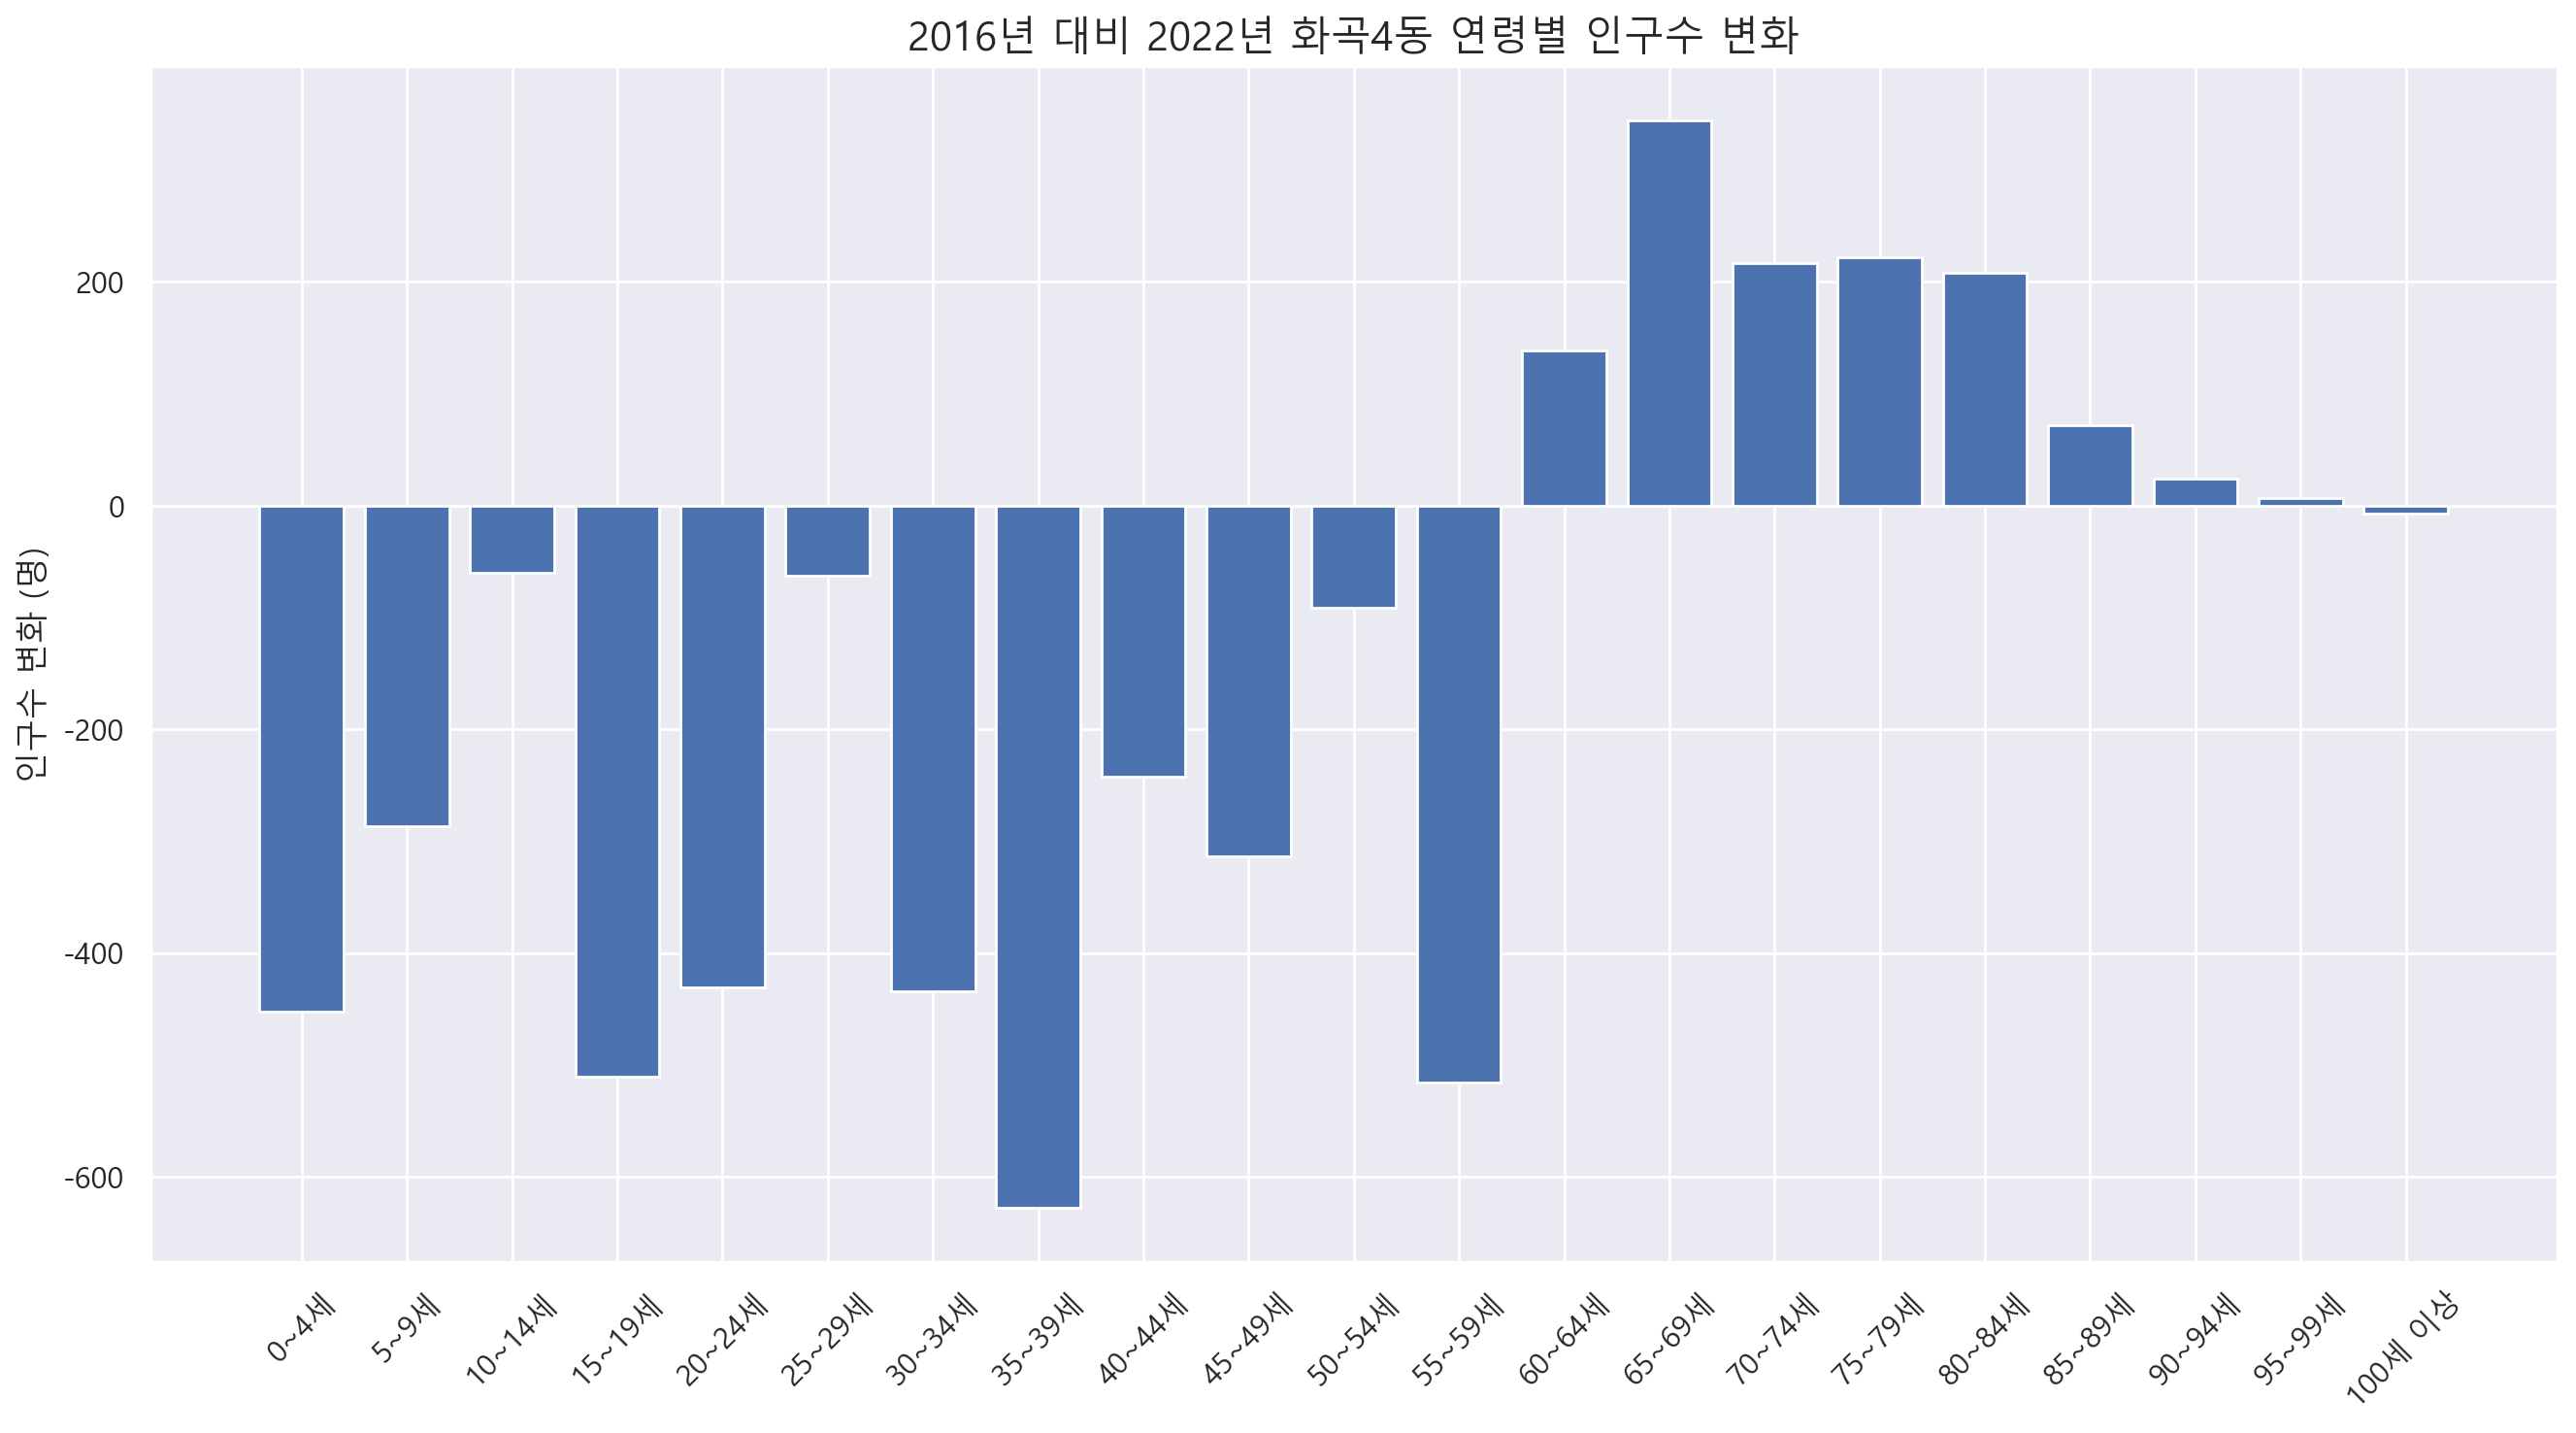

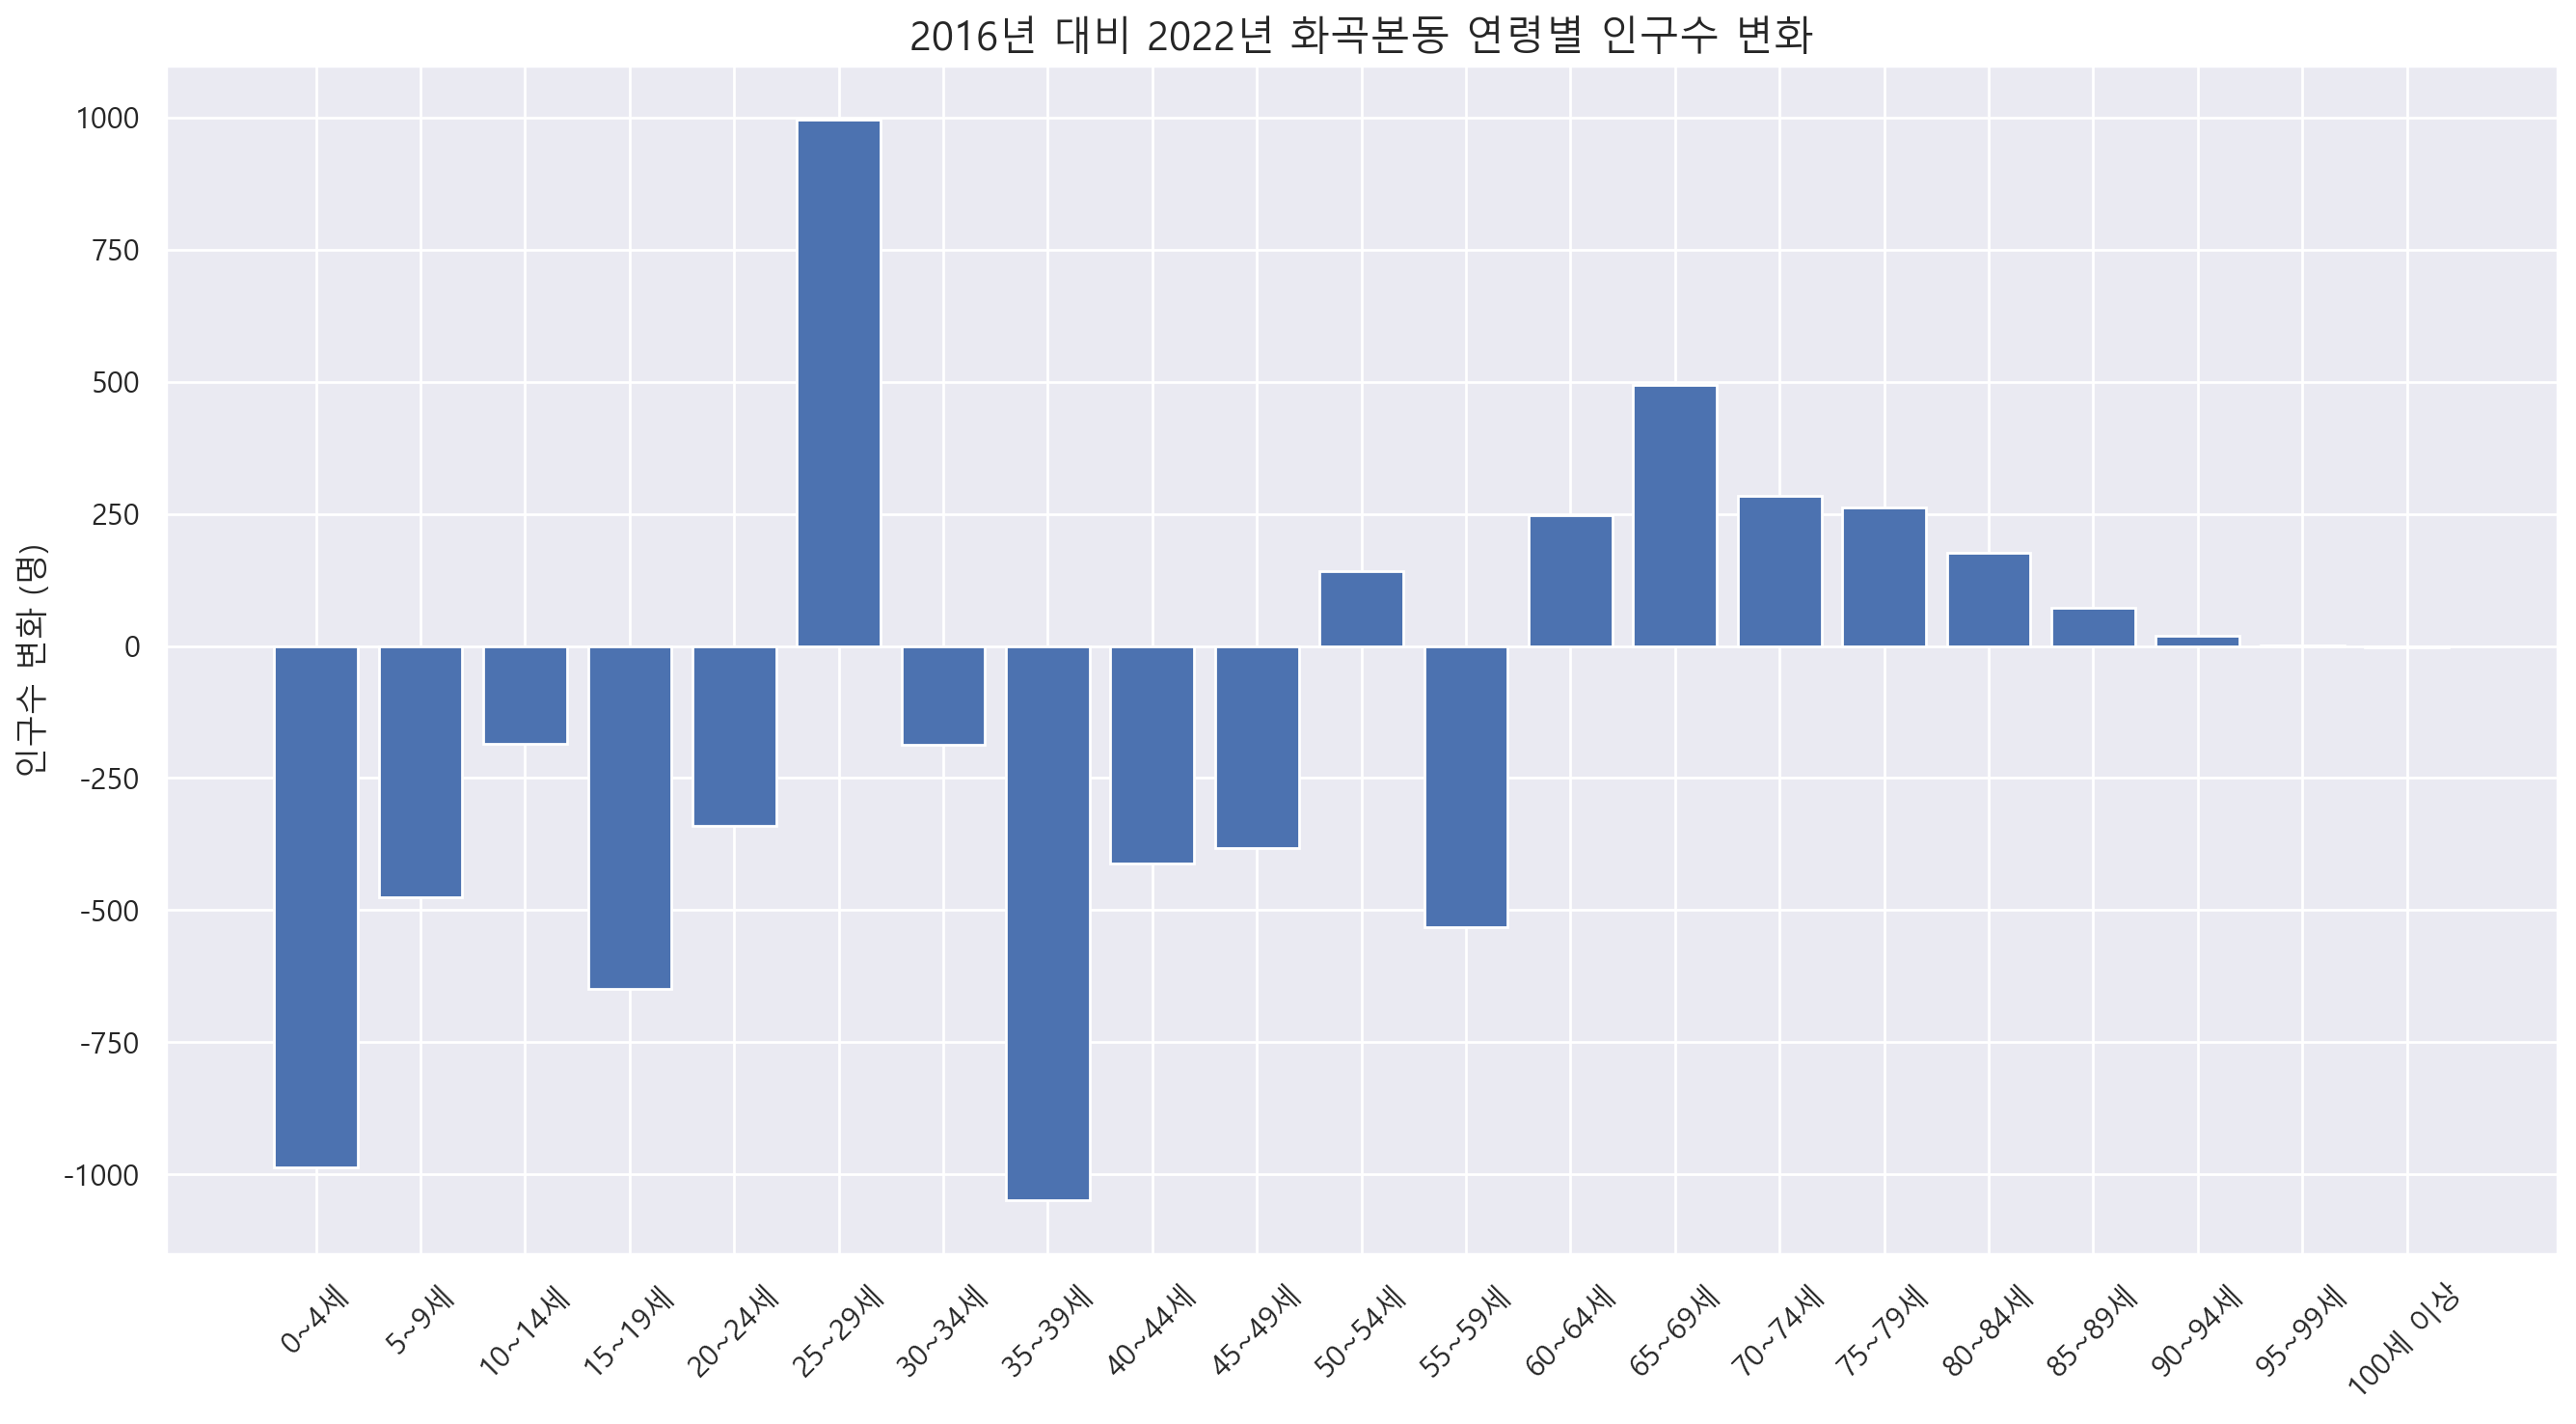

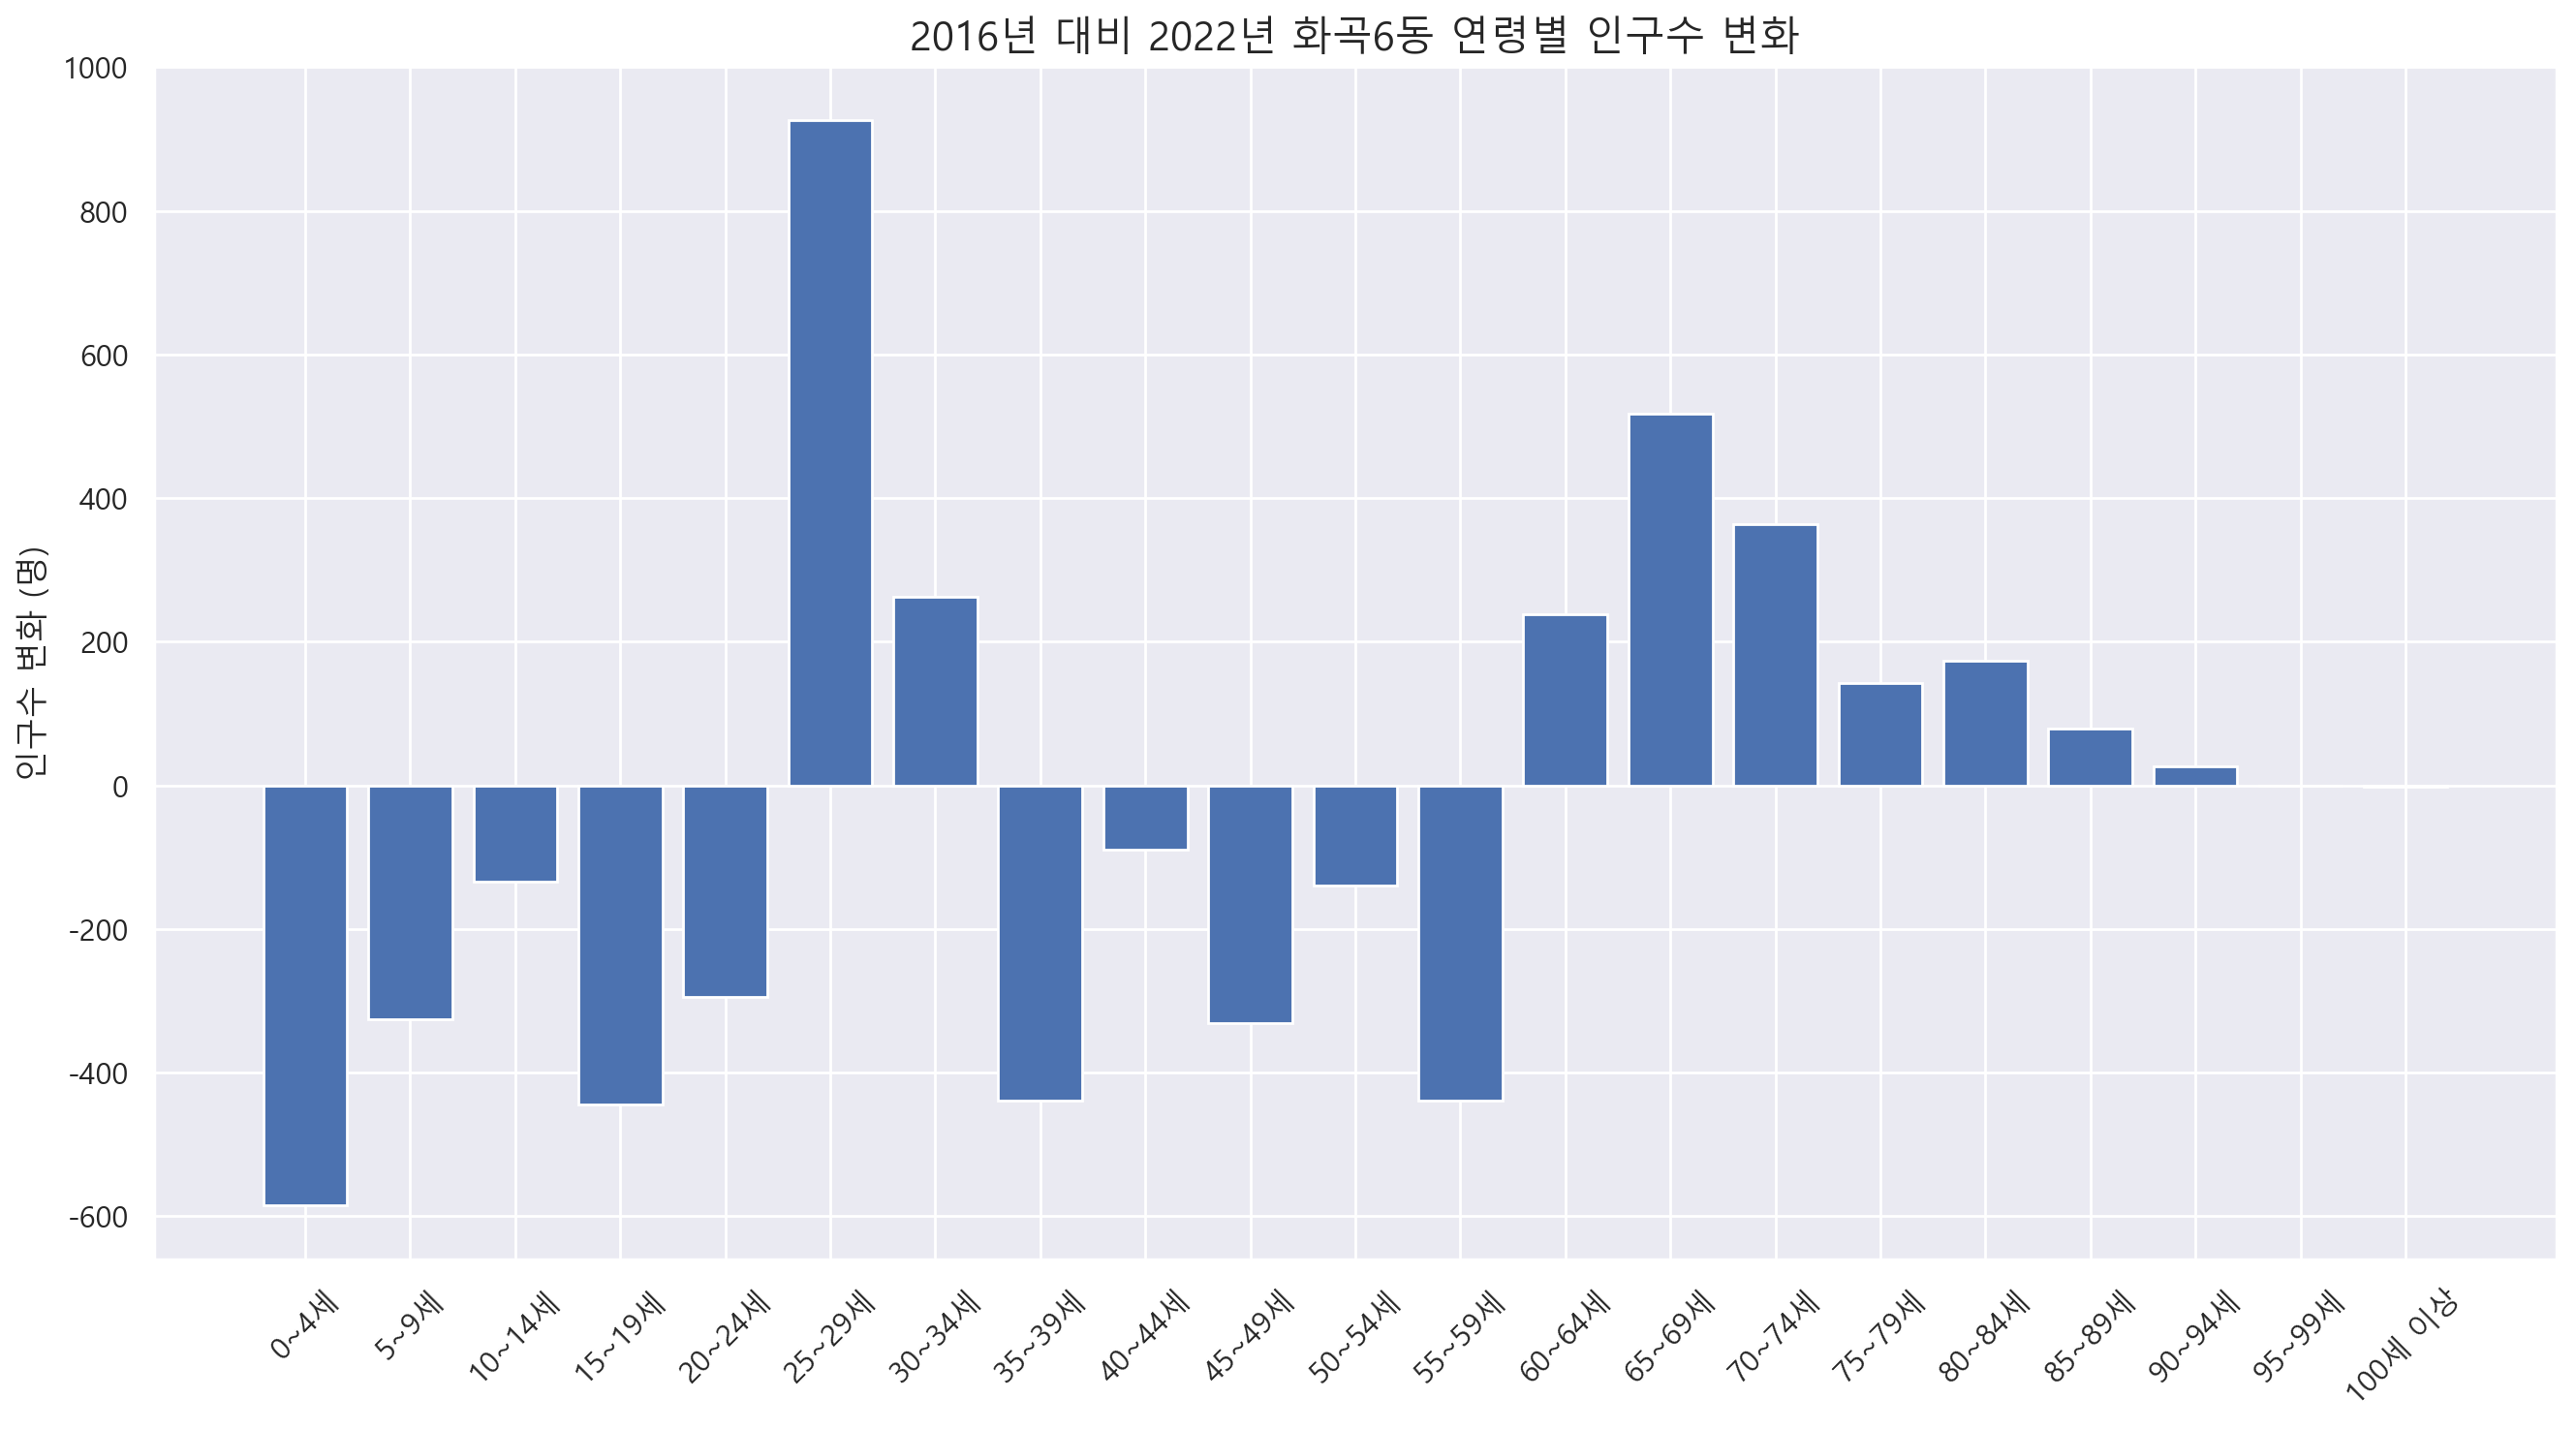

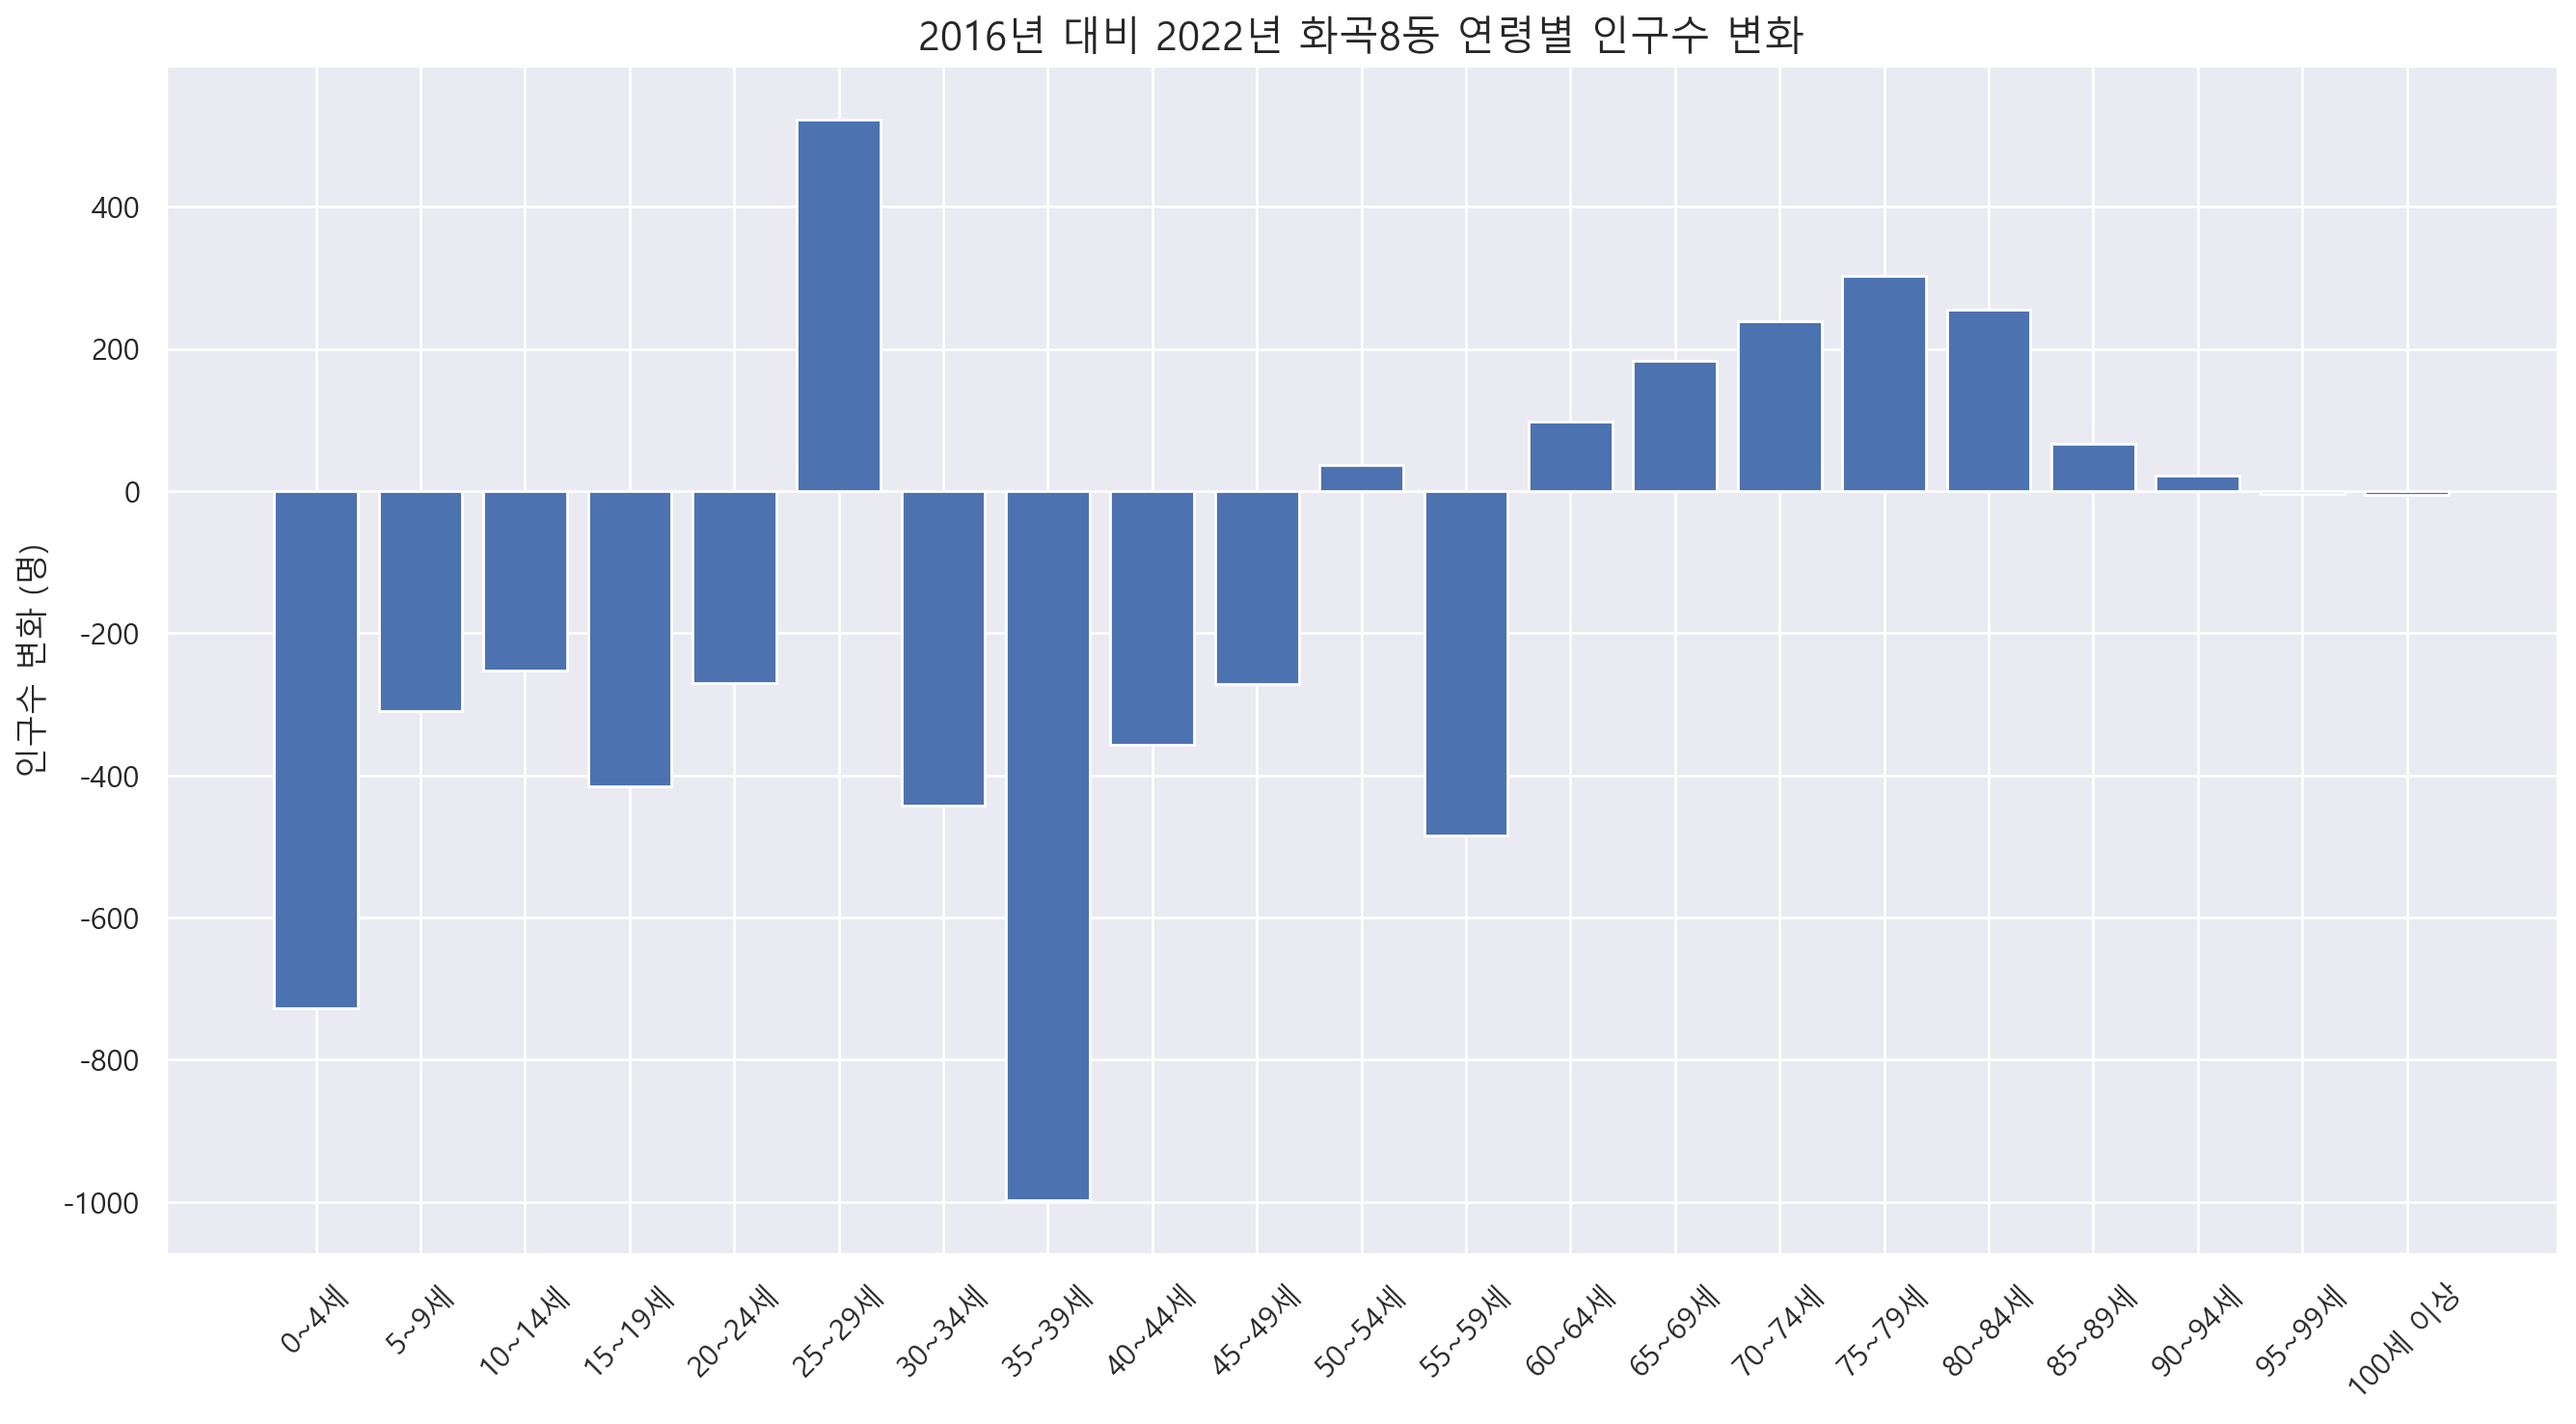

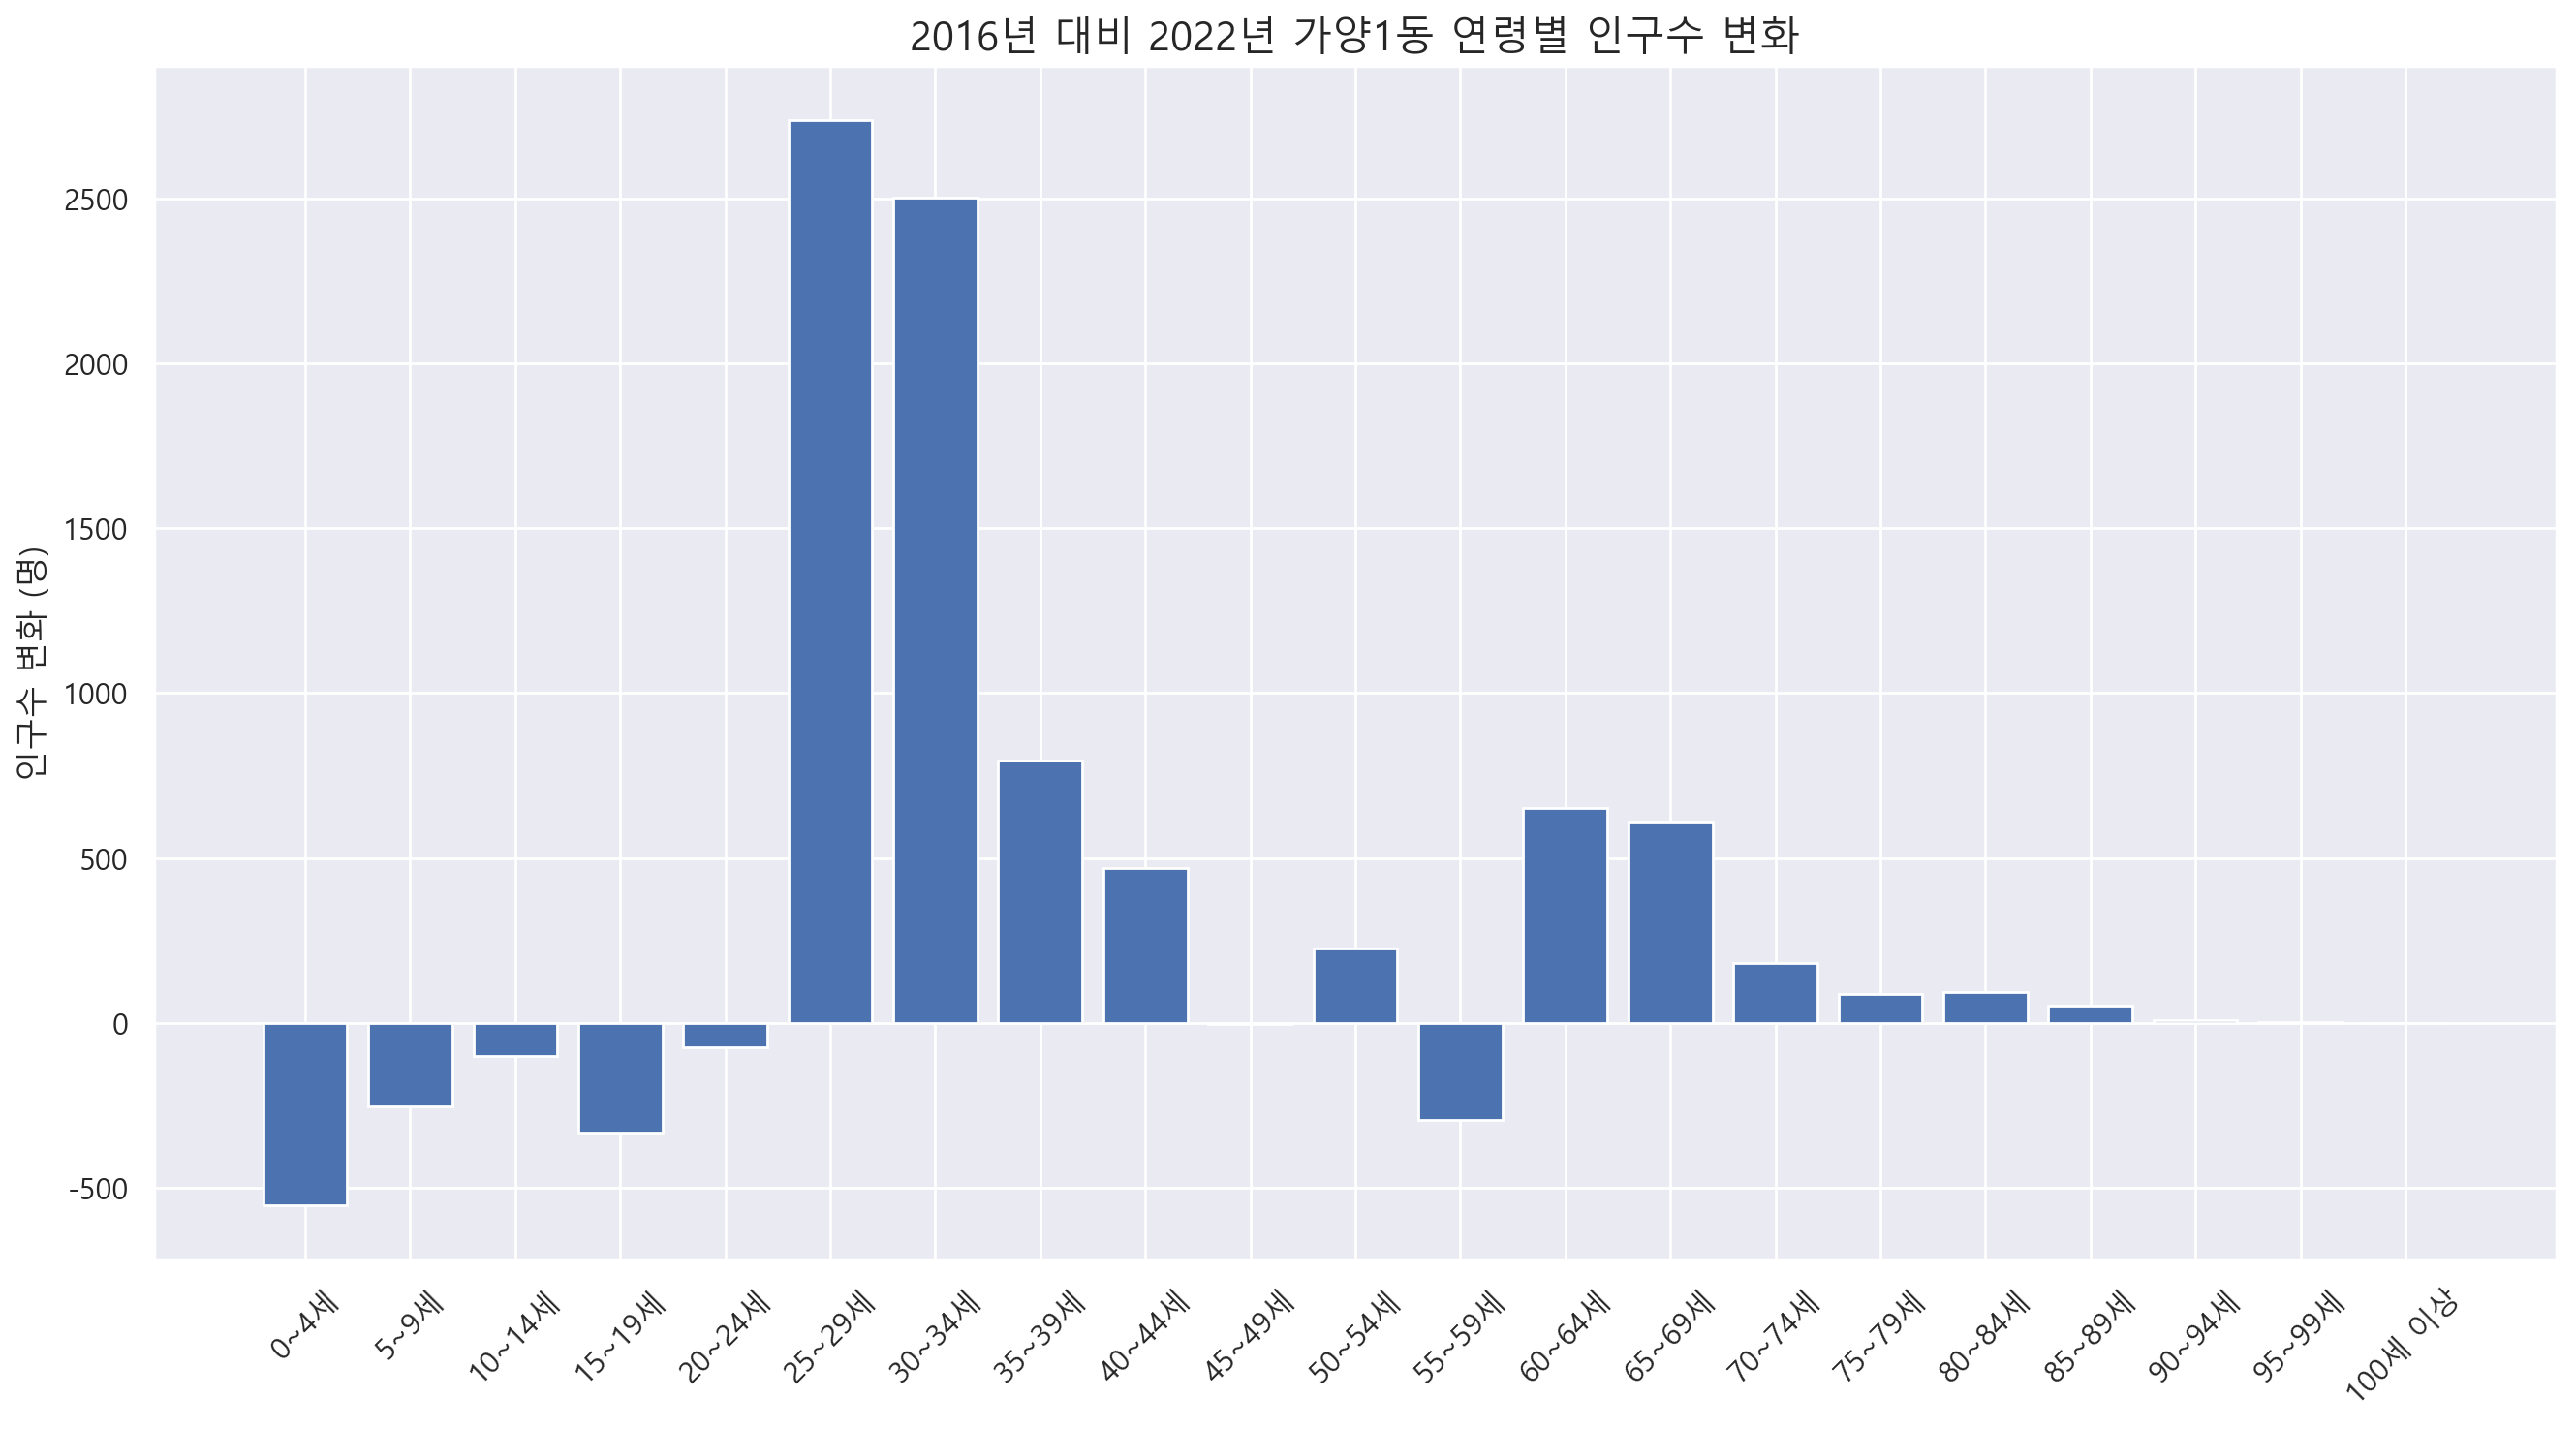

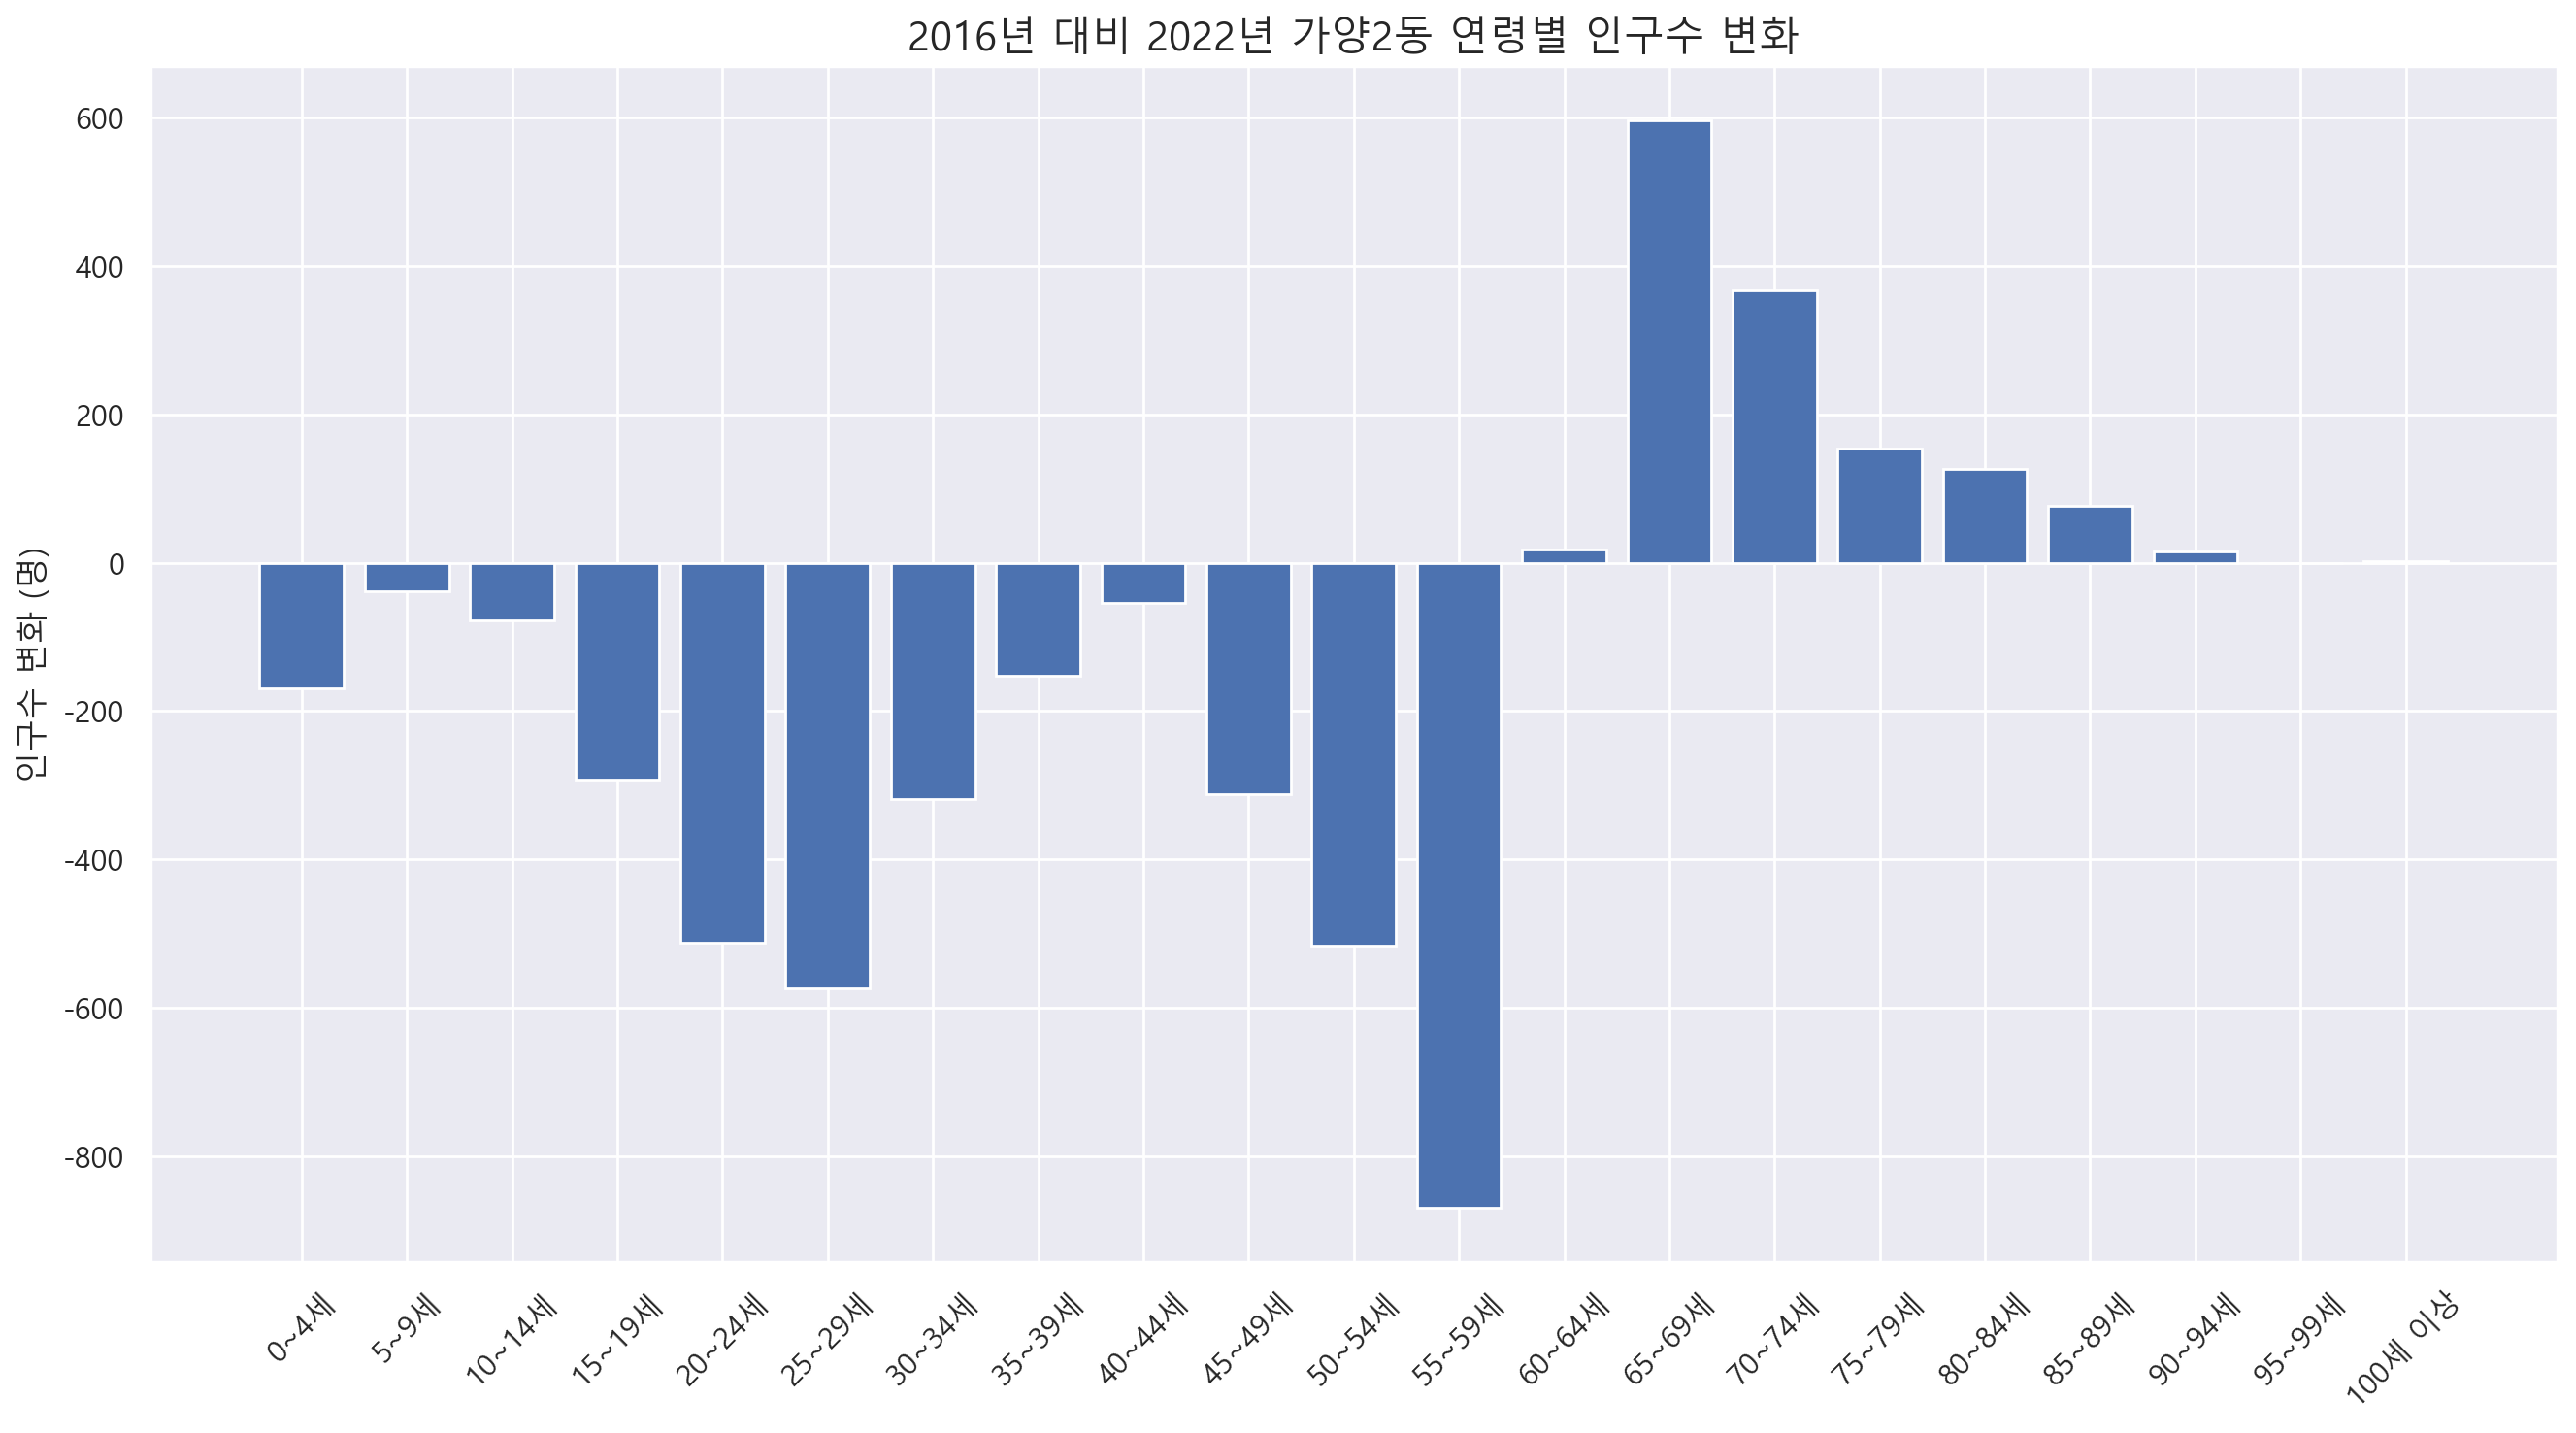

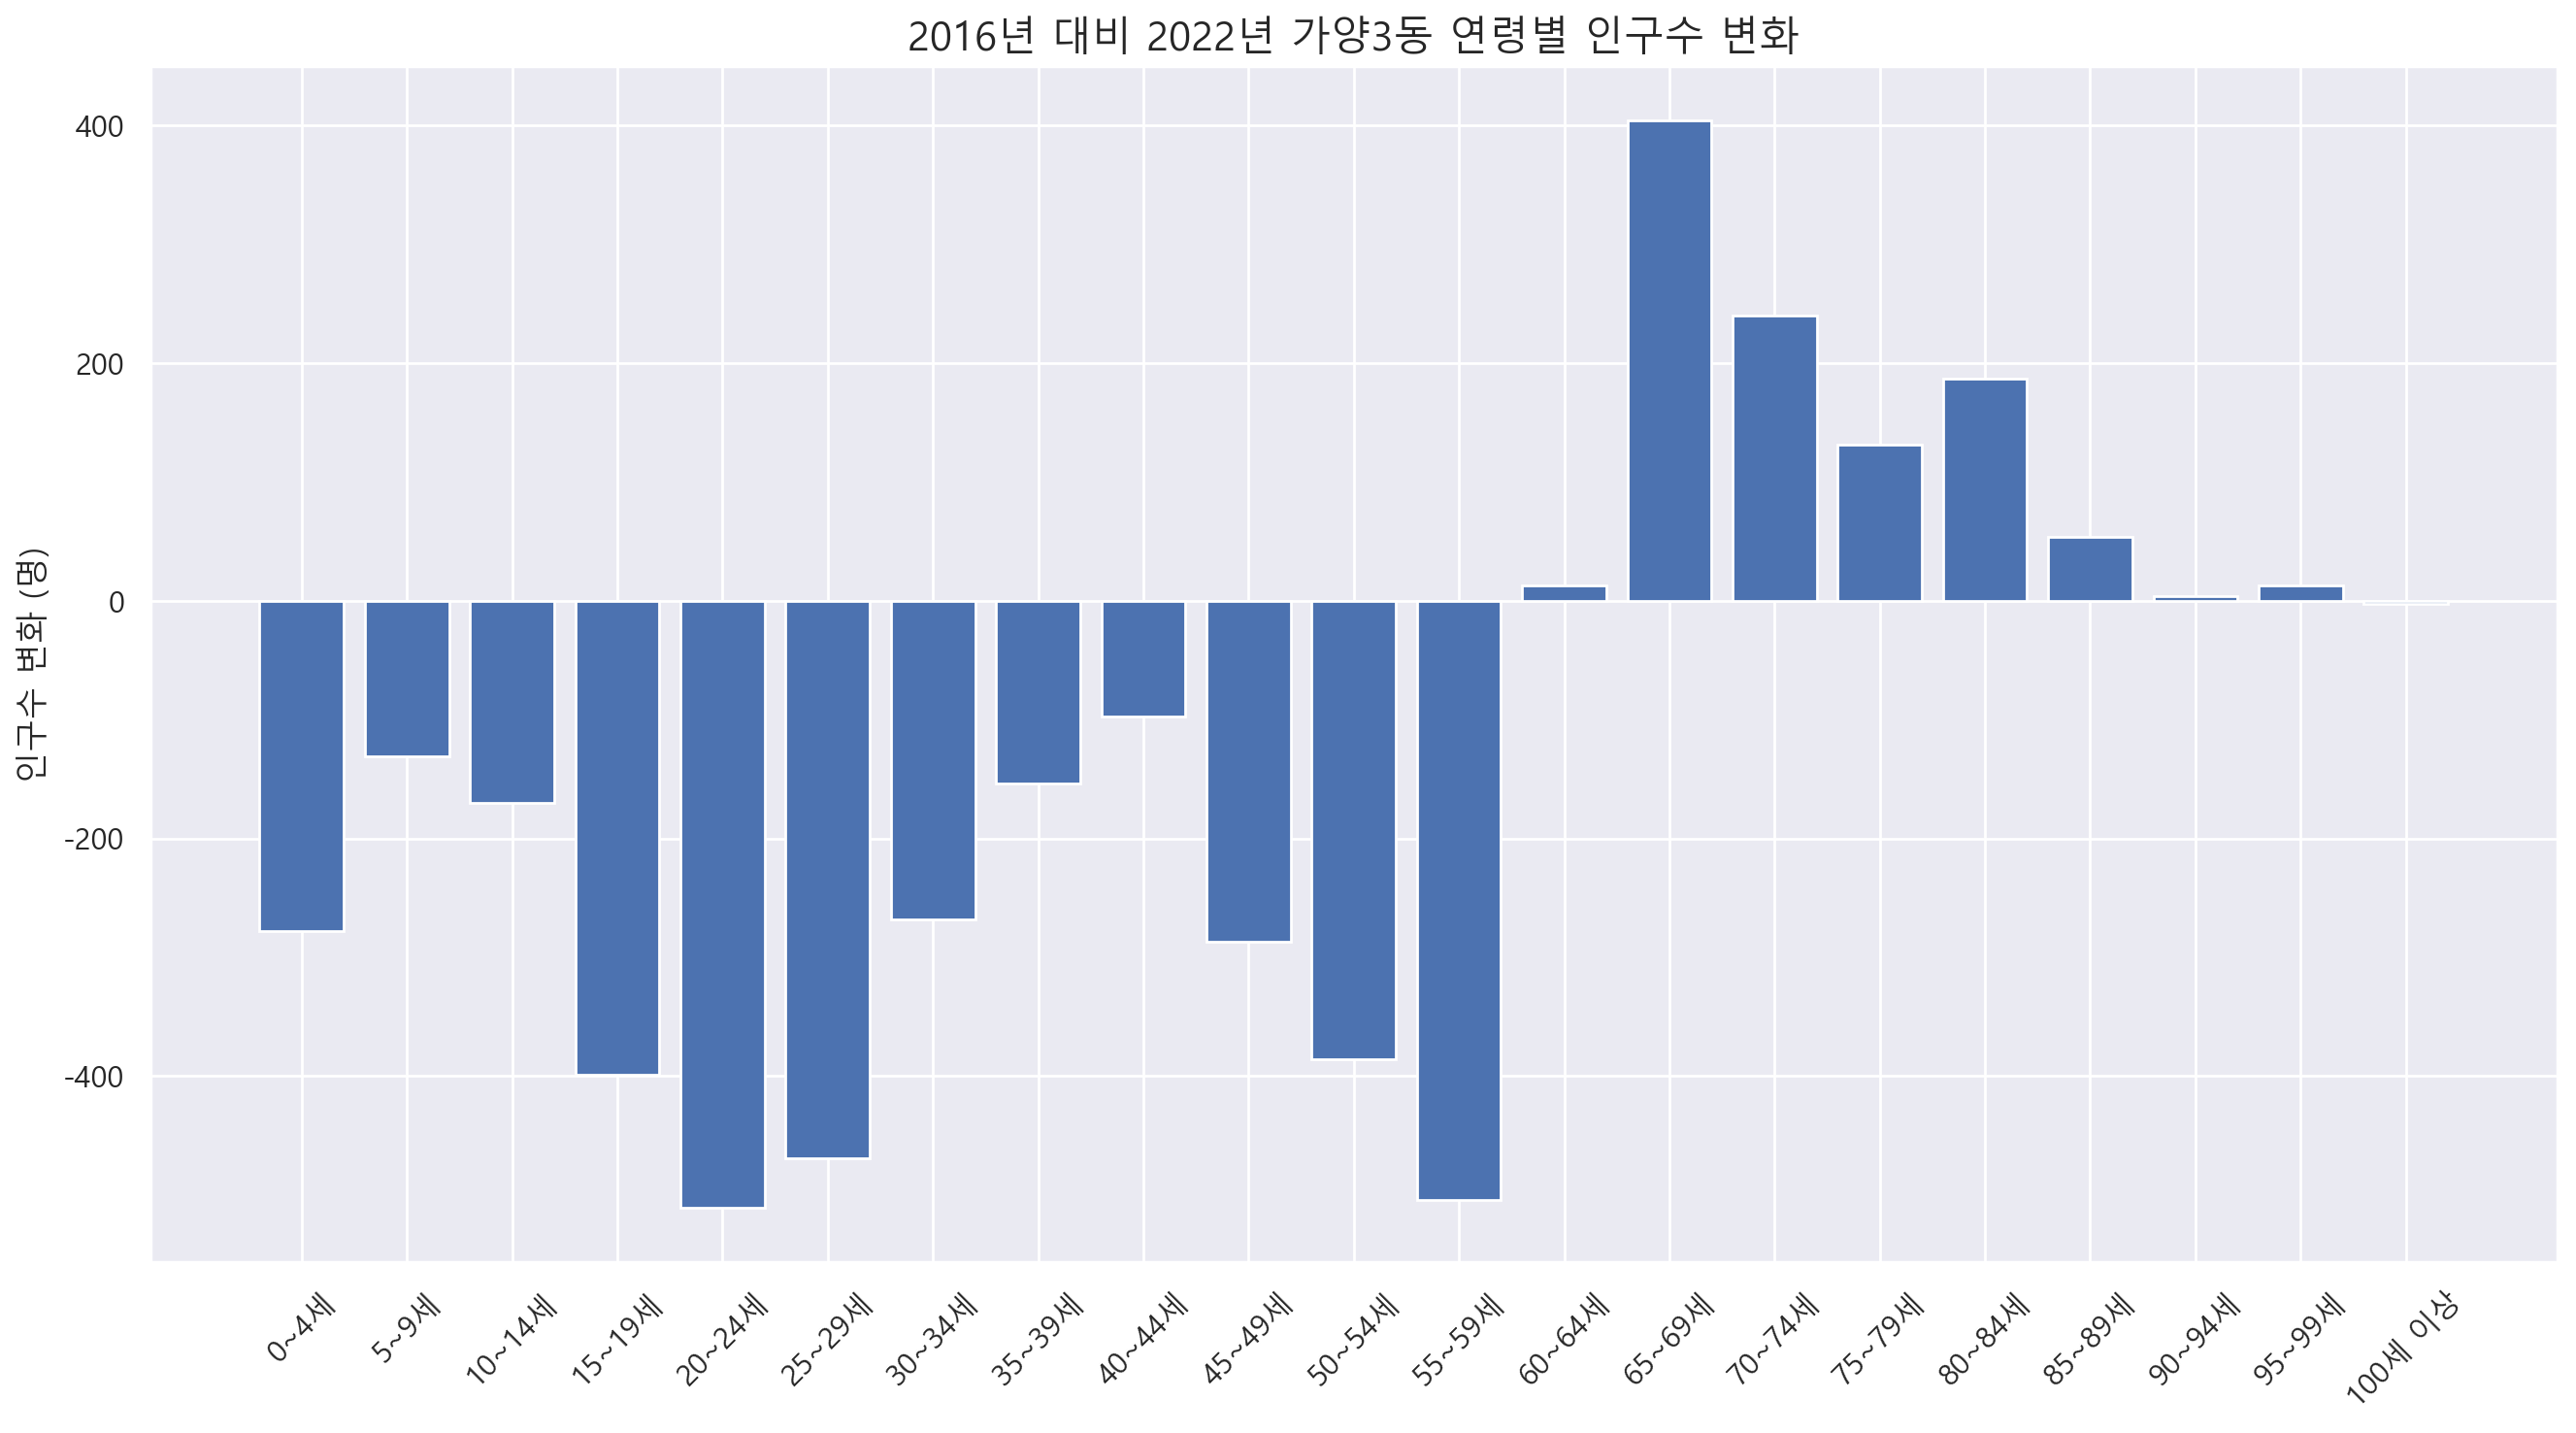

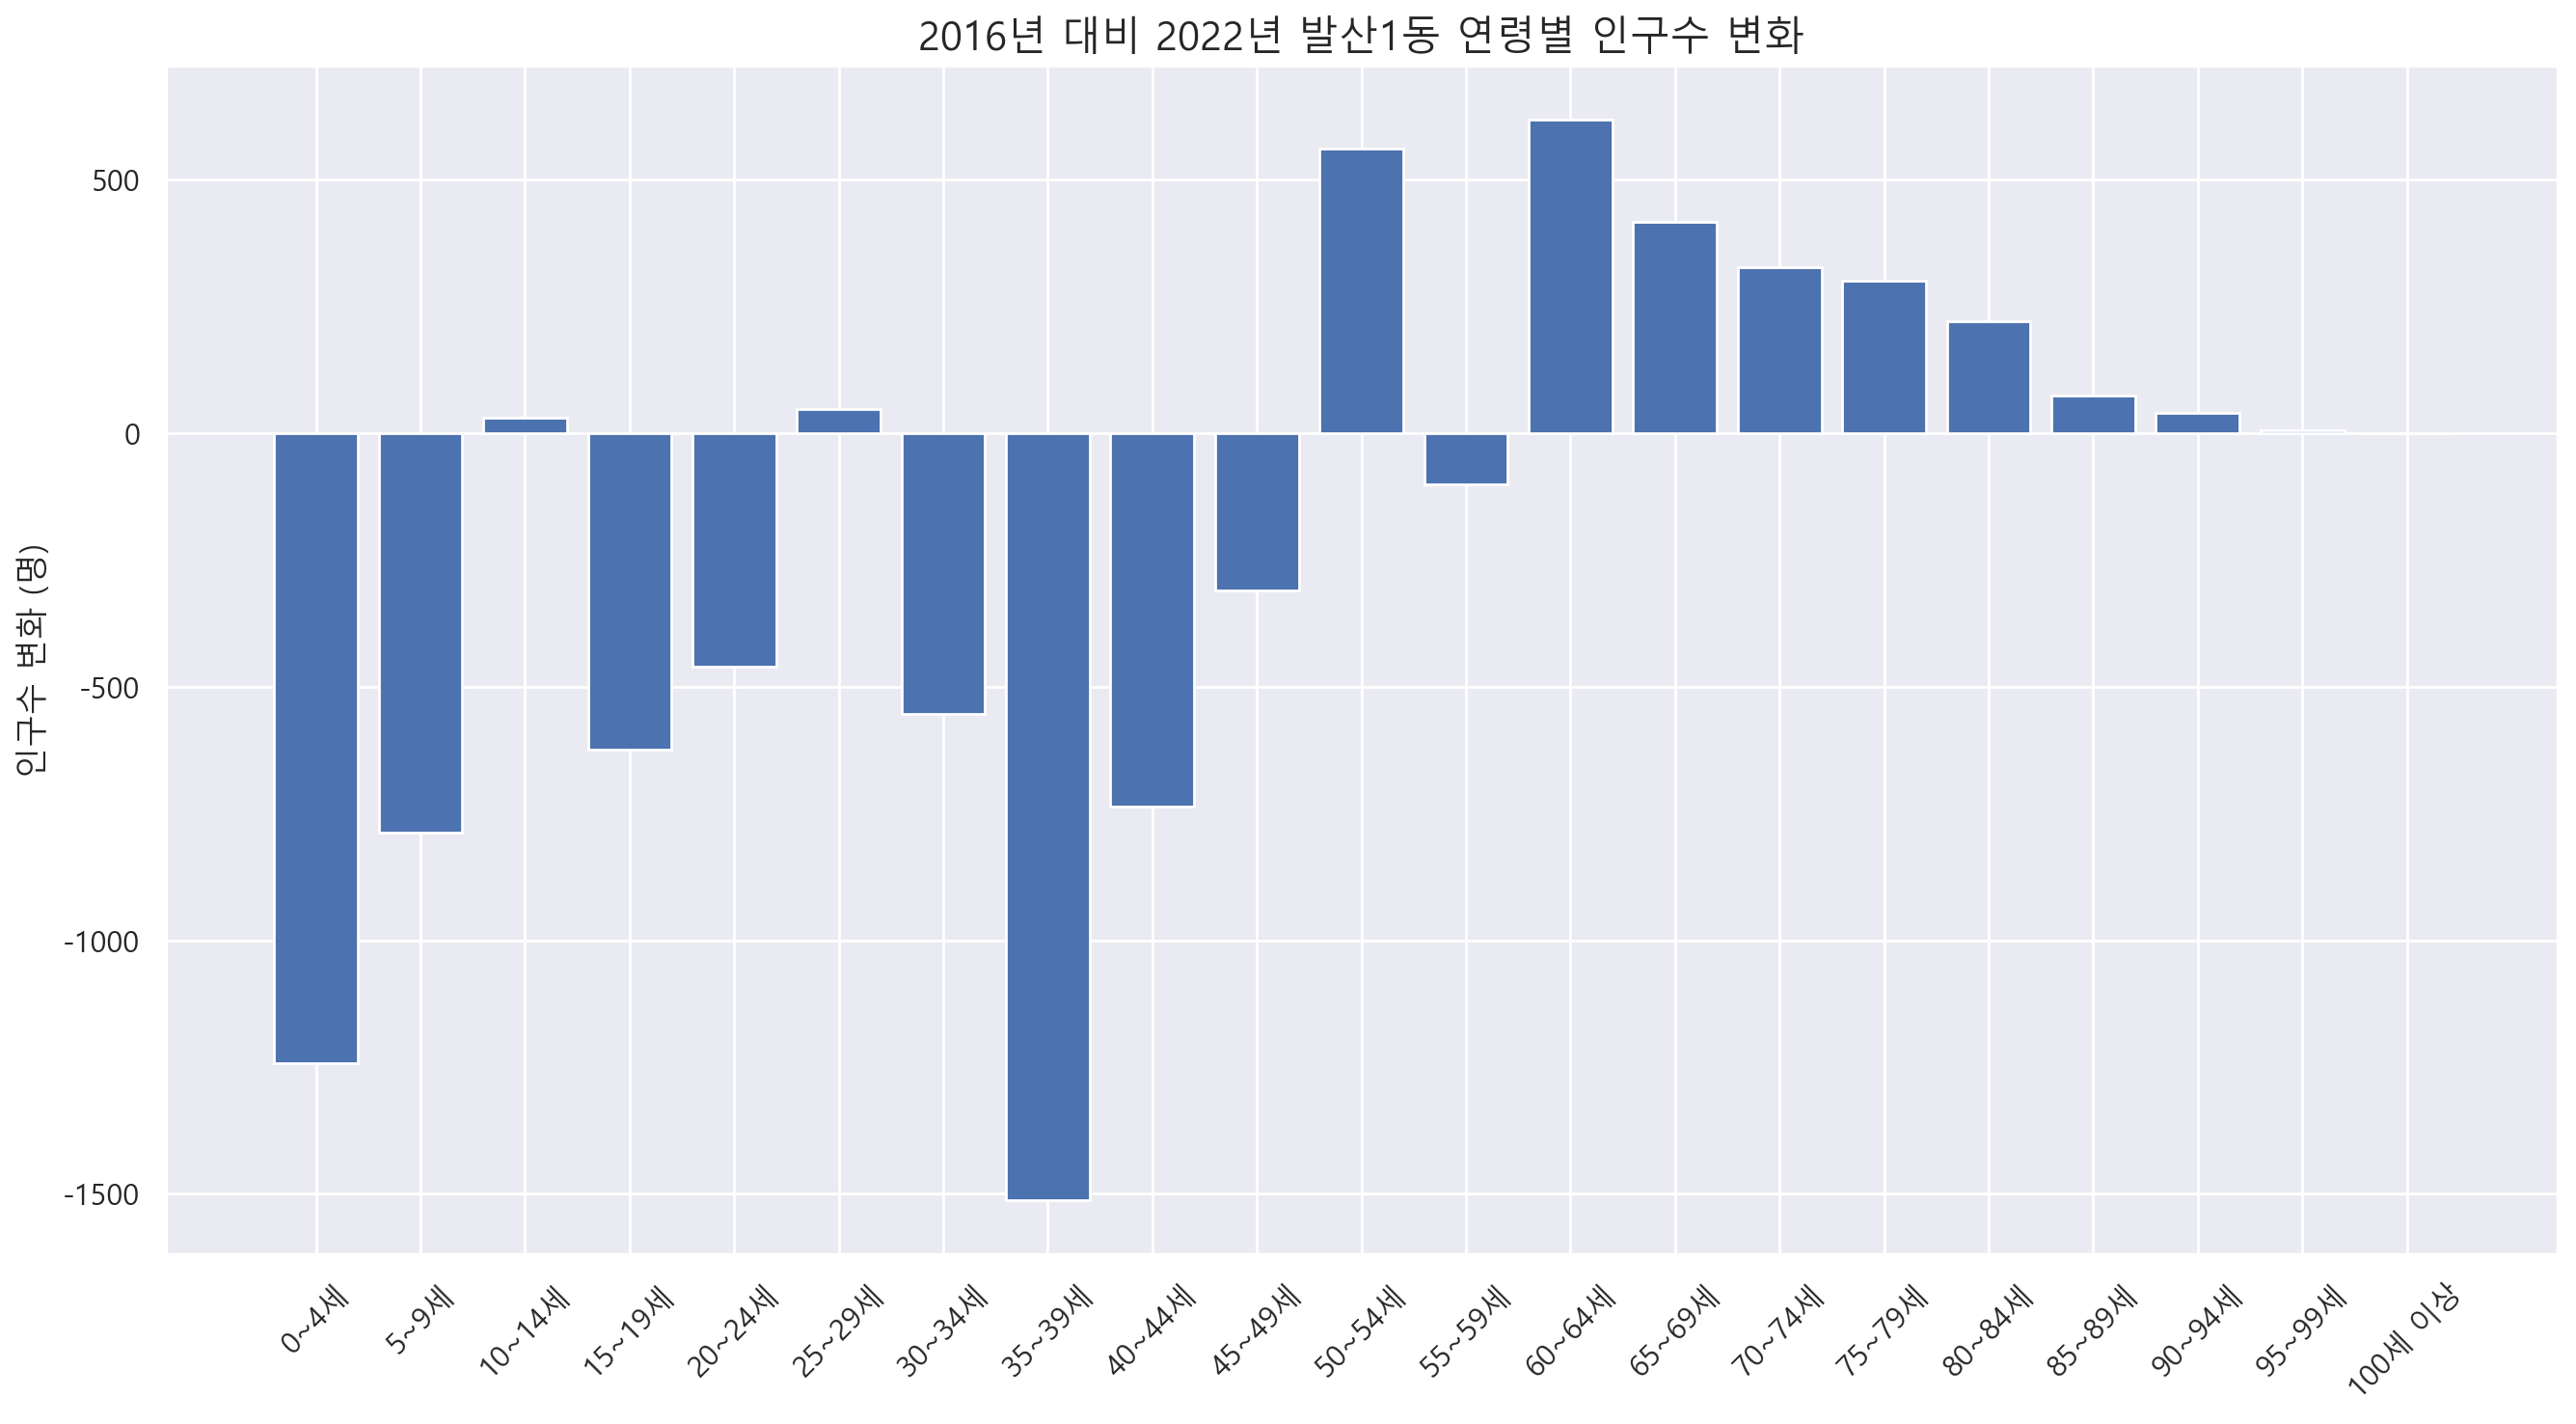

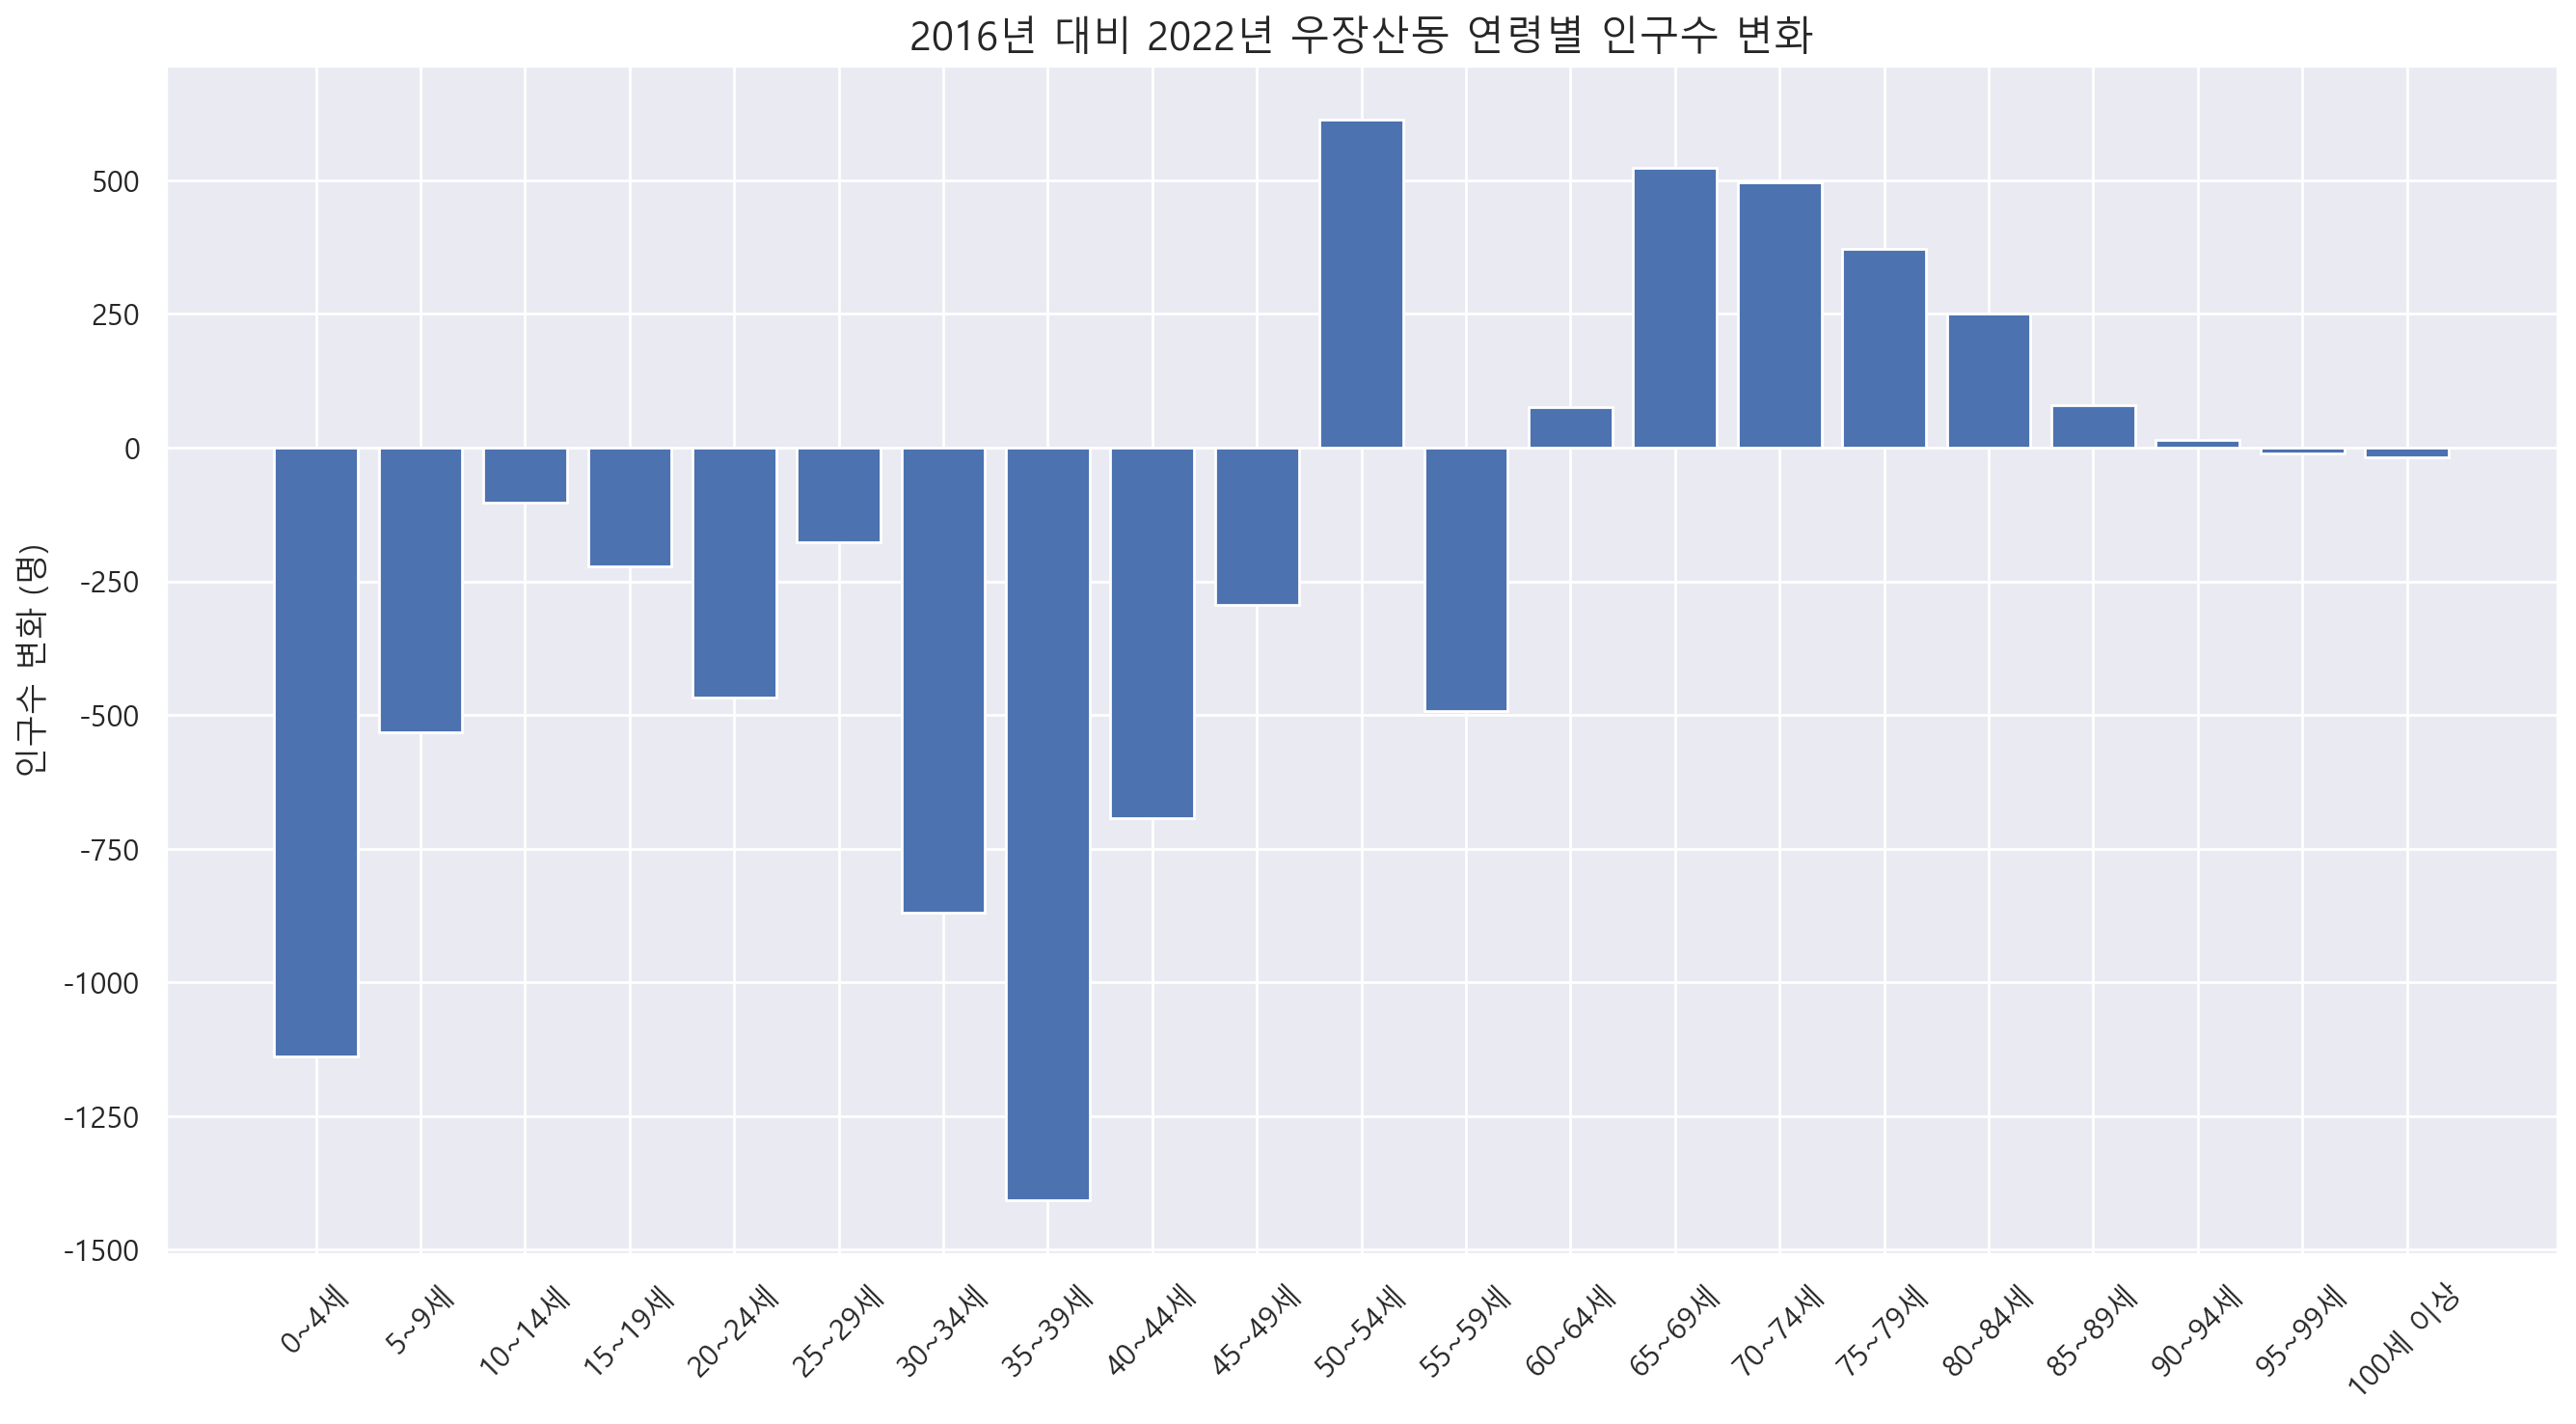

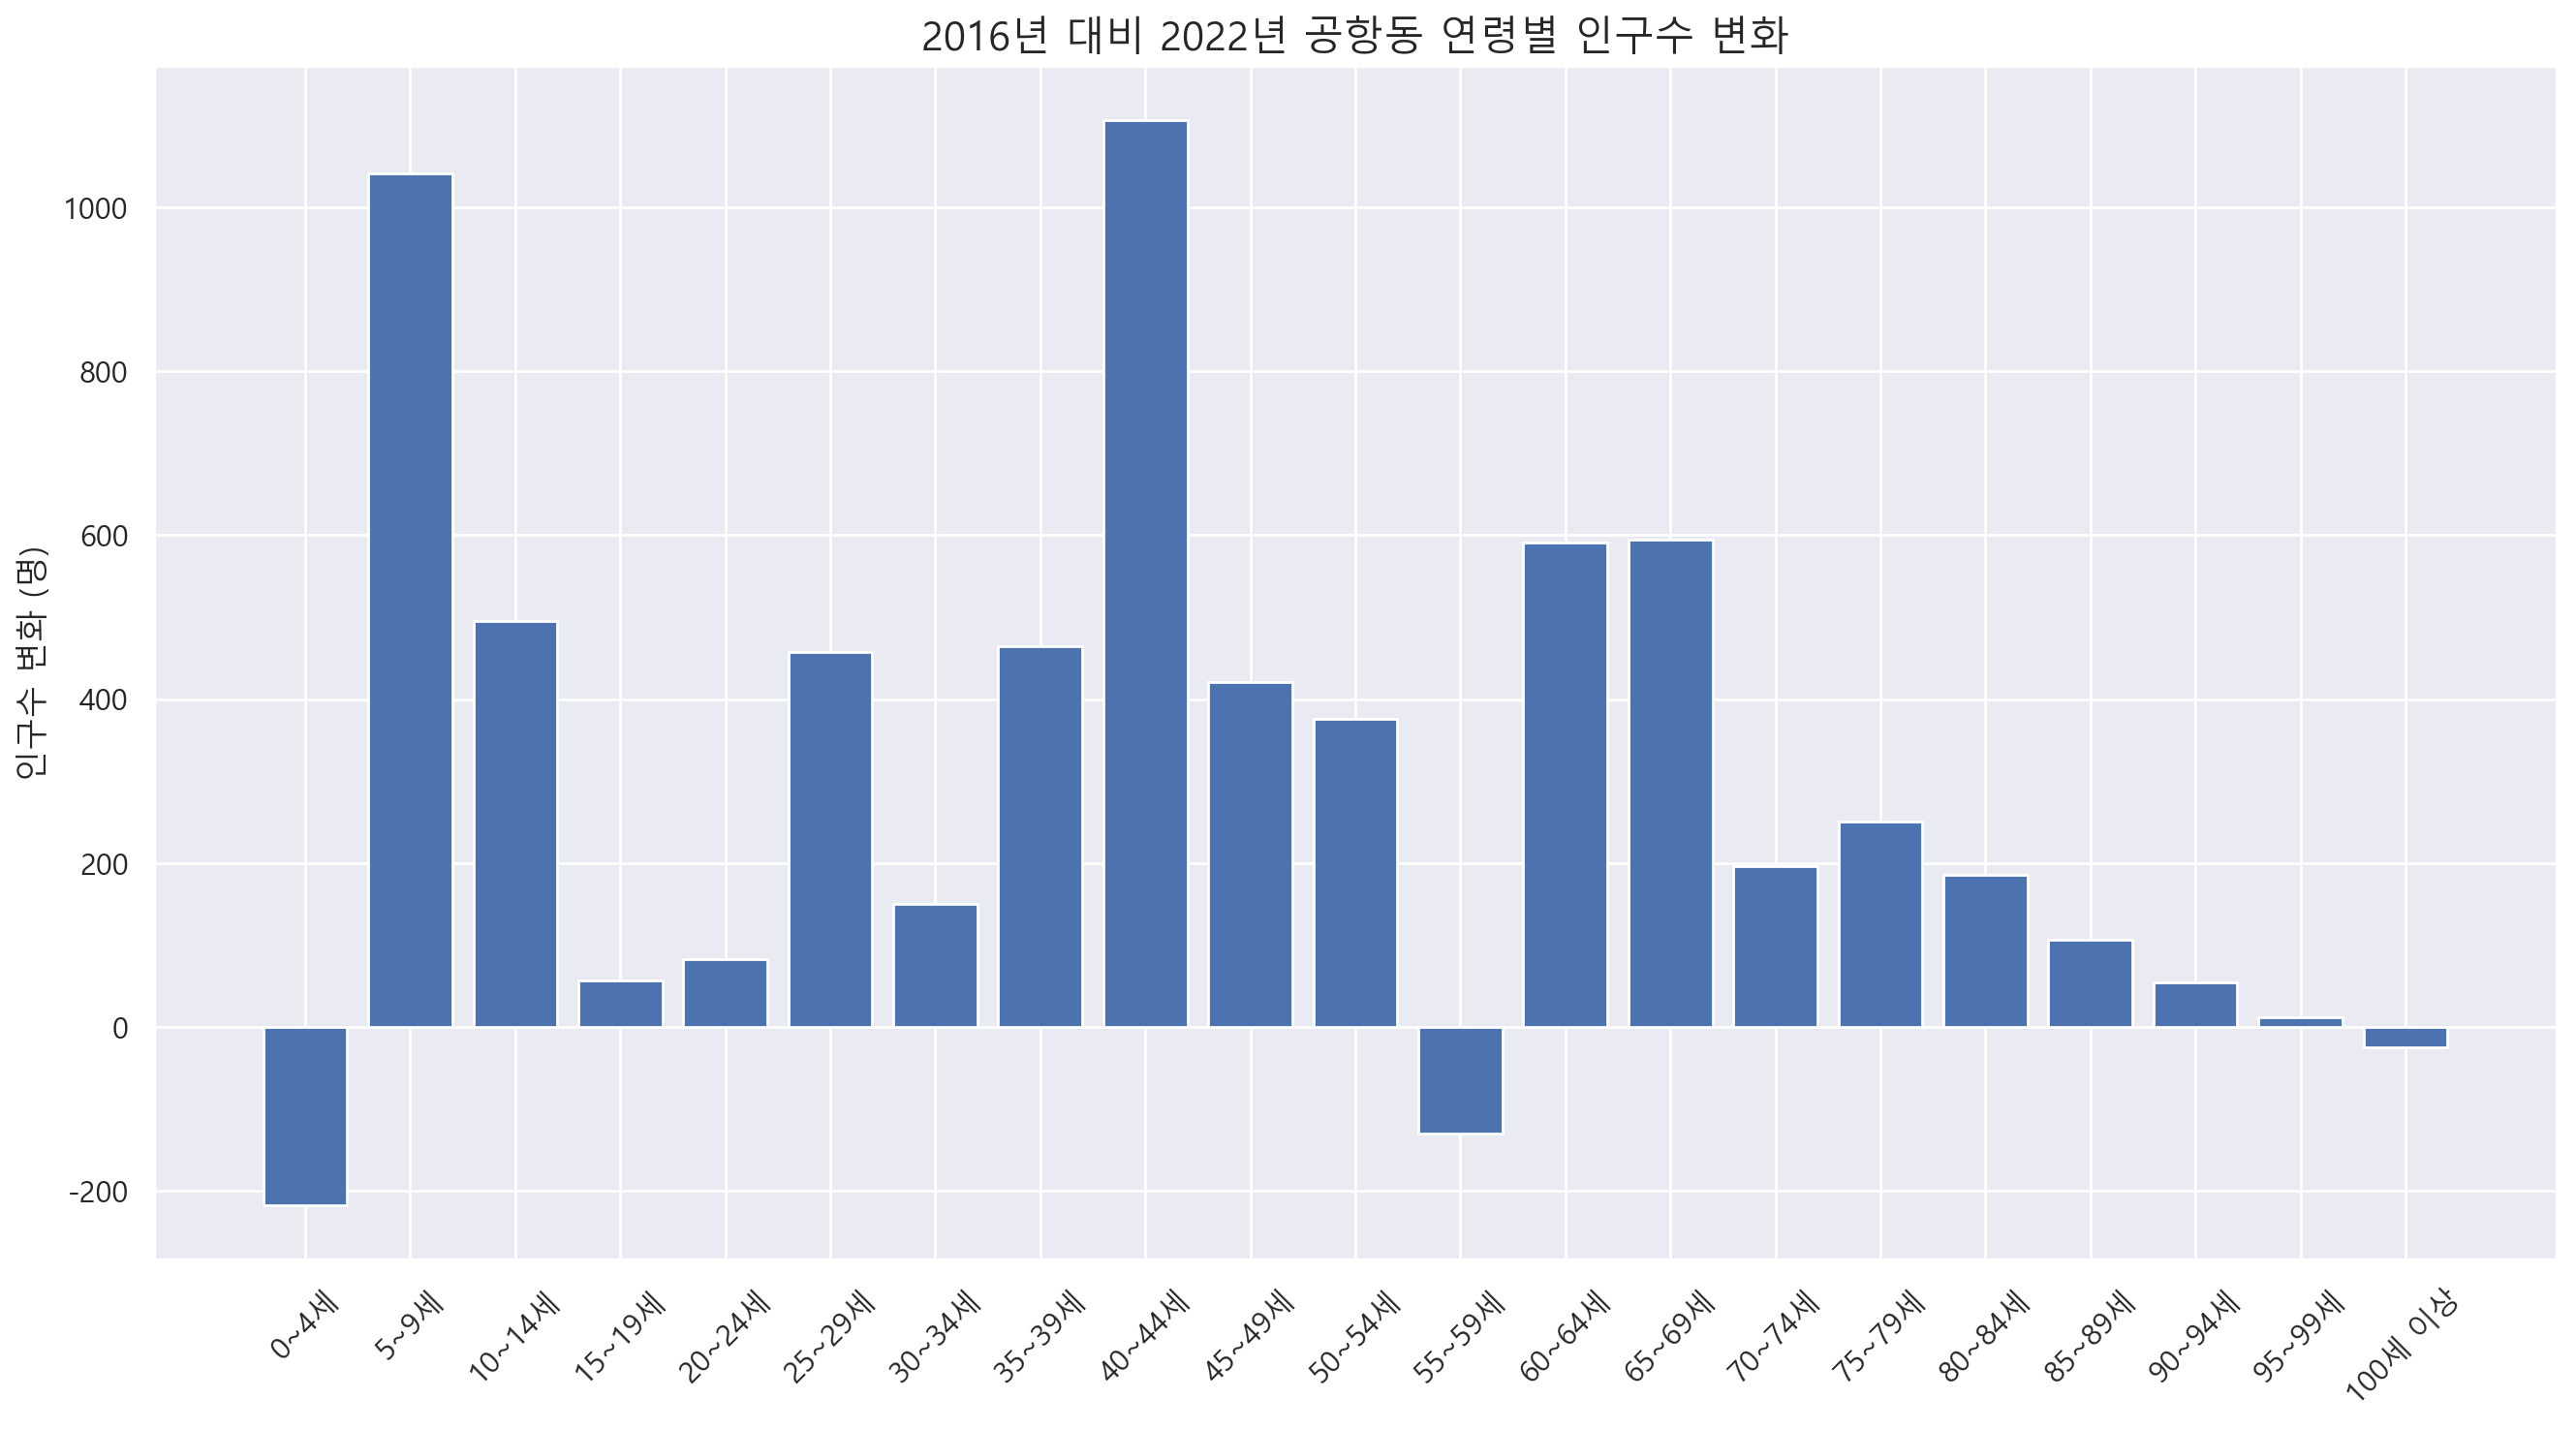

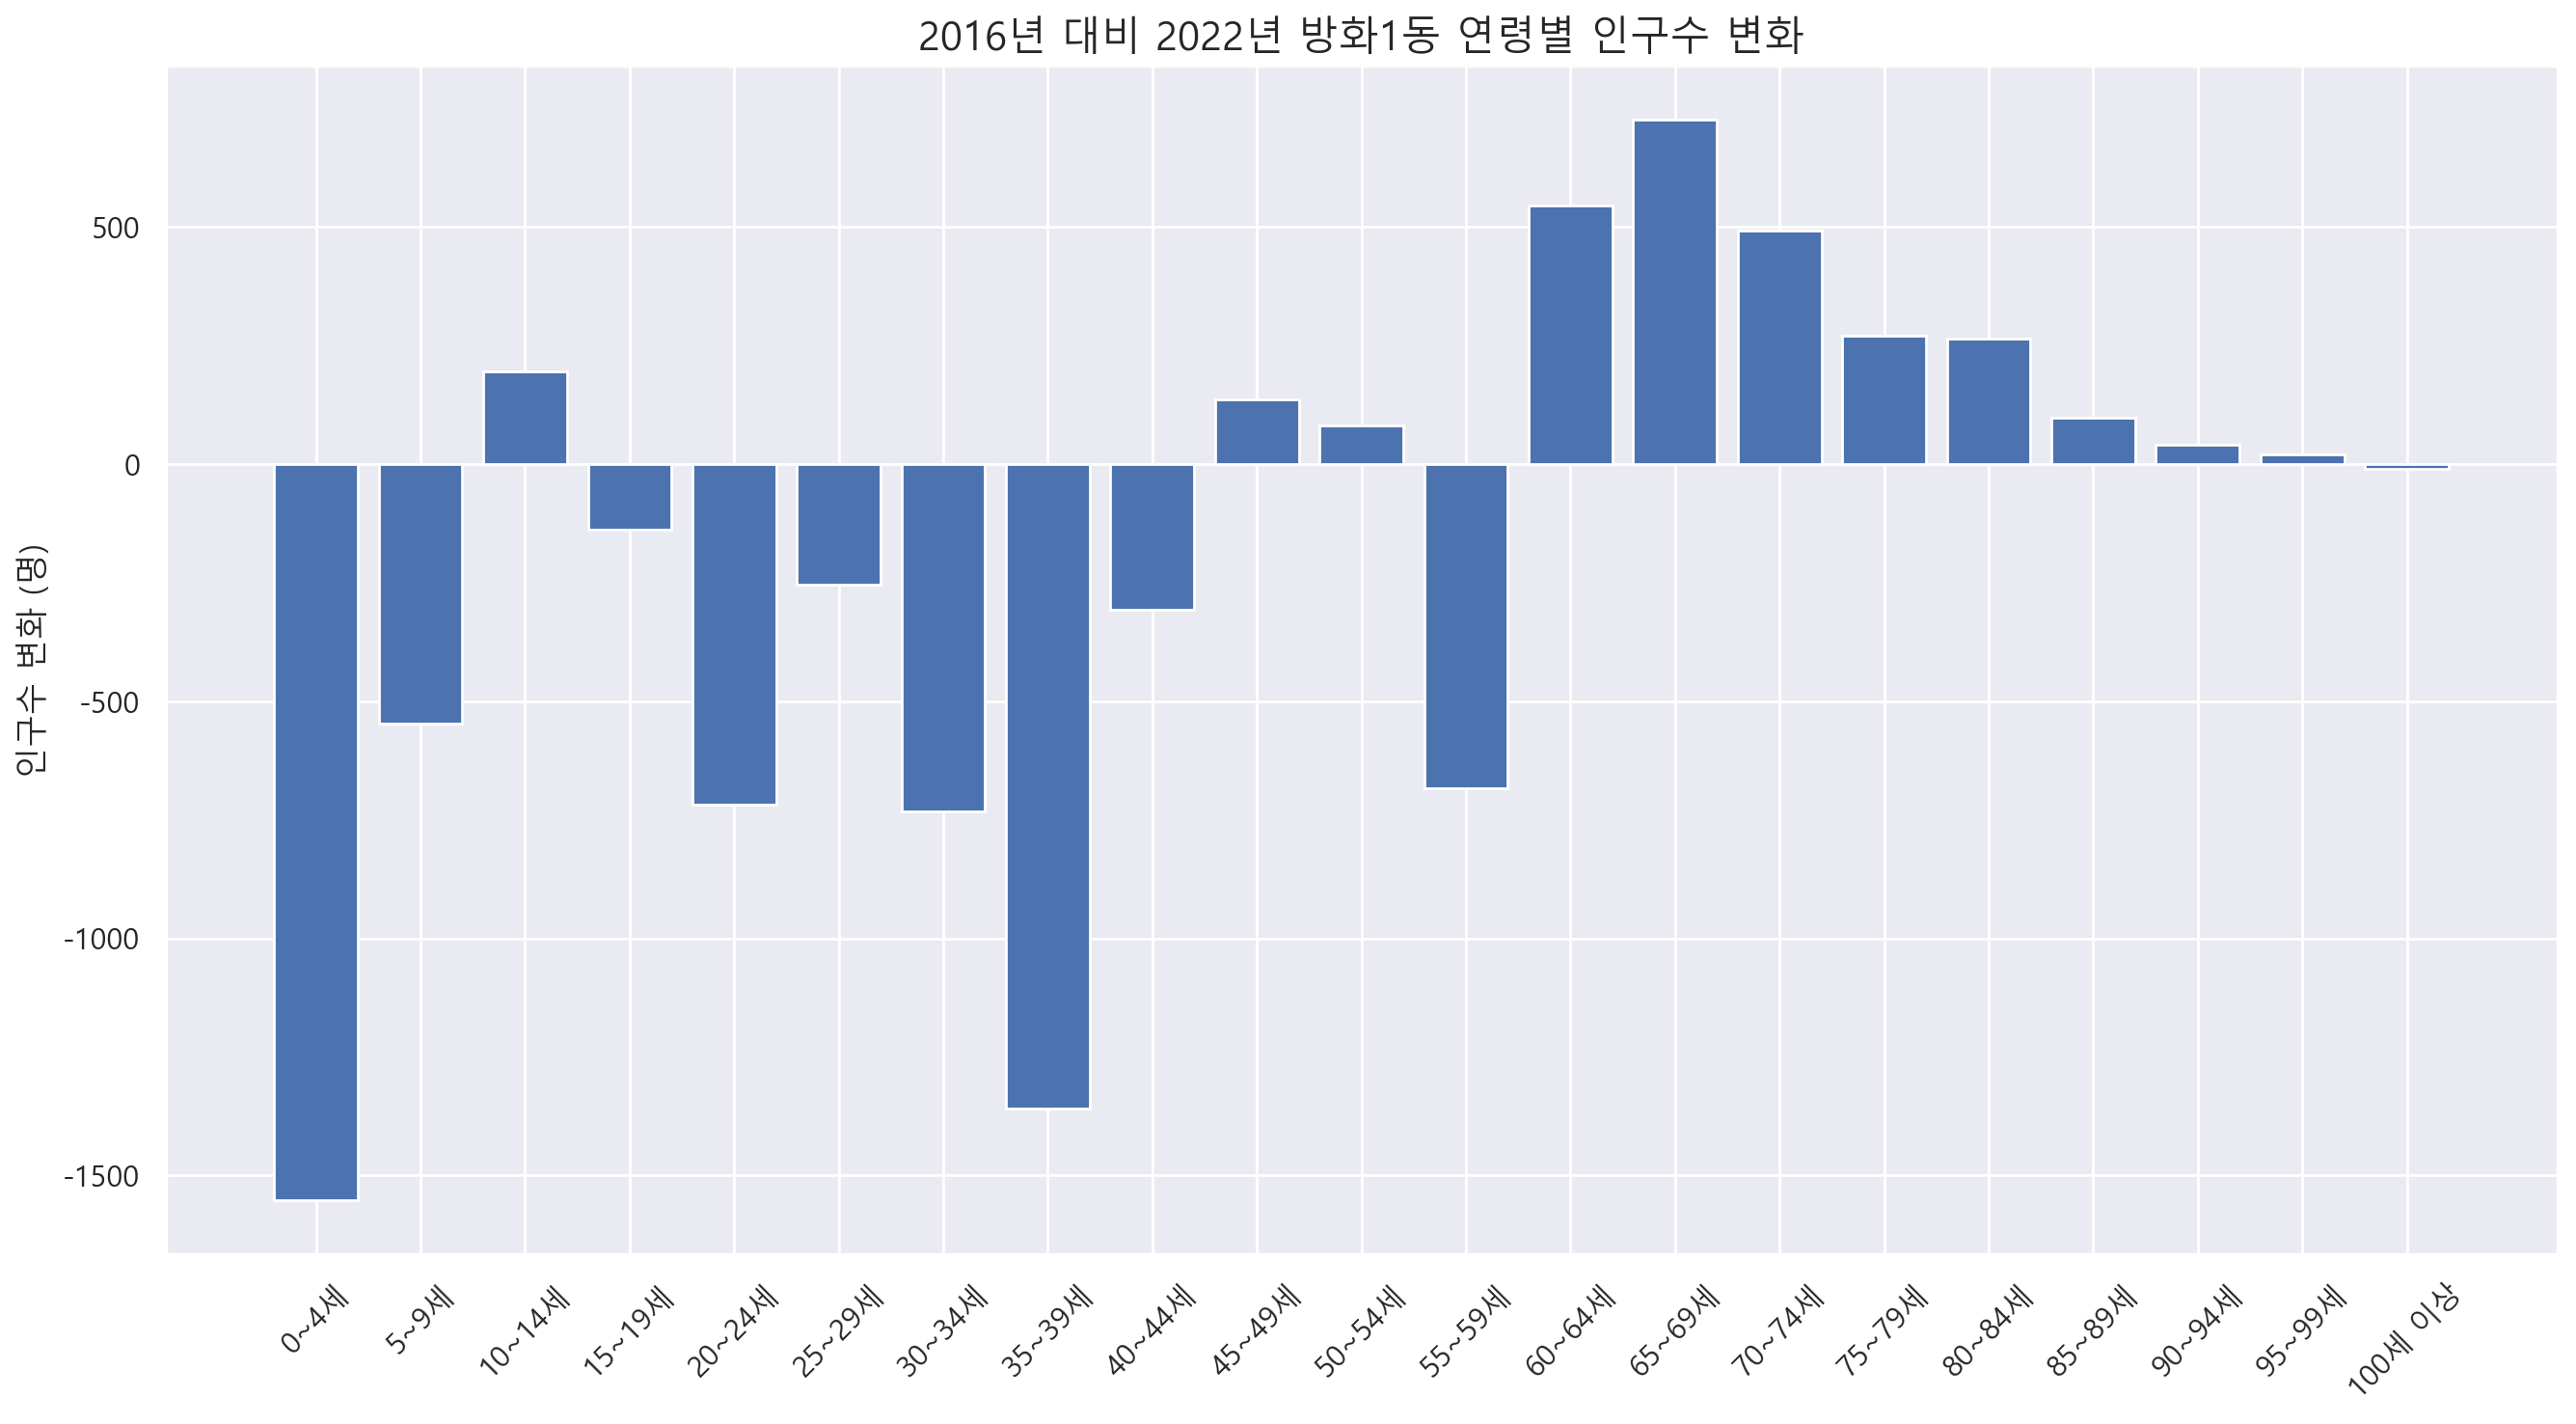

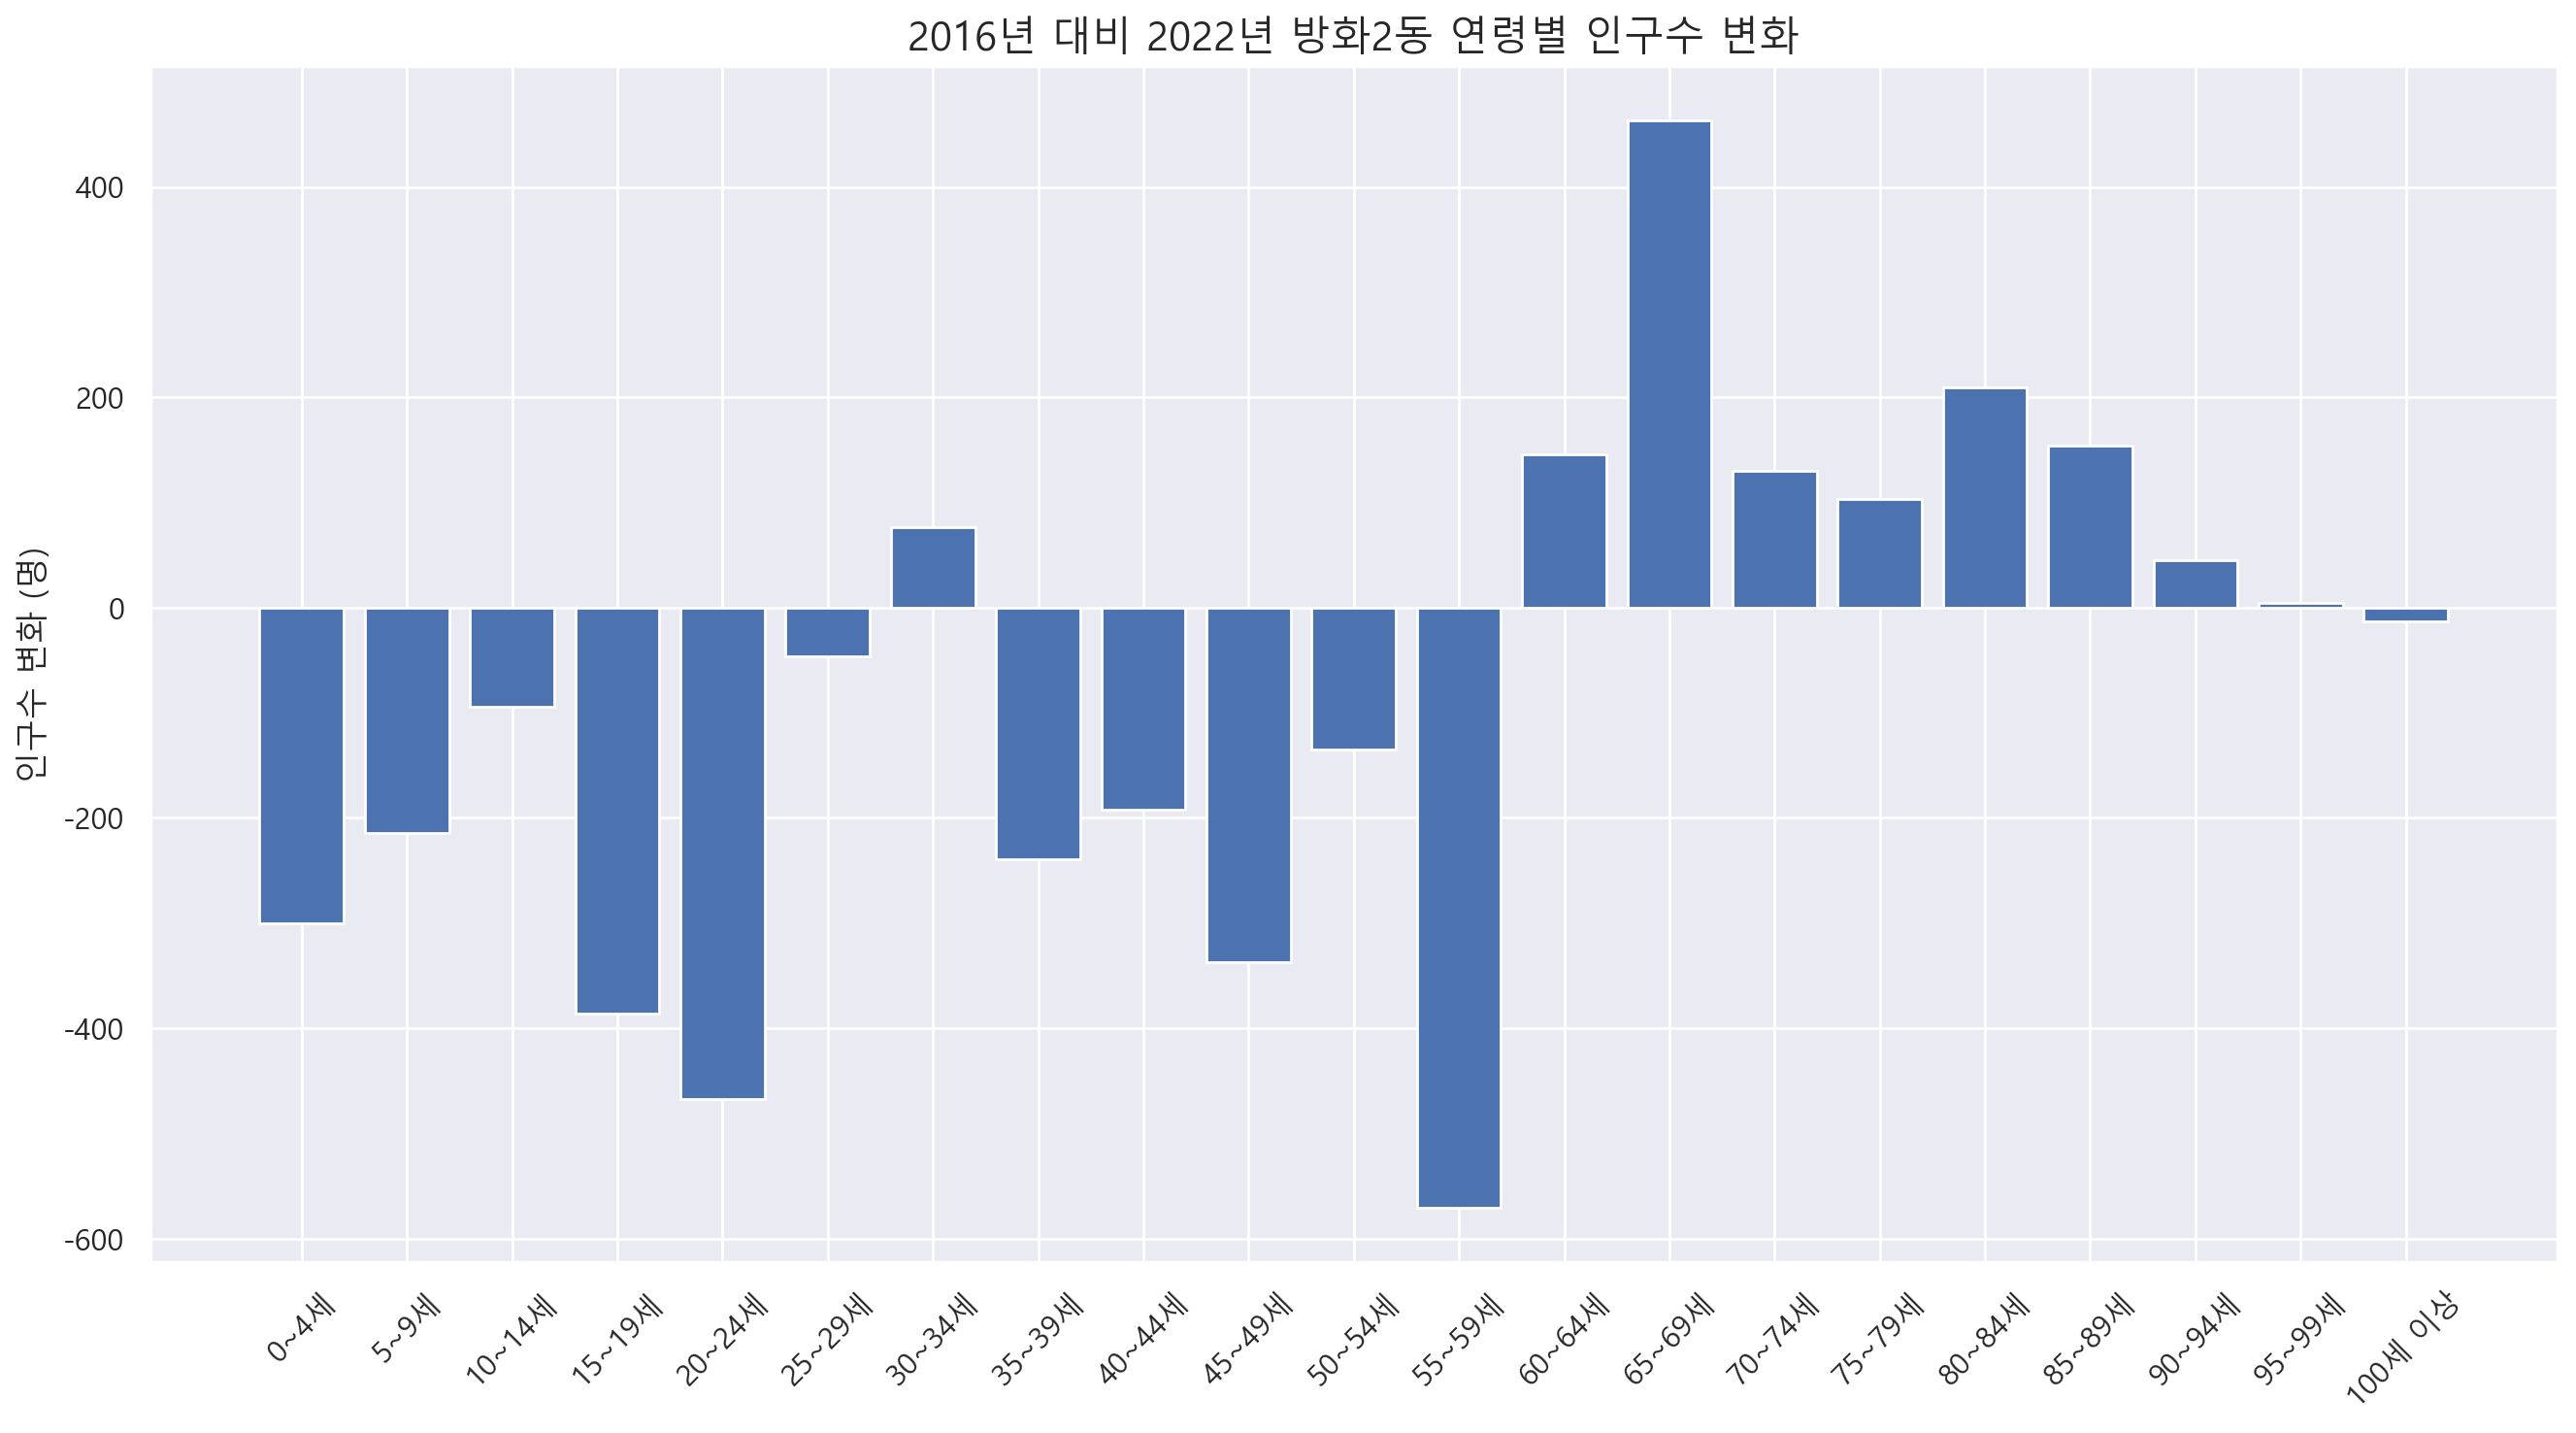

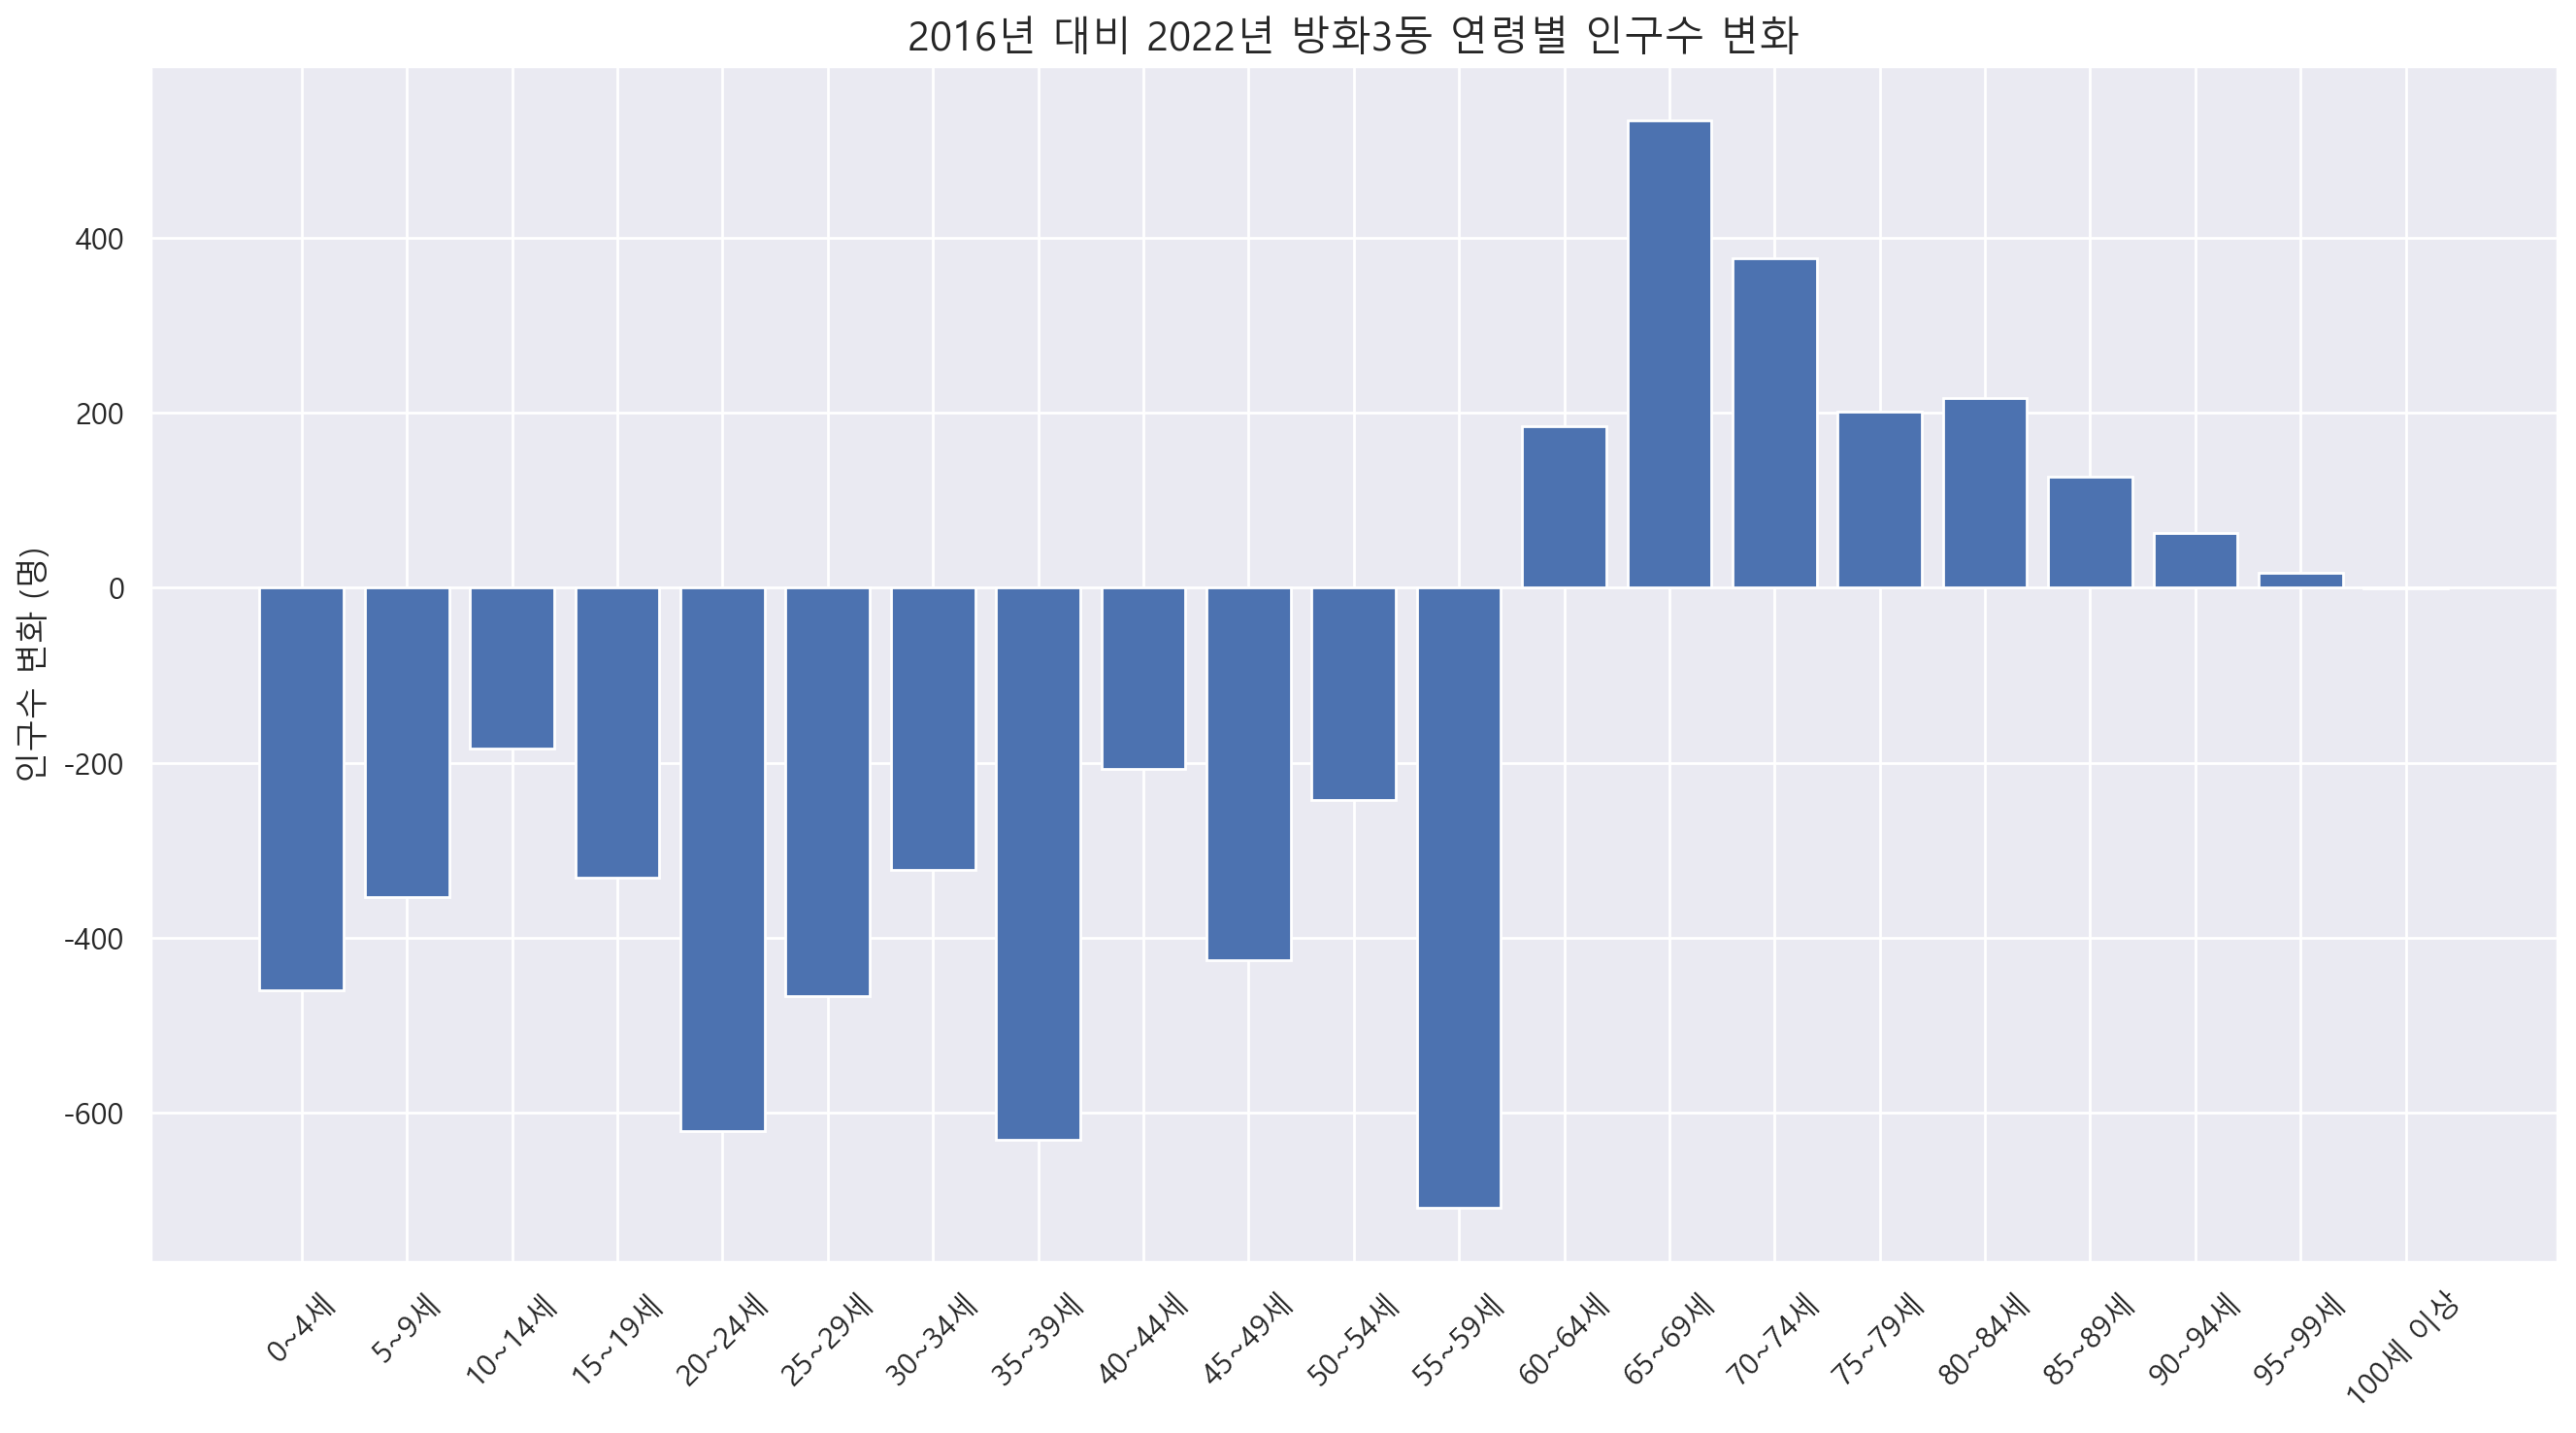

In [27]:
for dong in df_change.index:
    plt.figure(figsize=(16, 8))
    plt.bar(df_change.columns, df_change.loc[dong, :])
    plt.xticks(rotation=45)
    plt.title(f'2016년 대비 2022년 {dong} 연령별 인구수 변화', size=title_size)
    plt.savefig(f'../../img/인구/동별 연령별 인구 변화/{dong} 연령별 인구수 변화.png')
    plt.ylabel('인구수 변화 (명)')
    plt.show()